## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
happiness = pd.read_csv(HAPPINESS_DATASET)
happiness.head()

country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region  
0                          South Asia  
1          Central and Eastern Europe  
2        Middle East and North Africa  
3         Latin America and Caribbean  
4  Commonwealth of Independent States

In [4]:
countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')
countries.head()

country_name     area  population  literacy
0  afghanistan   647500    31056997      36.0
1      albania    28748     3581655      86.5
2      algeria  2381740    32930091      70.0
3    argentina  2766890    39921833      97.1
4      armenia    29800     2976372      98.6

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [5]:
happiness['country_name'] = happiness['country'].apply(lambda r: r.lower())
country_features = happiness.merge(countries, on="country_name").drop("country_name", axis=1)
country_features.head()

country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region     area  population  literacy  
0                          South Asia   647500    31056997      36.0  
1          Central and Eastern Europe    28748     3581655      86.5  
2        Middle East and North Africa  2381740    32930091      70.0  
3         Latin America and Caribbean  2766890    39921833      97.1  
4  Commonwealth of Independent States    29800     2976372      98.6

In [6]:
print("happiness = {}".format(len(happiness)))
print("countries = {}".format(len(countries)))
print("country_features = {}".format(len(country_features)))

len(happiness) == len(countries) == len(country_features)

happiness = 135
countries = 135
country_features = 135


True

## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [7]:
country_features.sort_values("happiness_score", ascending=False)[['country', 'happiness_score']].head(10)

country  happiness_score
38       Finland           7.8087
31       Denmark           7.6456
115  Switzerland           7.5599
50       Iceland           7.5045
92        Norway           7.4880
87   Netherlands           7.4489
114       Sweden           7.3535
88   New Zealand           7.2996
6        Austria           7.2942
72    Luxembourg           7.2375

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [8]:
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','size'])
average_by_region.sort_values("mean", ascending=False)

mean  size
world_region                                      
North America and ANZ               7.173525     4
Western Europe                      6.967405    20
Latin America and Caribbean         5.971280    20
Central and Eastern Europe          5.891393    14
Southeast Asia                      5.517788     8
East Asia                           5.483633     3
Commonwealth of Independent States  5.358342    12
Middle East and North Africa        5.269306    16
Sub-Saharan Africa                  4.393856    32
South Asia                          4.355083     6

The first region has only a few countries! What are they and what is their score?

In [9]:
country_features[country_features.world_region=='North America and ANZ'][['country', 'happiness_score']]

country  happiness_score
5        Australia           7.2228
21          Canada           7.2321
88     New Zealand           7.2996
127  United States           6.9396

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [10]:
for idx, row in country_features[country_features.literacy==100].iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [11]:
country_features.literacy.mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [12]:
percentage = len(country_features[country_features.literacy<50])/len(country_features)
print("Percentage of countries with literacy level < 50%: {:.2%}".format(percentage))

Percentage of countries with literacy level < 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [13]:
illiterate_people = country_features.population * (100 - country_features.literacy)/100
illiterate_fraction = illiterate_people.sum() / country_features.population.sum()

print("Illiterate people: {:.0f} ({:.2%})".format(illiterate_people.sum(), illiterate_fraction))

Illiterate people: 1249372988 (20.33%)


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [14]:
country_features["population_density"] = country_features['population']/country_features['area']
country_features.head()

country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region     area  population  literacy  \
0                          South Asia   647500    31056997      36.0   
1          Central and Eastern Europe    28748     3581655      86.5   
2        Middle East and North Africa  2381740    32930091      70.0   
3         Latin America and Caribbean  2766890    39921833      97.1   
4  Commonwealth of Independent States    29800     2976372      98.6   

   population_density  
0           47.964474  
1          124.587971  
2           13.826065  
3           14.428413  
4           99.878255

What is the happiness score of the 3 countries with the lowest population density?

In [15]:
country_features.sort_values("population_density", ascending=True)[['country', 'happiness_score']].head(3)

country  happiness_score
83   Mongolia           5.4562
5   Australia           7.2228
14   Botswana           3.4789

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healthy life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

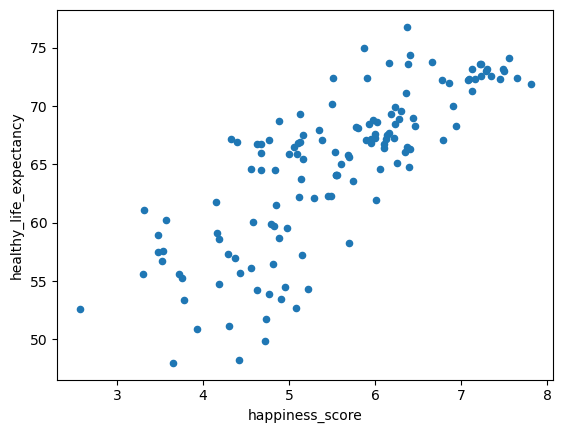

In [16]:
country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.

## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [1]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

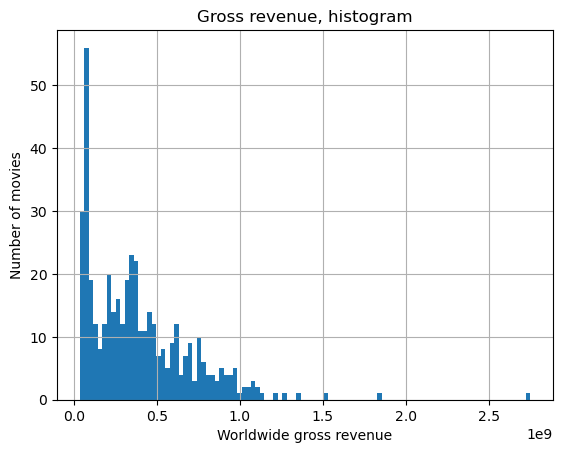

In [2]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

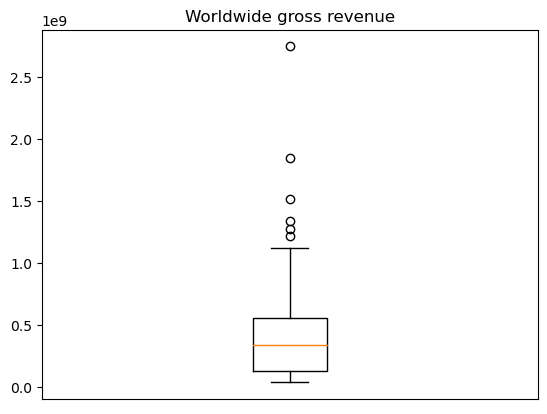

In [3]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

Text(0, 0.5, 'IMDB rating')

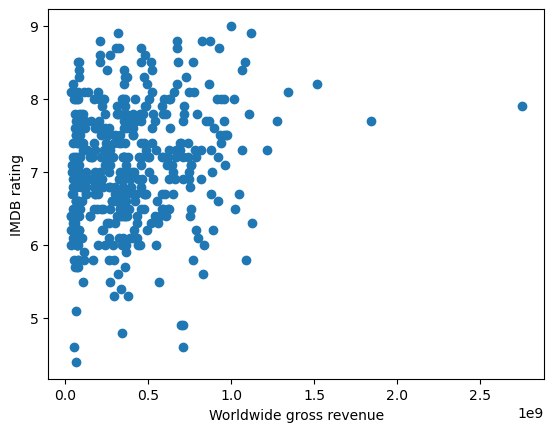

In [4]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

Text(0, 0.5, 'IMDB rating')

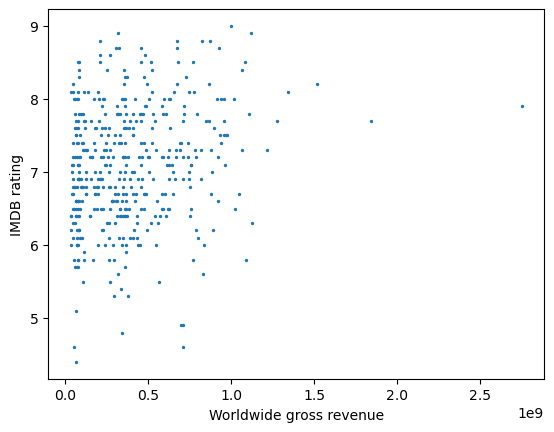

In [5]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

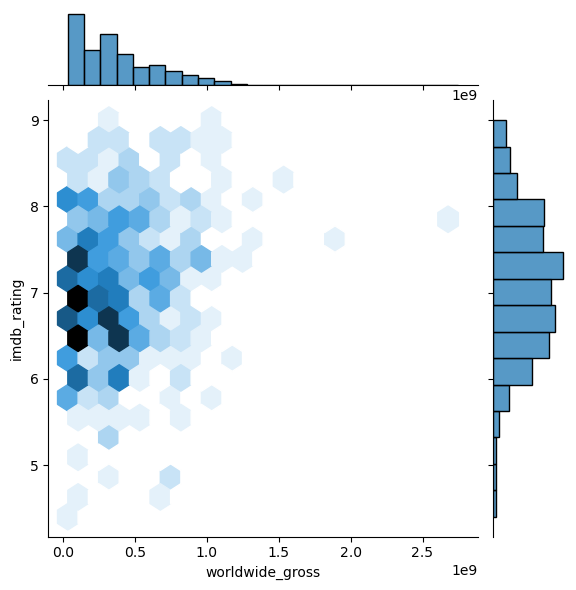

In [6]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

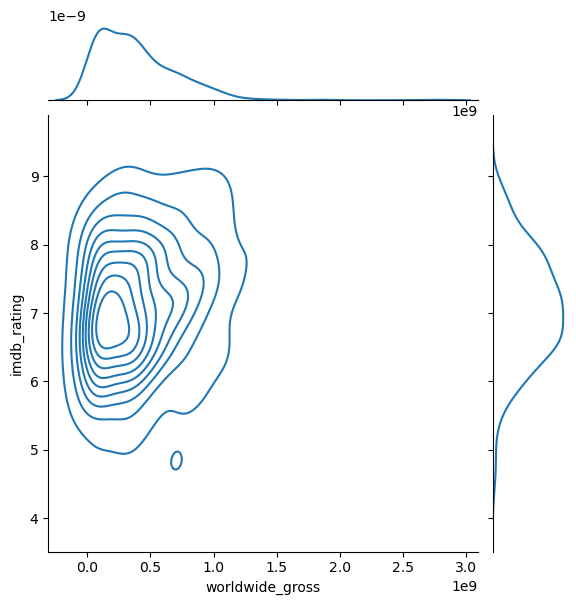

In [7]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


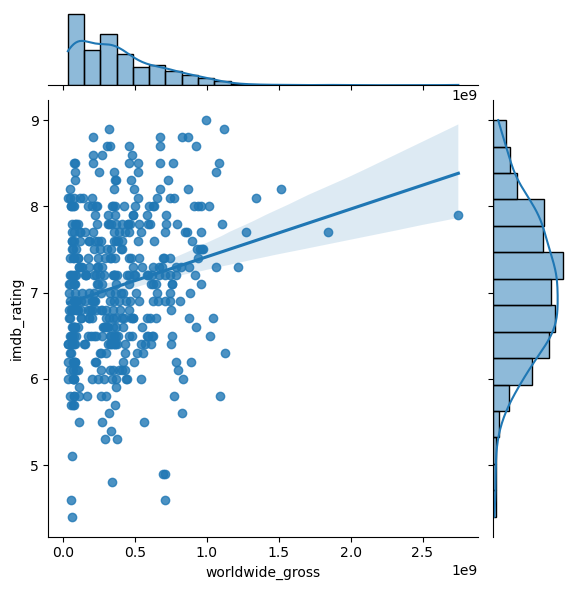

In [8]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

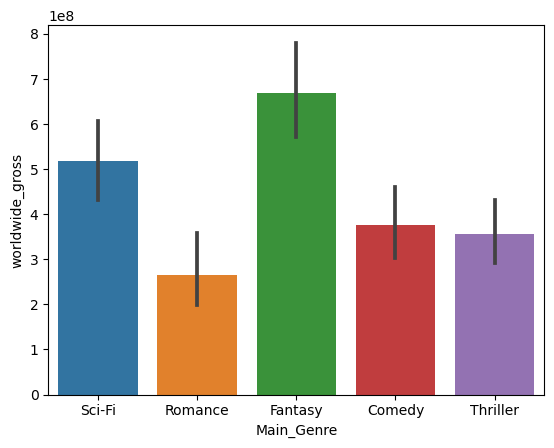

In [9]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

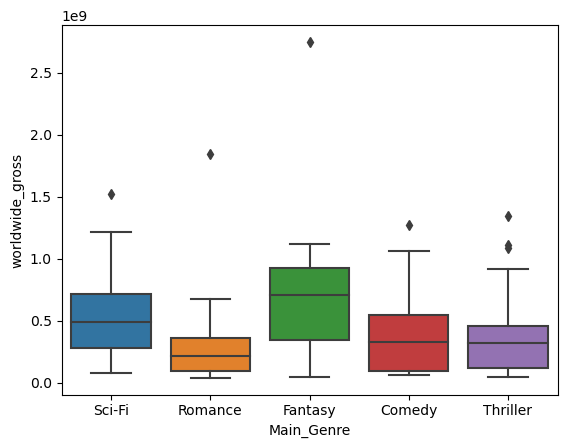

In [10]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

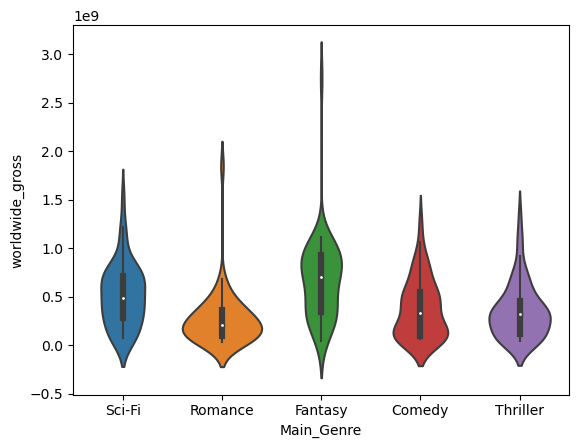

In [11]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [12]:
# Calculate yearly stats across movies here

stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))

Text(0, 0.5, 'Worldwide gross revenue')

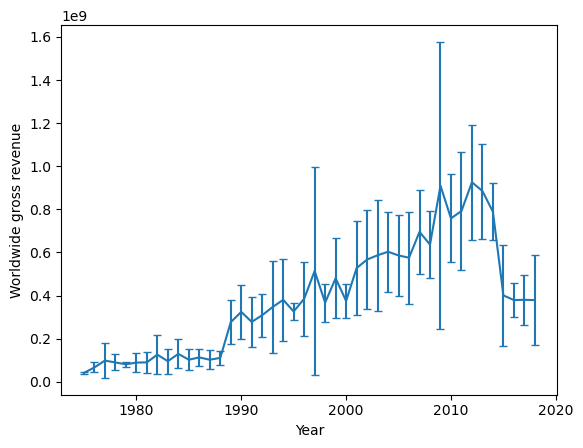

In [13]:
# Write your code to make plot with errorbars here

plt.errorbar(stats_by_year.index, stats_by_year.average_worldwide_gross,
             yerr = stats_by_year.std_dev_worldwide_gross,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

Text(0, 0.5, 'Worldwide gross revenue')

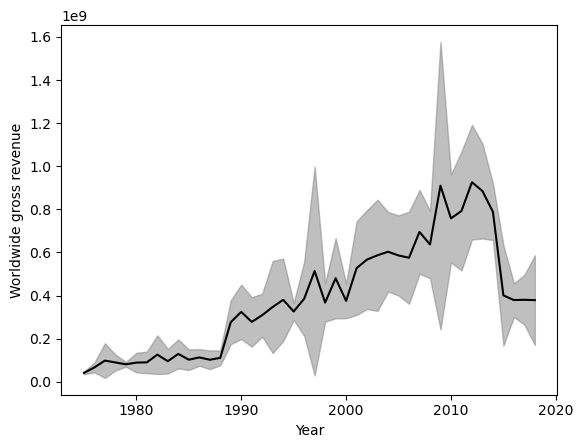

In [14]:
# Write your code to make filled plot here

plt.fill_between(stats_by_year.index, stats_by_year.average_worldwide_gross - stats_by_year.std_dev_worldwide_gross,
                 stats_by_year.average_worldwide_gross + stats_by_year.std_dev_worldwide_gross, alpha = 0.5, color = 'gray')
plt.plot(stats_by_year.average_worldwide_gross, color = 'black')

plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

In [15]:
# Write your interpretation here

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [16]:
# Calculate stats by genre here

stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({
        'length': x['length'].values
    }))

Text(0, 0.6, 'Number of movies')

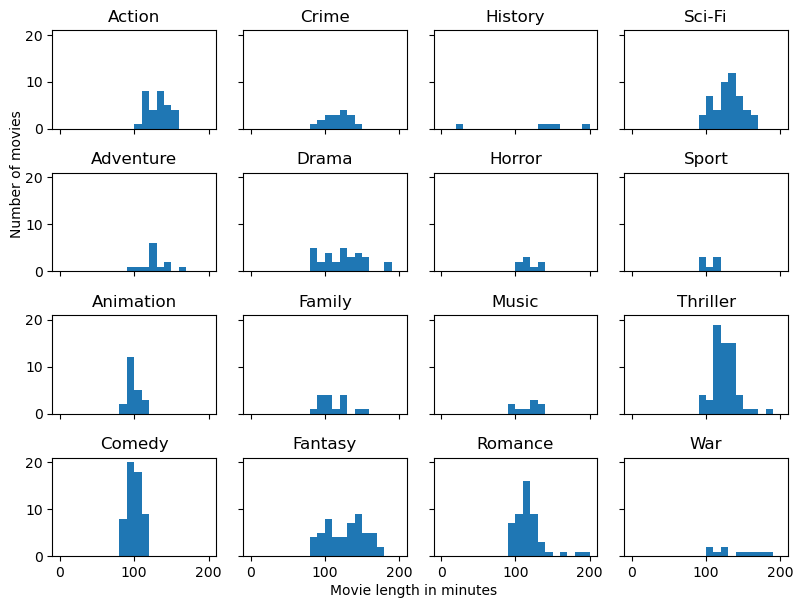

In [17]:
# Write your code to make 4x4 panel here

fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(stats_by_genre.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(stats_by_genre.index[i])
    
fig.tight_layout()

fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)

In [18]:
# Write your interpretation here

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

<AxesSubplot:xlabel='studio', ylabel='Main_Genre'>

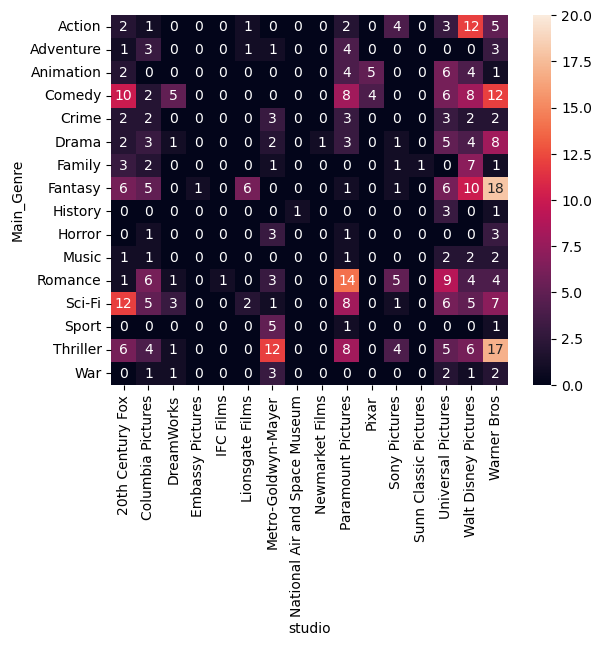

In [19]:
# Write your code to make the first heatmap here

df2 = pd.crosstab(movies['Main_Genre'],movies['studio'])
sns.heatmap(df2, annot=True, vmin = 0, vmax = 20)

<AxesSubplot:xlabel='Genre_2', ylabel='Main_Genre'>

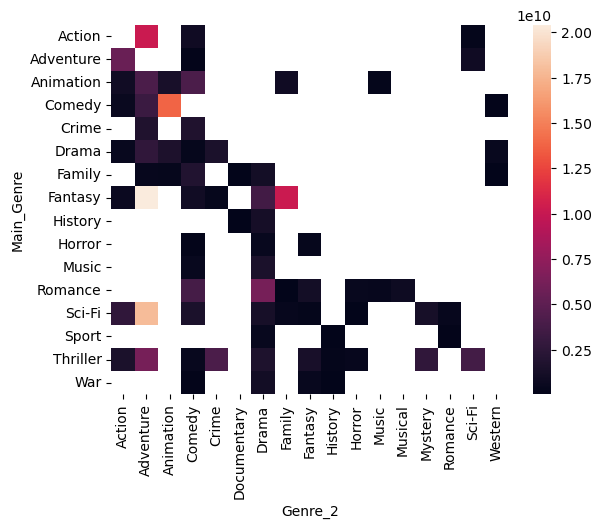

In [20]:
# Write your code to make the second heatmap here

df3 = pd.crosstab(movies['Main_Genre'],movies['Genre_2'], values = movies['worldwide_gross'],
                  margins=False, aggfunc='sum')

sns.heatmap(df3, annot=False)

In [21]:
# Write your interpretations here

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

In [22]:
# Write your dataviz show-off code here

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

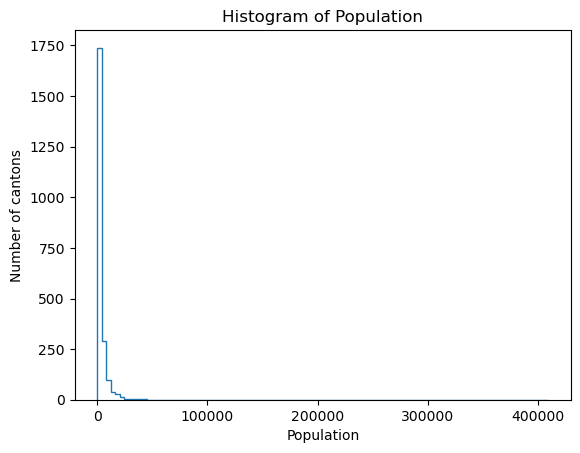

In [23]:
# Write your code here

#plot out the histogram of population Counts in December
plt.hist(pop_per_commune.population_Dec,bins=100,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()



__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

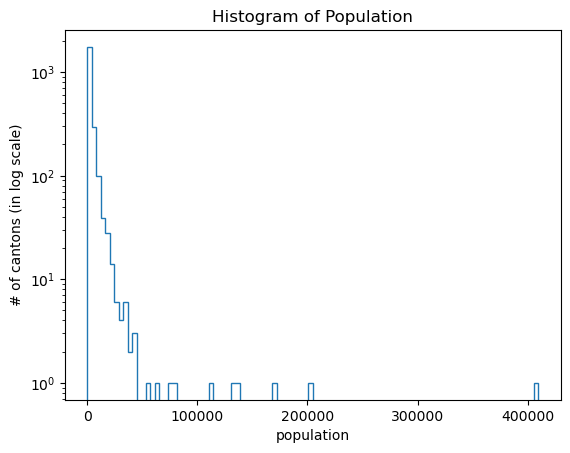

In [24]:
# Write your code here

array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

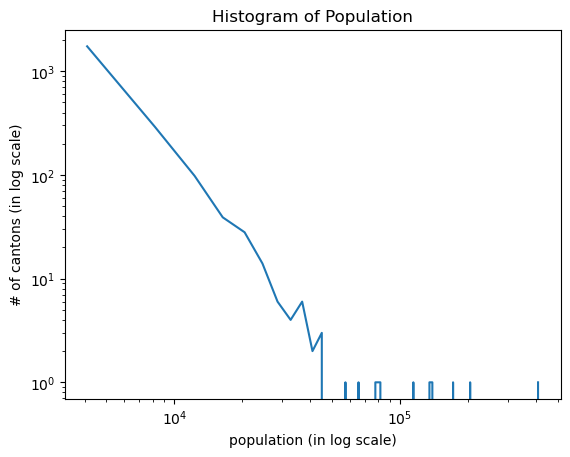

In [25]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

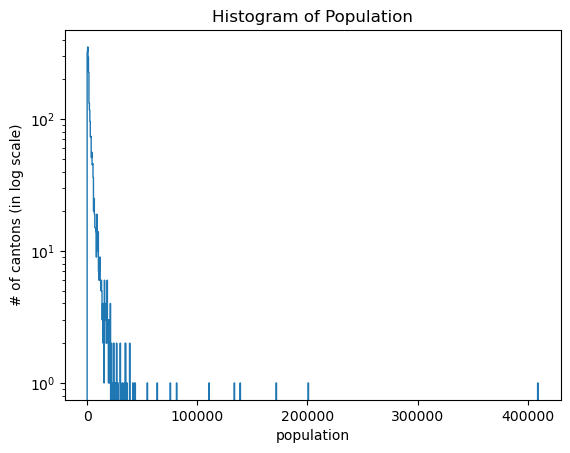

In [26]:
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

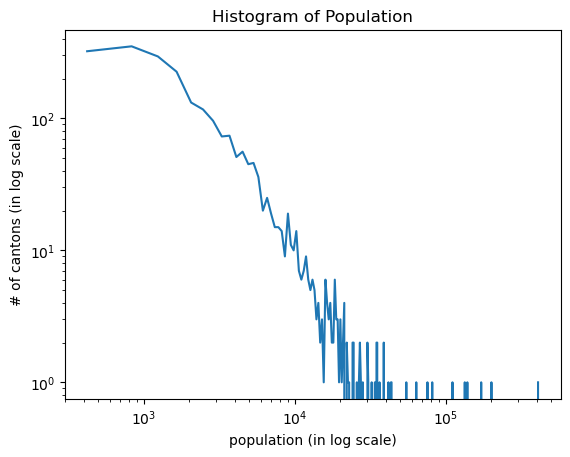

In [27]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

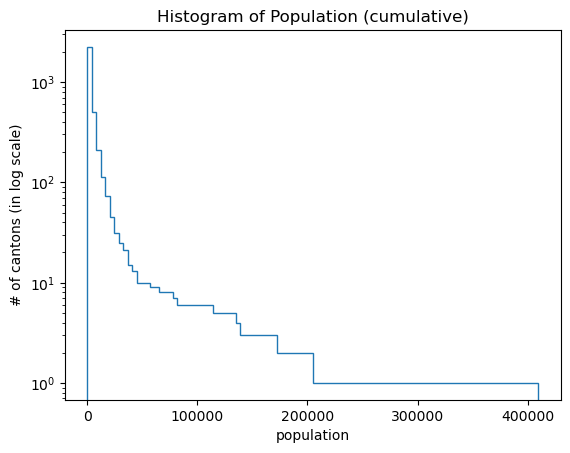

In [28]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

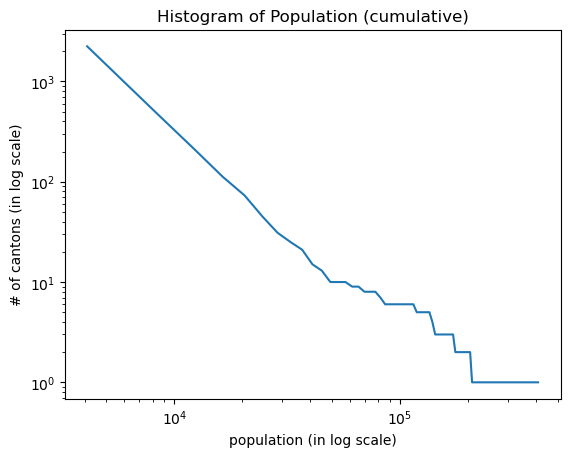

In [29]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()


In [30]:
# Write your interpretations here

# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [3]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
df.sample(10)

CensusId        State        County  TotalPop     Men   Women  Hispanic  \
2628     48211        Texas      Hemphill      4115    2021    2094      33.0   
1801     35011   New Mexico       De Baca      2020     907    1113      45.1   
32        1065      Alabama          Hale     15256    7183    8073       1.1   
2091     39097         Ohio       Madison     43456   23851   19605       1.6   
1732     31157     Nebraska  Scotts Bluff     36684   17699   18985      22.4   
988      20201       Kansas    Washington      5686    2885    2801       3.3   
30        1061      Alabama        Geneva     26815   13174   13641       3.6   
2742     48439        Texas       Tarrant   1914526  937266  977260      27.6   
1434     28067  Mississippi         Jones     68276   33051   35225       4.2   
2119     39153         Ohio        Summit    541847  262467  279380       1.8   

      White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
2628   64.0    1.0     0.4  ...   2.4          0.7         3.8         17.6   
1801   50.2    0.0     0.0  ...   2.8          2.1         7.4         12.7   
32     40.0   58.2     0.3  ...   0.3          1.5         1.2         29.8   
2091   89.3    5.8     0.4  ...   1.2          1.1         3.9         24.9   
1732   73.9    0.7     0.9  ...   2.0          1.4         3.7         15.2   
988    94.5    0.8     0.4  ...   4.0          1.6         5.9         18.1   
30     84.0    8.7     0.3  ...   0.9          1.8         3.4         25.8   
2742   49.8   15.1     0.3  ...   1.2          1.4         3.9         26.5   
1434   65.2   28.9     0.2  ...   1.0          1.6         1.4         21.8   
2119   78.6   14.2     0.2  ...   1.4          0.5         2.9         22.9   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
2628      1812         71.1        16.4          12.5         0.0   
1801       619         66.2        25.5           8.2         0.0   
32        5282         76.3        17.6           5.8         0.3   
2091     18617         78.4        14.8           6.7         0.1   
1732     17970         79.7        12.9           7.2         0.2   
988       2950         72.4        16.7          10.4         0.4   
30       10419         75.7        15.0           8.8         0.4   
2742    924741         83.1        11.4           5.4         0.1   
1434     26436         75.9        18.6           5.4         0.1   
2119    258416         84.2        11.2           4.5         0.1   

      Unemployment  
2628           3.7  
1801           5.2  
32            13.3  
2091           5.9  
1732           5.5  
988            3.1  
30            11.2  
2742           6.9  
1434           7.4  
2119           8.4  

[10 rows x 37 columns]

- We will focus first on income per capita across counties.

<AxesSubplot:>

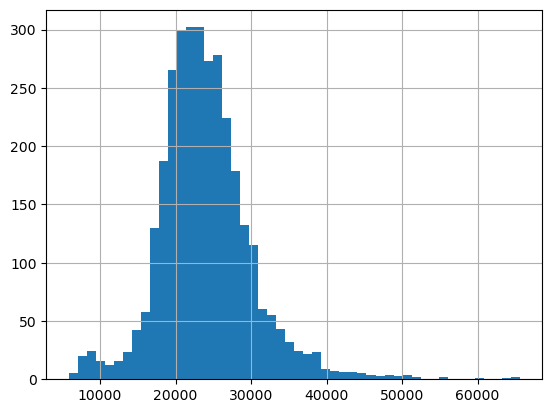

In [5]:
df['IncomePerCap'].hist(bins = 50)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [6]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [7]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [8]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [9]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [10]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

198527.6
1645593.4


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [11]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

(0.2646136320394489, 9.942215354237806e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [12]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SpearmanrResult(correlation=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [13]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [14]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [15]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

Ttest_indResult(statistic=0.19788117232375713, pvalue=0.8434785239169611)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

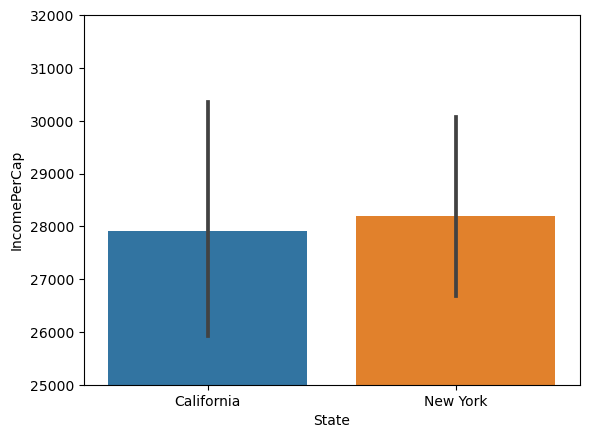

In [16]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [17]:
# there is no clear association, very small positive correlation

Text(6.750000000000009, 0.5, 'Income per Capita [$]')

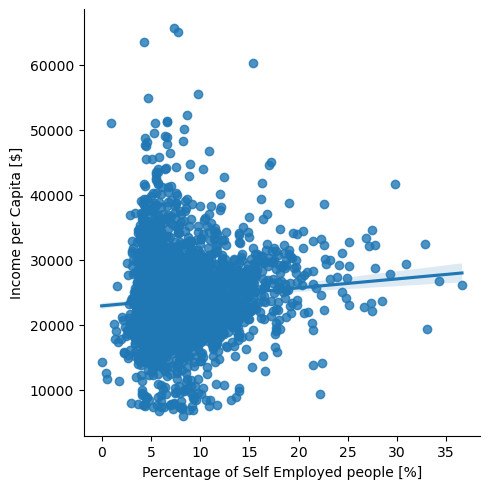

In [18]:
import seaborn as sn

per_capita_self_empl = df[['State','IncomePerCap', 'SelfEmployed']]
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")

In [19]:
print(stats.pearsonr(per_capita_self_empl['SelfEmployed'],per_capita_self_empl['IncomePerCap']))

(0.08727386609551788, 7.052861196521423e-07)


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [20]:
# weak negative association

(0.0, 22.0)

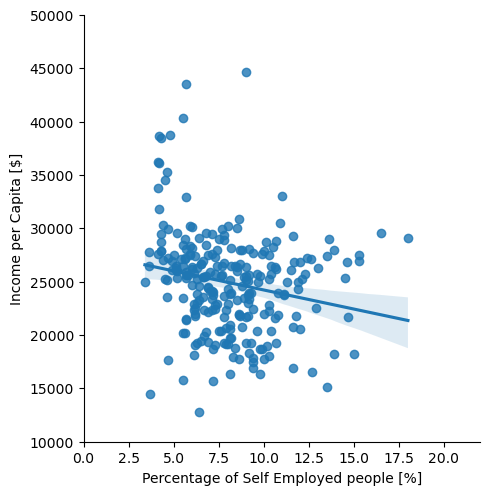

In [22]:
SetA_per_capita_self_empl = per_capita_self_empl.query("State == 'Wisconsin' | \
                                                        State == 'Tennessee' | \
                                                        State == 'Minnesota' ") 

sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetA_per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])

In [23]:
print(stats.pearsonr(SetA_per_capita_self_empl['SelfEmployed'],SetA_per_capita_self_empl['IncomePerCap']))

(-0.202293507365215, 0.0011881639322139396)


**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [24]:
# In Wisconsin, the nagative dependency is the strongest.

(0.0, 22.0)

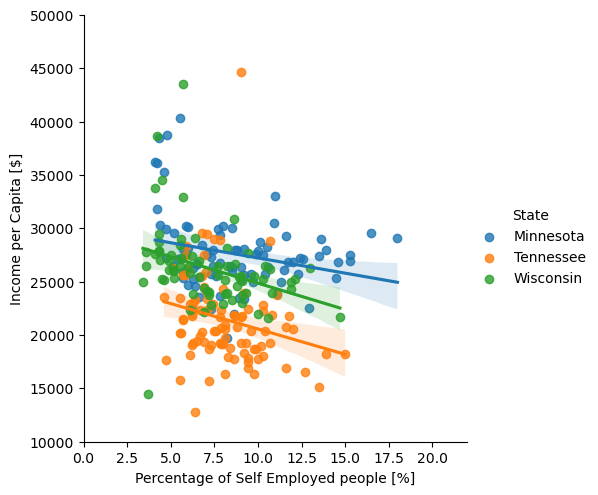

In [26]:
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetA_per_capita_self_empl, hue = 'State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])

In [27]:
Wisconsin_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Wisconsin'") 
Tennessee_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Tennessee'") 
Minnesota_per_capita_self_empl = SetA_per_capita_self_empl.query("State == 'Minnesota'") 

print(stats.pearsonr(Wisconsin_per_capita_self_empl['SelfEmployed'],Wisconsin_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Tennessee_per_capita_self_empl['SelfEmployed'],Tennessee_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Minnesota_per_capita_self_empl['SelfEmployed'],Minnesota_per_capita_self_empl['IncomePerCap']))

(-0.32905300016378525, 0.004768134887745222)
(-0.23836048684913147, 0.02001163195552807)
(-0.2538551921654062, 0.01766519930091192)


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In [28]:
# There is a weak negative dependency overall, moderate to strong positive when disaggregated.
# This is a Simpson’s Paradox: the effect is reversed when the data is aggregated.
# We would recommend in set B, not in set A (there is significant positive correlation within
# all states separately in set B).

(0.0, 25.0)

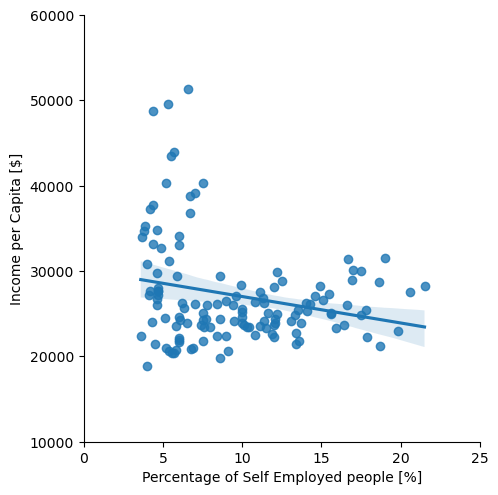

In [30]:
SetB_per_capita_self_empl = per_capita_self_empl.query("State == 'New Jersey' | \
                                                        State == 'Kansas' | \
                                                        State == 'Rhode Island' ") 

sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetB_per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,60000])
plt.xlim([0,25])

In [31]:
print(stats.pearsonr(SetB_per_capita_self_empl['SelfEmployed'],SetB_per_capita_self_empl['IncomePerCap']))

(-0.2322214134608569, 0.007607493042857402)


(0.0, 25.0)

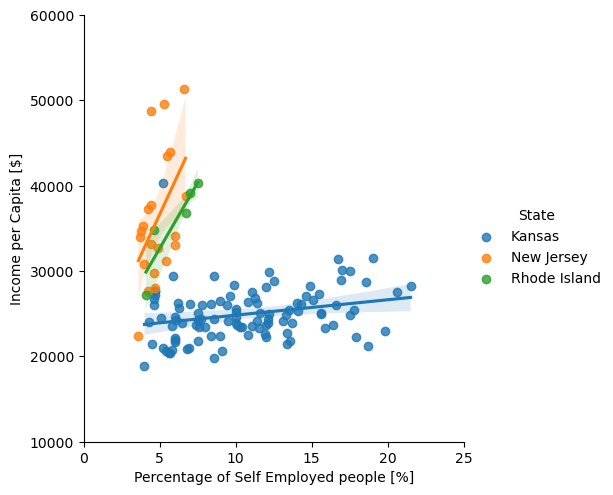

In [34]:
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetB_per_capita_self_empl, hue = 'State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,60000])
plt.xlim([0,25])

In [33]:
NJ_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'New Jersey'") 
Kansas_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'Kansas'")
RI_per_capita_self_empl = SetB_per_capita_self_empl.query("State == 'Rhode Island'") 

In [35]:
print(stats.pearsonr(NJ_per_capita_self_empl['SelfEmployed'],NJ_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(Kansas_per_capita_self_empl['SelfEmployed'],Kansas_per_capita_self_empl['IncomePerCap']))
print(stats.pearsonr(RI_per_capita_self_empl['SelfEmployed'],RI_per_capita_self_empl['IncomePerCap']))

(0.48044784713362815, 0.027488944757806236)
(0.2581029971443692, 0.00785335184683246)
(0.9021788382149805, 0.03618310201575917)


# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [36]:
# The correct answer: c) 350. We read from boxplot that 114,00 is the 25th percentile. If 110,000 is the 20th
# percentile, 5% of data is between, 0.05*7000 = 350 persons.

### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [37]:
# The correct answer: b) boxplot and histogram

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [38]:
# The correct answer: c) 0.034
# from statsmodels.stats import proportion
# print(proportion.binom_test(28, 100, 0.2, alternative='larger'))

### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [3]:
# The correct answer: c) Sampling 1000 height values with replacement and computing the mean.
# This is repeated 10000 times to create a sorted list of the 10000 means. 
# The CI is defined by the 250th and the 9750th value in sorted order.

# For implementation of bootstrapping function you can follow this post: https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/

import numpy as np

def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)
        
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    
    return (lower_bound, upper_bound)

# Example usage:
data = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
print(bootstrap_confidence_interval(data))


(7.6, 14.6)


### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [1]:
# The correct answer: a) There could be a positive Spearman’s correlation 
# between GPA and entry-level job salary in every single department of EPFL.
# This is known as Simpson's paradox, check out https://en.wikipedia.org/wiki/Simpson%27s_paradox

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [41]:
# The correct answer: d) None of the above. The data is not necessarily heavy-tailed nor skewed, a signle outlier
# could shift the average.

### Welcome! In this lab session, you will familiarize yourself with regression analysis. We will learn how to do descriptive regression analysis in python. We will use the statsmodels library. After an introductory tutorial, you will work on solving an exercise that we prepared for you.

### References:
- More information on formula syntax: https://patsy.readthedocs.io/en/latest/formulas.html
- More information on statsmodels: https://www.statsmodels.org/dev/example_formulas.html

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

## Statsmodels tutorial

We will use a dataset with information about patients with cardiovascular diseases. Here is the breakdown of columns:

Some variables are categorical:
- 'DEATH_EVENT': if the patient deceased during the follow-up period
- 'sex': male/female (binary, male 1, female 0)
- 'anaemia': decrease of red blood cells (boolean, yes 1)
- 'smoking': if the patient smokes or not (boolean, yes 1)
- 'diabetes': if the patient has diabetes (boolean, yes 1)
- 'high_blood_pressure': if the person has hypertension (boolean, yes 1)


... and some are continuous/discrete:
- 'age': patient's age
- 'creatinine_phosphokinase': level of CPK enzyme in the blood (mcg/L)
- 'ejection_fraction': percentage of blood leaving the heart in each contraction
- 'platelets': platelets in the blood (kiloplatelets/mL)
- 'serum_creatinine': level of serum creatinine in the blood (mg/dL)
- 'serum_sodium': level of serum sodium in the blood (mEq/L)
- 'time': duration of the follow-up period (number of days in the hospital)


In [3]:
df.sample(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
240  70.0        0                        81         1                 35   
81   67.0        0                       582         0                 50   
69   65.0        0                       113         1                 25   
154  65.0        1                       335         0                 35   
172  70.0        1                       171         0                 60   
63   45.0        0                       582         0                 35   
67   72.0        1                       110         0                 25   
84   59.0        1                       280         1                 25   
100  65.0        1                       305         0                 25   
164  45.0        0                      2442         1                 30   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
240                    1  533000.00              1.30           139    0   
81                     0  263358.03              1.18           137    1   
69                     0  497000.00              1.83           135    1   
154                    1  235000.00              0.80           136    0   
172                    1  176000.00              1.10           145    1   
63                     0  385000.00              1.00           145    1   
67                     0  274000.00              1.00           140    1   
84                     1  302000.00              1.00           141    0   
100                    0  298000.00              1.10           141    1   
164                    0  334000.00              1.10           139    1   

     smoking  time  DEATH_EVENT  
240        0   212            0  
81         1    76            0  
69         0    67            1  
154        0   120            0  
172        1   146            0  
63         0    61            1  
67         1    65            1  
84         0    78            1  
100        0    87            0  
164        0   129            1

In [4]:
# 299 patients
len(df)

299

## Part 1 Linear regression: Modelling time spent at the hospital

- We will perform a regression analysis to model the number of days spent at the hospital, among the population of patients.


- To get started with our model, we need two components:

   1. The equation describing the model
   2. The data
   
   
- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.
    
    
- Intercepts are added by default.


- Categorical variables can be included directly by adding a term C(a). More on that soon!


- For (2), we can conveniently use pandas dataframe.

### An example

- Let's start with an example from our dataset. We are interested in two predictors: diabetes and high blood pressure. These are the two predictors that we want to use to fit the outcome, the number of days spent at the hospital, using a linear regression.

- A model that achieves this is formulated as:
        time ~ C(diabetes) + C(high_blood_pressure)
        
- We can create this model using smf.ols().

- OLS stands for ordinary least squares linear regression.

- The two components: the formula and the data are stated explicitly.

- The terms in the formula are columns in pandas dataframe. Easy!

In [5]:
# Declares the model
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)

In [6]:
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

In [7]:
# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Tue, 18 Oct 2022   Prob (F-statistic):            0.00254
Time:                        16:02:21   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### A lot of useful information is provided by default.

- The dependent variable : time (number of days at the hospital)
- Method: The type of model that was fitted (OLS)
- Nb observations: The number of datapoints (299 patients)
- R2: The fraction of explained variance
- A list of predictors
- For each predictor: coefficient, standard error of the coefficients, p-value, 95% confidence intervals. We can see that only high blood pressure is a significant predictor (p = 0.001), while diabetes is not (0.584).
- Warnings if there are numerical issues (hopefully not!)

### Now, we can interpret the model that we just fitted.

- Notice how C(diabetes)[T.1] is created based on the original diabetes feature. This means that the dummy variable is encoded such that the associated coefficient tells us about the value among the diabetes = yes subpopulation.


- We interpret the model in the following way: days at hospital = 139 + 4.9 * diabetes - 31.8 * high blood pressure. Thus:
    1. People who don't have diabetes nor high blood pressure stay at the hospital on average for 139 days
    2. People who have diabetes, but don't have blood pressure stay for 139 + 4.9 days ~ 144 days
    3. People who don't have diabetes, but have blood pressure stay for 139 - 31 days ~ 108 days
    4. People who have diabetes and blood pressure stay for 139 + 4.9 - 31.8 ~ 112 days
    
- We calculate the means explicitly to make sure they are the same as what we just calculated with regression!

In [8]:
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 0)]['time'].mean())
print(df.loc[(df['diabetes'] == 0) & (df["high_blood_pressure"] == 1)]['time'].mean())
print(df.loc[(df['diabetes'] == 1) & (df["high_blood_pressure"] == 1)]['time'].mean())

139.0
144.8170731707317
108.25806451612904
111.46511627906976


- Isn't it strange that high blood pressure has a negative coefficient? It seems like the patients who have high blood pressure stay at the hospital for shorter number of days, even though one would expect the opposite. Lets' get to that!

## Part 2 Linear regression with interaction terms: Modelling time spent at the hospital V2

- One reason why serious conditions can be associated with lower time spent at the hospital is because of a third confounding factor: death 💀. Patients who have a serious condition might spend less time at the hospital because they die.

- Let's get a better sense of what is happening by modeling the time spent at the hospital with death as a predictor.

- This time we will add interaction features.

In [9]:
# we use a*b to add terms: a, b, a:b, and intercept

mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.32e-22
Time:                        16:02:21   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Interpretation:

- This model lets us see that death is associated with a lower number of days spent at the hospital.
- Notice how R2 is much larger compared to the previous model: more variance in the data is explained.
- Those that have high blood pressure stay for less time (-26 days on average), those who have blood pressure __and__ die spend 110 days less hospitalized on average, although this is not statistically significant.

## Part 3 Logistic regression: Modelling the binary death outcome

- Finally, let's model the binary outcome of death, based on all patients' features.
- We will exclude time spent at the hospital, since we saw how it is strongly correlated with death.

### First, we will do standardization of continuous predictors. This will let us interpret the predictors that are of vastly different scales (from percents to thousands).

In [10]:
# how we standardize the countinuous variables

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean())/df['creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean())/df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean())/df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean())/df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean())/df['serum_sodium'].std()

### Instead of linear, we will now use a logistic regression to model the binary outcome.

In [11]:
# logit is logistic regression. The other parameters are the same as before

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.2160
Time:                        16:02:21   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

#### Looks good! We have a reasonably high R2 (0.216). In addition to reading the coefficients from the summary table, let's access them programmatically from the res object.

In [12]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

0         1
Intercept                   -1.872683 -0.453819
C(diabetes)[T.1]            -0.431428  0.734243
C(high_blood_pressure)[T.1] -0.180976  1.018851
C(sex)[T.1]                 -1.086628  0.288599
C(anaemia)[T.1]             -0.171894  1.007753
C(smoking)[T.1]             -0.547629  0.818807
age                          0.356256  0.968609
creatinine_phosphokinase     0.010320  0.553497
ejection_fraction           -1.177018 -0.487482
platelets                   -0.379319  0.240561
serum_creatinine             0.333085  1.036318
serum_sodium                -0.538702  0.038621

### Now we can visualize the effect of all the predictors. Let's first sort them by the coefficients.

In [13]:
#sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)

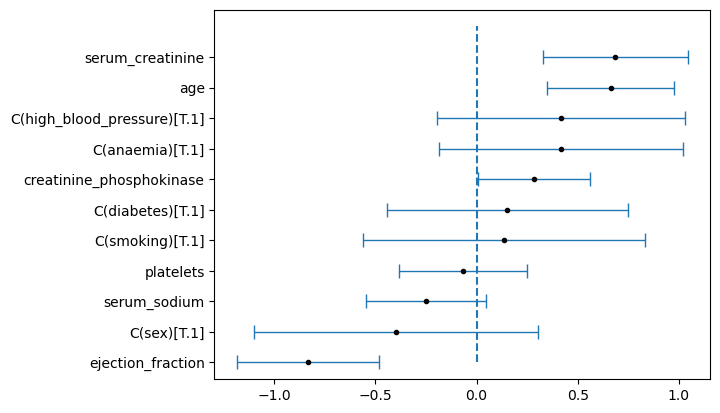

In [14]:
#fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

### Interpretation:
- Serum creatinine level in the blood and age are significant positive predictors of death.
- High ejection fraction (a healthy heart) is a sigificant negative predictor of death.
- Since all predictors are standardized, we can interpret in the following way:
    - When all other predictors take mean values, an increase of age by 1 standard deviation, leads on average to an increase by 0.66 of log odds of death.
    - When all other predictors take mean values, increase of ejection fraction by 1 standard deviation, leads on average to a  decrease by 0.83 of log odds of death.

### Interpreting log odds

- Why log odds? remember that that's what logistic regression models.
    - Notice that log odds are a bit difficult to interpret.
    - If an event has probability p, it has odds p/(1-p).
    - This is a non-linear transformation over p. See the plot below!

/var/folders/w2/r0gyc44j5b5bd6l08qvj5b140000gn/T/ipykernel_1142/4165489063.py:10: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(odds, np.log(odds))
/var/folders/w2/r0gyc44j5b5bd6l08qvj5b140000gn/T/ipykernel_1142/4165489063.py:15: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(p, np.log(odds))


Text(0, 0.5, 'log odds')

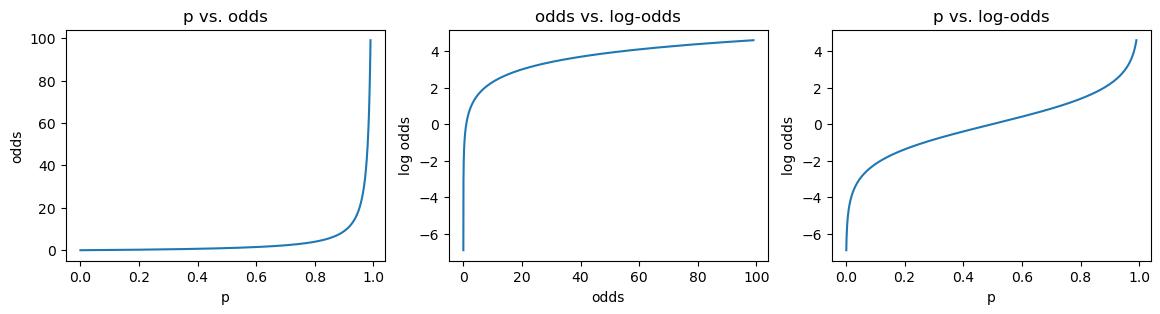

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0, 0.99, 1000)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")

With this in mind, calculate:

1. If p = 0.1 and you have a change in log odds equals to +0.66, what will be your new p?

1. If p = 0.9 and you have a change in log odds equals to +0.66, what will be your new p?

In [16]:
def p_to_log_odds(p):
    return np.log(p/(1-p))
def log_odds_to_p(odds):
    return np.exp(odds) / (1+ np.exp(odds))

In [17]:
p_to_log_odds(0.1)

-2.197224577336219

In [18]:
log_odds_to_p(-2.197224577336219)

0.10000000000000003

In [19]:
odds = p_to_log_odds(0.1)
log_odds_to_p(odds + 0.66)

0.17693910183506342

In [20]:
odds = p_to_log_odds(0.9)
log_odds_to_p(odds + 0.66)

0.9456909311361745

**Comment:** Notice that first increase of + 0.66 in log odds corresponds to roughtly a increase of ~7.7 percentage points! While the second increase corresponds to ~4.5 percentage points.

### Controlling for variables

Notice that independent variables (those used as features of our regression model) are often correlated!

For instance serum creatinine, a blood measurement, is an important indicator of kidney health. 
We may want to study its impact in patients' outcomes (in this case, death).

1. Using a logistic regression model estimate the effect of serum creatinine to a patient's health.

In [21]:
"""Your code here"""

mod = smf.logit(formula='DEATH_EVENT ~  serum_creatinine', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.580689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                 0.07485
Time:                        16:02:21   Log-Likelihood:                -173.63
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.154e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7429      0.131     -5.683      0.000      -0.999      -0.487
serum_creat

2. Notice that serum creatinine is significantly correlated with age, that is, the older you are, the highest your value for serum creatinine will be (which is bad!). With this in mind, repeat the logistic regression now using serum creatinine _and_ age as predictor variables. What do you think will happen to the coefficient of serum-creatinine? Decrease or increase?

In [22]:
import scipy.stats as stats
stats.pearsonr(df["age"].values, df["serum_creatinine"])

(0.1591871332835501, 0.0058034329412028325)

In [23]:
"""Your code here"""

mod = smf.logit(formula='DEATH_EVENT ~  serum_creatinine + age', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.558734
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.1098
Time:                        16:02:21   Log-Likelihood:                -167.06
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.117e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7976      0.136     -5.880      0.000      -1.063      -0.532
serum_creat

**Comment:** Notice that the model R-squ. increased! And that the effect of `serum_creatinine` decreased from ~0.85 to  ~0.73! One way to think about this is that since the two are correlated, serum creatinine was also working as a proxy for age, but when we add age explicitly, this proxy effect disappears!

### Log-transformations


Remember from class that a log transform in the dependent variable (y) makes the model multiplicative.

1. Fit a linear model to predict the time spent in the hospital (`time`) as a function of variables `high_blood_pressure`, `diabetes` and `DEATH_EVENT`.

2. Now perform a log transform in the variable `time`, that is, create another column in the dataframe containing the `log` of time. Repeat the model, now using the log of time as the dependent variable.

3. Calculate what is the _additive_ effect of having `high_blood_pressure` in the time spent in the hospital in the first model, and what is the _multiplicative_ effect of having `high_blood_pressure` in the second.

In [24]:
# reload the data to undo the std transforms
data_folder = './data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

In [25]:
"""Your code here"""

mod = smf.ols(formula='time ~  high_blood_pressure + diabetes + DEATH_EVENT', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           6.12e-23
Time:                        16:02:21   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             164.5089    

In [26]:
"""Your code here"""
df["logtime"] = np.log(df["time"])
mod = smf.ols(formula='logtime ~  high_blood_pressure + diabetes + DEATH_EVENT', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                logtime   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.05
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.75e-28
Time:                        16:02:21   Log-Likelihood:                -325.52
No. Observations:                 299   AIC:                             659.0
Df Residuals:                     295   BIC:                             673.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9891    

**Comment:** In the first model, `high_blood_pressure` is associated with an additive coefficient of around -25. Thus, in the model, whenever a patient has high blood pressure we deduce -25 days out of the prediction.
In the second model, `high_blood_pressure` is associated with an multiplicative coefficient of around -0.22. This means that, in the model, whenever a patient has high blood pressure we multiply his or her outcome by $e^{-0.22} \simeq 0.80$. 



### Welcome to the exercise about observational studies! This exercise will be hands-on, and you will be able to practice the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

data_folder = './data/'
lalonde_data = pd.read_csv(data_folder + 'lalonde.csv')

In [2]:
lalonde_data.sample(10)

id  treat  age  educ  black  hispan  married  nodegree       re74  \
603  PSID419      0   51     4      1       0        0         1      0.000   
17     NSW18      1   23    10      1       0        0         1      0.000   
398  PSID214      0   20    11      0       0        1         1   2547.047   
552  PSID368      0   40    11      1       0        1         1      0.000   
91     NSW92      1   17    10      1       0        0         1      0.000   
563  PSID379      0   33    12      0       1        1         0      0.000   
573  PSID389      0   18    11      1       0        0         1      0.000   
340  PSID156      0   20    13      0       0        0         0      0.000   
410  PSID226      0   39    10      1       0        0         1    844.444   
255   PSID71      0   46    11      0       0        1         1  14753.280   

          re75       re78  
603     0.0000     0.0000  
17      0.0000  7693.4000  
398  1099.2580     0.0000  
552     0.0000     0.0000  
91      0.0000     0.0000  
563     0.0000  5841.4530  
573     0.0000  7146.2860  
340  2352.4840     0.0000  
410   889.7903   701.9201  
255  5299.3550     0.0000

## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

In [3]:
treated = lalonde_data.loc[lalonde_data['treat'] == 1] #People that attained the programme
control = lalonde_data.loc[lalonde_data['treat'] == 0] #People that didn't attain the programme

In [4]:
treated.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [5]:
control.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

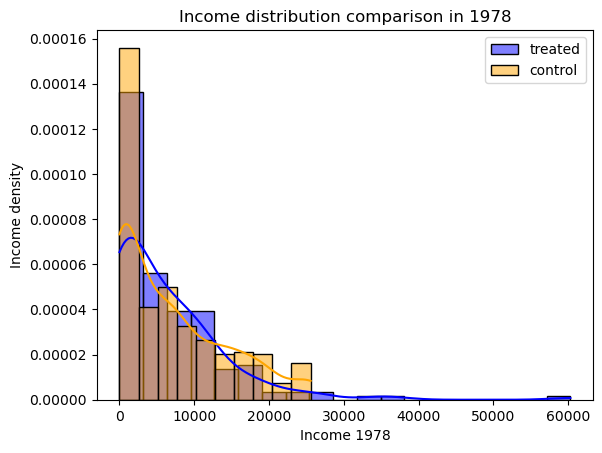

In [6]:
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

The treated group has:

1. lower mean earnings value
2. higher first (25%) percentile - low income interval (though)
3. Some outliers of really high income rates - with maximum income

The control group has:
1. higher mean earnings value
2. higher percentile (50%,75%)
3. higher number of people with income in the interval 12000 - 27000

We conclude that, in general, the control group outperforms the treated one in most of the cases.

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

In [7]:
# These are examples of possible plots

/Users/sakota/opt/anaconda3/envs/ada2023/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


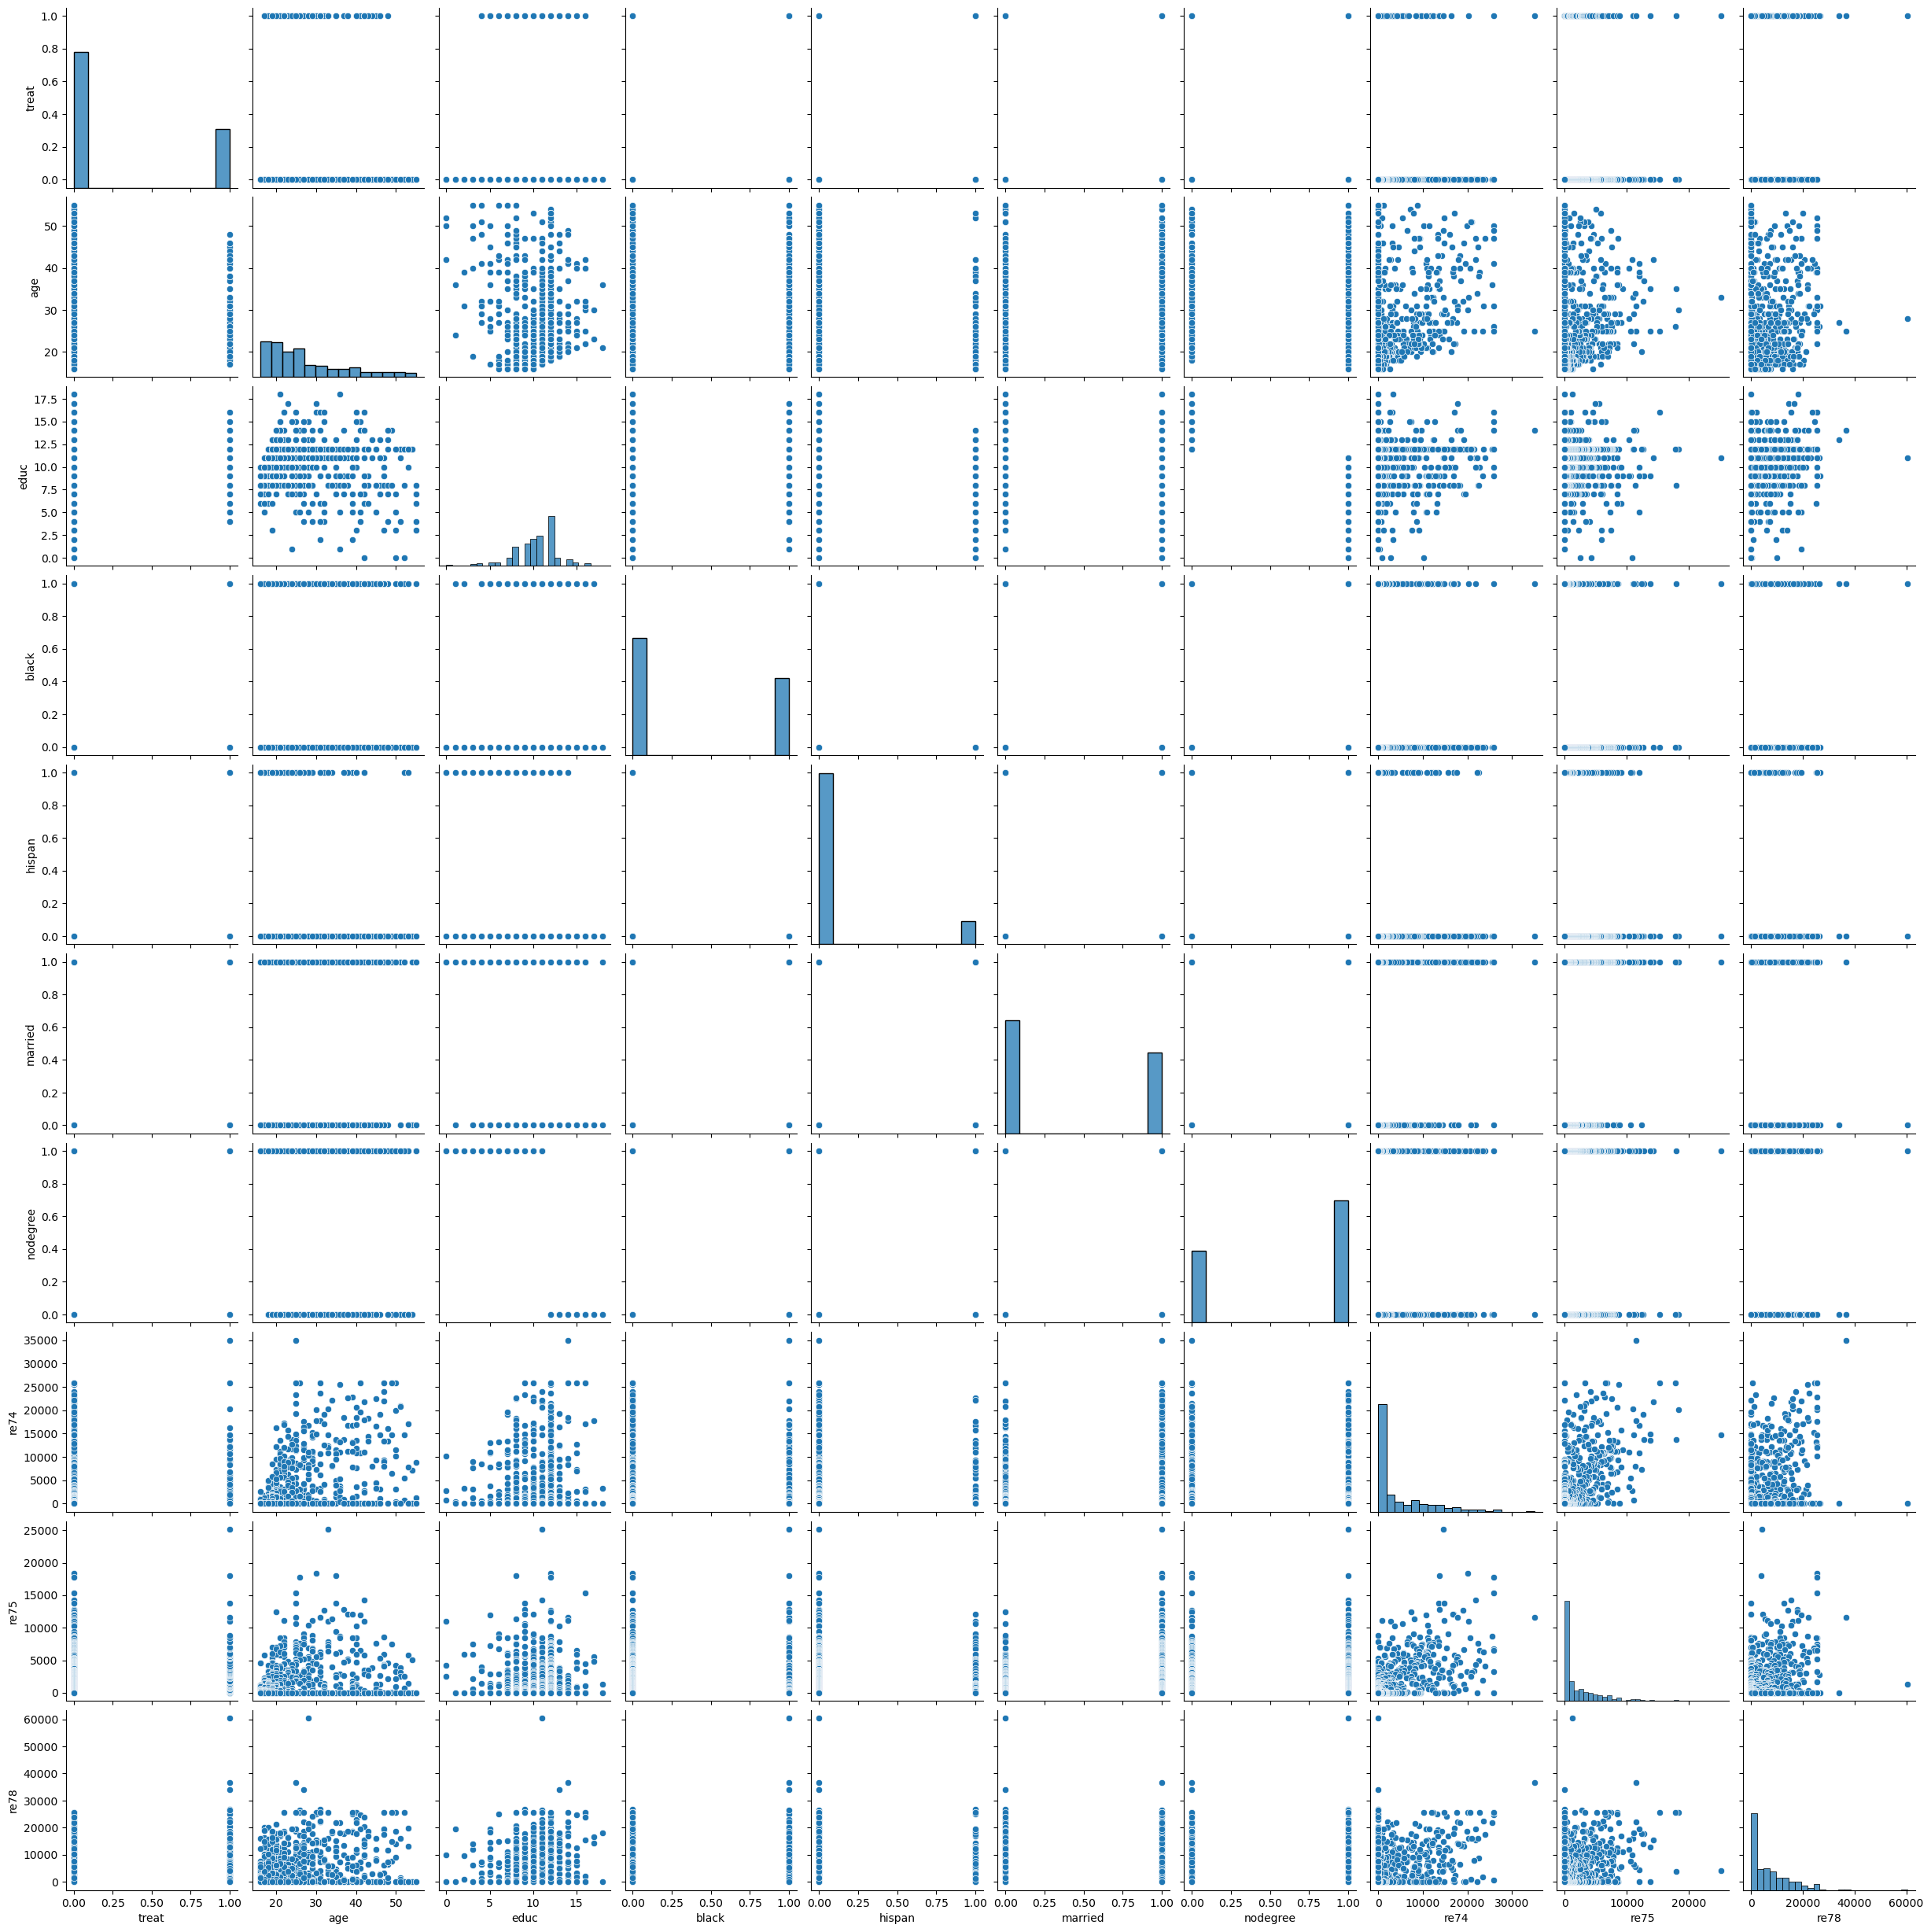

In [8]:
sns.pairplot(lalonde_data)

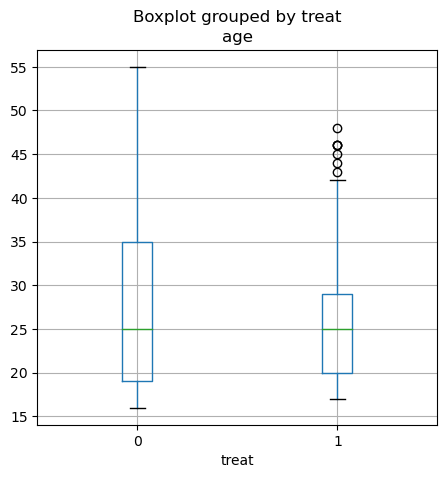

In [9]:
# Age -- quite different, the members of the treated tend
# to be younger than the ones in the control group

lalonde_data.boxplot(by='treat', column='age', figsize = [5, 5], grid=True)
plt.show()


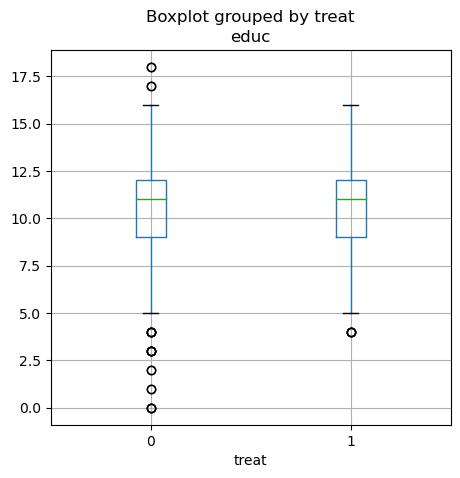

In [10]:
# education

lalonde_data.boxplot(by='treat', column='educ', figsize = [5, 5], grid=True)
plt.show()

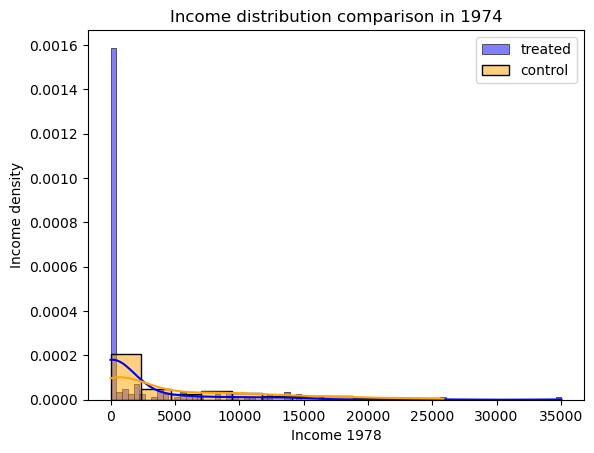

In [11]:
# income in the previous year

ax = sns.histplot(treated['re74'], stat='density', kde=True, color='blue', label='treated');
ax = sns.histplot(control['re74'], stat='density', kde=True, color='orange', label='control')
ax.set(title='Income distribution comparison in 1974',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

# As we can observe from this plot, the number of treated 
# members that were unemployed before the training program is
# quite high. So this might give us an intuition of how much the
# program helped people to find a job, independently of the income 
# that they got eventually. 

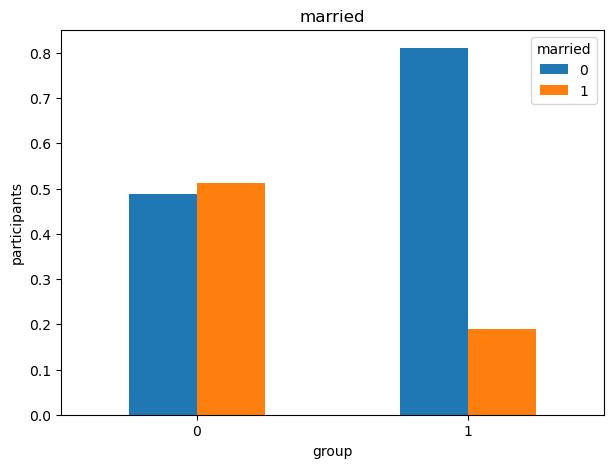

In [12]:
# marriage

group = lalonde_data.groupby(['treat', 'married'])['married'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('married')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

# The percentage of unmarried people between 
# the treated group is much higher than the married ones whereas
# in the control group, the two categories are balanced. This might
# be an indication of what type of people are included in 
# the program.

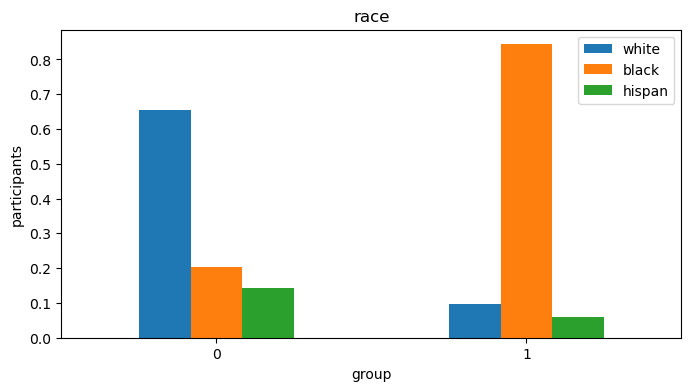

In [13]:
# race

lalonde_data['white'] = (~(lalonde_data['black'].astype(bool) \
                    | lalonde_data['hispan'].astype(bool))).astype(bool)

lalonde_data_group = lalonde_data.groupby(lalonde_data.treat)[['white', 'black', 'hispan']].sum()
lalonde_data_group = lalonde_data_group.div(lalonde_data_group.sum(axis=1), axis=0)
pl = lalonde_data_group.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

# white outnumber the other races in the control group, and on the 
# other hand, in the treated group the proportion of black is almost 
# the only one

## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

In [14]:
# let's standardize the continuous features
lalonde_data['age'] = (lalonde_data['age'] - lalonde_data['age'].mean())/lalonde_data['age'].std()
lalonde_data['educ'] = (lalonde_data['educ'] - lalonde_data['educ'].mean())/lalonde_data['educ'].std()
lalonde_data['re74'] = (lalonde_data['re74'] - lalonde_data['re74'].mean())/lalonde_data['re74'].std()
lalonde_data['re75'] = (lalonde_data['re75'] - lalonde_data['re75'].mean())/lalonde_data['re75'].std()

mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + \
        +re74 + re75', data=lalonde_data)

res = mod.fit()

# Extract the estimated propensity scores
lalonde_data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.3508
Time:                        10:20:42   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [15]:
# A possible approach:

For this task, we implement the simplest, full optimal matching, and analyse the results.

In order to perform matching between pairs, a distance/similarity function is needed. Since the library used for the matching (networkx) has a function that maximizes the sum of weights between pairs, it is natural to use a function that measures similarity.

Wanting to minimize the difference of propensity scores between pairs, we define the similarity function between two instances $x$ and $y$ like:

$$ similarity(x,y) = 1 - | propensity\_score(x) - propensity\_score(y) |$$
This function captures the difference in scores like a distance, but since the distance defined like that would always be between 0 and 1, subtracting it from 1 would be a meaningful measure to use for similarity.

In [16]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [17]:
# Separate the treatment and control groups
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [18]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

In [19]:
balanced_df_1 = lalonde_data.iloc[matched]

In [20]:
#race is not balanced. we will include this additional explicit requirement in task 5

## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


In [21]:
# A possible approach:

In [22]:
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]


G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

In [23]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

In [24]:
balanced_df_all = lalonde_data.iloc[matched]

## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

In [25]:
treated = balanced_df_all.loc[balanced_df_all['treat'] == 1] #People that attained the program
control = balanced_df_all.loc[balanced_df_all['treat'] == 0] #People that didn't attain the program

In [26]:
treated.re78.describe()

count      116.000000
mean      6375.738003
std       6670.986821
min          0.000000
25%        758.102600
50%       4648.736000
75%      10160.440000
max      36646.950000
Name: re78, dtype: float64

In [27]:
control.re78.describe()

count      116.000000
mean      5095.456025
std       6047.014862
min          0.000000
25%          0.000000
50%       2256.488500
75%       8942.092750
max      20243.380000
Name: re78, dtype: float64

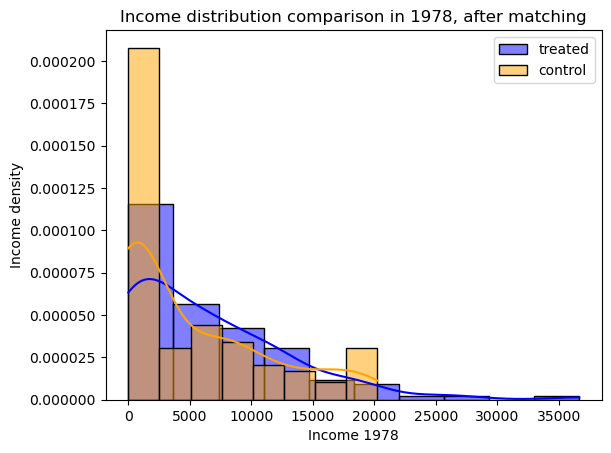

In [28]:
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated');
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

# Final conclusion: after the propensity score matching, the results drastically change and support the 
# positive effect of the training program.

# Applied Machine Learning with Scikit Learn

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this exercise we will learn how to use scikit-learn to train linear regression, K-NN and logistic regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
# import seaborn as sns
%matplotlib inline

# Linear Regression: Predicting sales from ads expense

<img src="img/ada_ads.jpg" width="300">

Let's import the dataset:

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

In [3]:
data.shape

(200, 4)

Visualize the relationship between the features and the response

<Axes: xlabel='newspaper', ylabel='sales'>

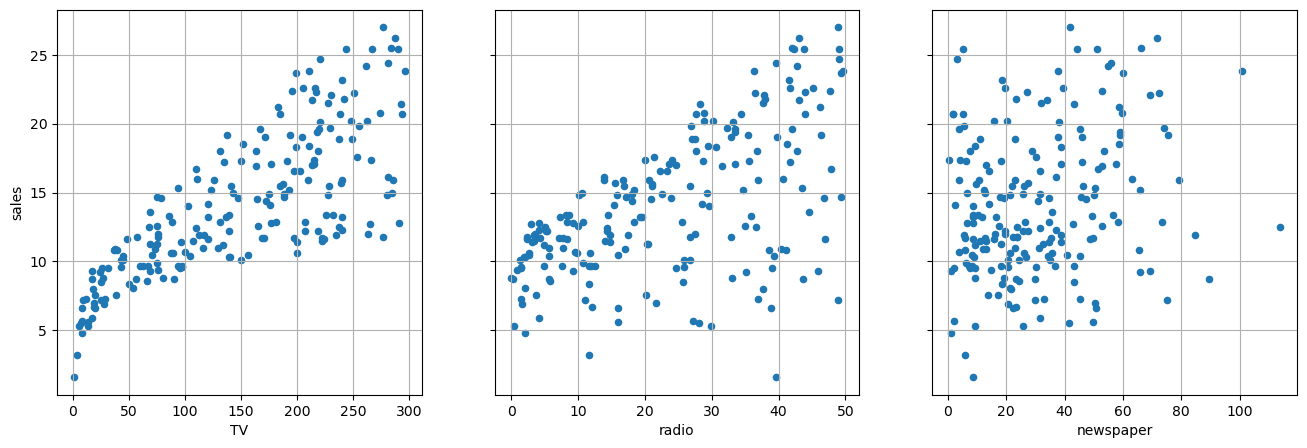

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [5]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

TV       radio   newspaper
count  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000
std     85.854236   14.846809   21.778621
min      0.700000    0.000000    0.300000
25%     74.375000    9.975000   12.750000
50%    149.750000   22.900000   25.750000
75%    218.825000   36.525000   45.100000
max    296.400000   49.600000  114.000000

**Scikit-learn** provides an easy way to train the model:

In [6]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression()

Back to the theory! Let's see what the formula looks like:

In [7]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.04576464545539761 * TV + 
0.18853001691820462 * radio + 
-0.0010374930424763159 * newspaper + 
2.9388893694594067




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

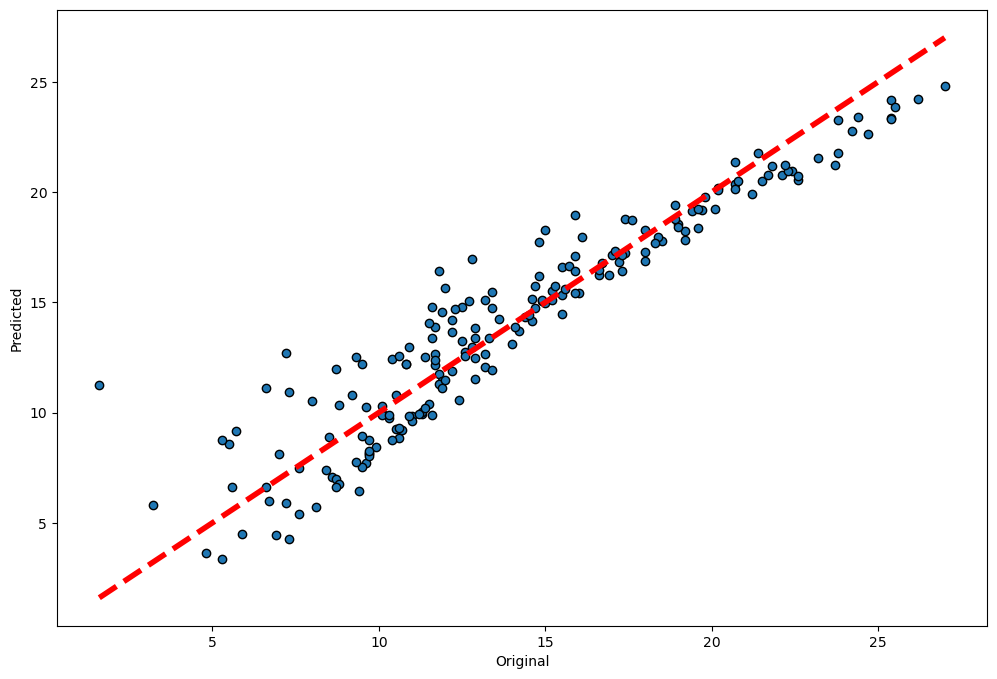

In [8]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

Cross validation? What is that?
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Print the MSE:

In [9]:
mean_squared_error(y, predicted)

3.0729465971002106

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

In [10]:
X = X[:5]
y = y[:5]

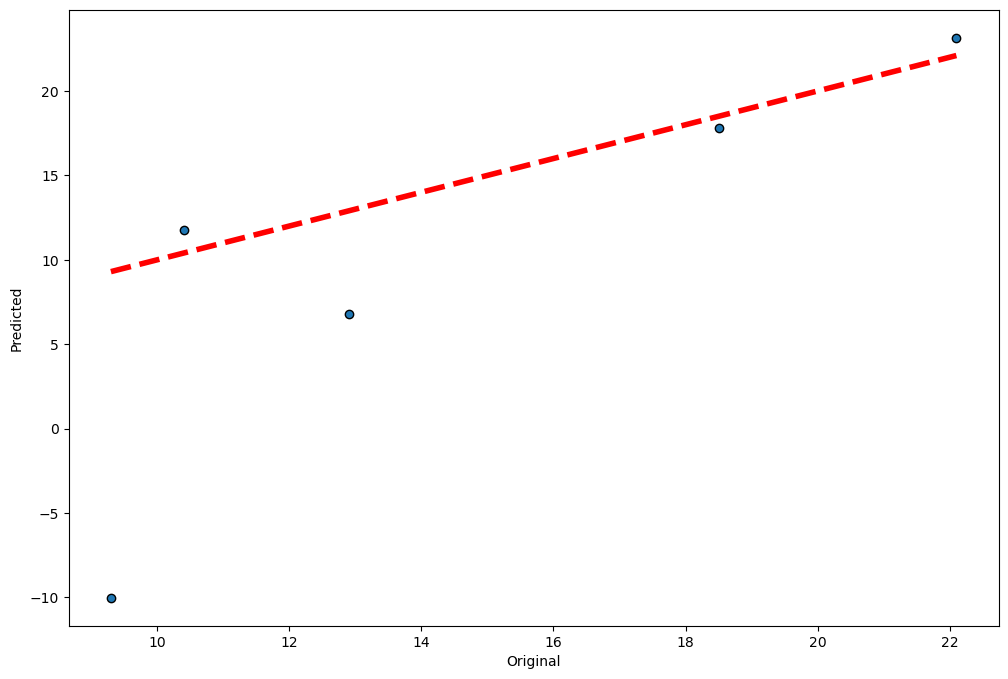

In [11]:
lr = LinearRegression()

predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [12]:
mean_squared_error(y, predicted)

82.77419262404129

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

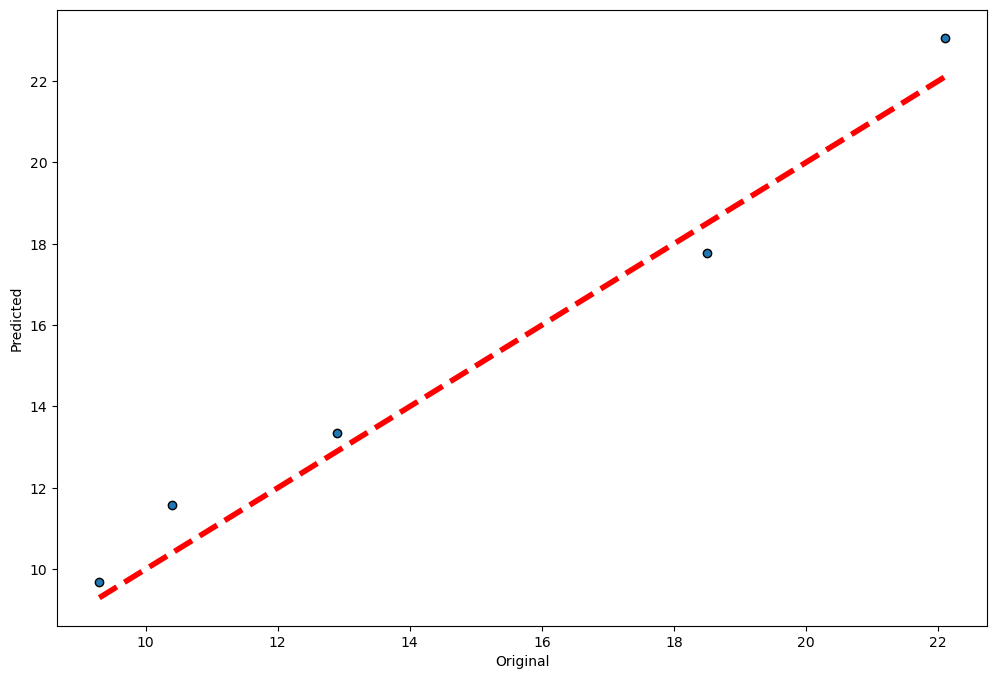

In [13]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
mean_squared_error(y, predicted_r)

0.6442462580572467

-------
# Predicting Titanic survival with Logistic Regression

Let's use the data obtained by the _Encyclopedia Titanica_ to predict if a passenger survived the Titanic disaster.

<img src="img/titanic.jpg" width="600">

Let's import the dataset:

In [15]:
titanic = pd.read_excel('data/titanic.xls')
titanic.head(5)

survived                                             name     sex      age  \
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000   
1         1                   Allison, Master. Hudson Trevor    male   0.9167   
2         0                     Allison, Miss. Helen Loraine  female   2.0000   
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

   sibsp  parch  ticket      fare    cabin embarked  
0      0      0   24160  211.3375       B5        S  
1      1      2  113781  151.5500  C22 C26        S  
2      1      2  113781  151.5500  C22 C26        S  
3      1      2  113781  151.5500  C22 C26        S  
4      1      2  113781  151.5500  C22 C26        S

What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [16]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(titanic)))

Survived 500, Dead 809
Survived 38.20%


Specify the columns to use as features:

In [17]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

For the sake of this execise, we can assume the other features (name, cabin number, embarked) are not predictive.

### Let's prepare the feature vector for the training

The dataset contains one categorical variable: sex (male|female)

We need to convert it to a numerical variable. Pandas offers the method *get_dummies* that takes care of this:

In [18]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()

age  sibsp  parch      fare  sex_female  sex_male
0  29.0000      0      0  211.3375        True     False
1   0.9167      1      2  151.5500       False      True
2   2.0000      1      2  151.5500        True     False
3  30.0000      1      2  151.5500       False      True
4  25.0000      1      2  151.5500        True     False

The categorical feature _sex_ is converted in 2 boolean features.

Titanic sank in 1912: it was a lot of time ago! Some data may be missing. Let's check if there are undefined values.

In [19]:
len(X[X.isna().any(axis=1)])

264

Let's try to fix the data with a basic imputation method: replacing the missing values with the mean.

More info: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [20]:
X = X.fillna(X.mean())

len(X[X.isna().any(axis=1)])

0

The label used for the traning:

In [21]:
y = titanic['survived']

Let's train the model ...

In [22]:
logistic = LogisticRegression(solver='lbfgs')

... and evaluate the precison/recall with a cross validation (10 splits).

In [23]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


Logistic regression uses a threshold on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this threshold.

Let's give a look at the ROC curve!
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [24]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

... and plot the result:

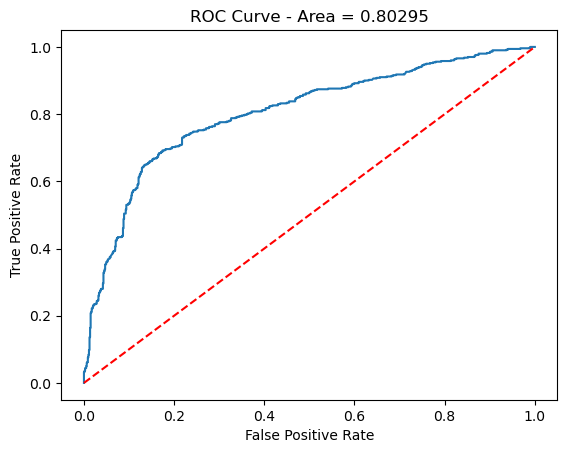

In [25]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

### Explore the model output

Let's train on the full dataset:

In [26]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)

LogisticRegression()

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you have survived?

Remember the features:

In [27]:
X.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male'], dtype='object')

Would a man, 25 years old without relative onboard, and with a fare of 100 survive?

In [28]:
test = [25, 0, 0, 100, 0, 1]
"YES" if logistic.predict([test])[0] > 0 else "NO"

'NO'

What is the probability distribution behind this prediction?

In [29]:
logistic.predict_proba([test])

array([[0.5528599, 0.4471401]])

What about a woman, 35 years old, alone onboard and with the same fare?

In [ ]:
test = [35, 0, 0, 100, 1, 0]
"YES" if logistic.predict([test])[0] > 0 else "NO"



[0.11464109 0.88535891]


In [ ]:
print(logistic.predict_proba([test])[0])

---------

# Overview on K-NN

Let's create some complex shapes to observe how K-NN behaves.

Text(0.5, 1.0, 'Circles')

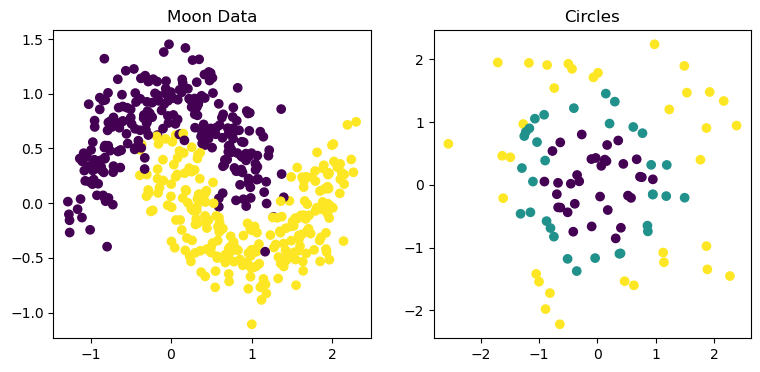

In [31]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

Plotting function to predict the class of different areas of the features space.

In [32]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

Create the models for both dataset with K=1 and K=15.

In [33]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

KNeighborsClassifier(n_neighbors=15)

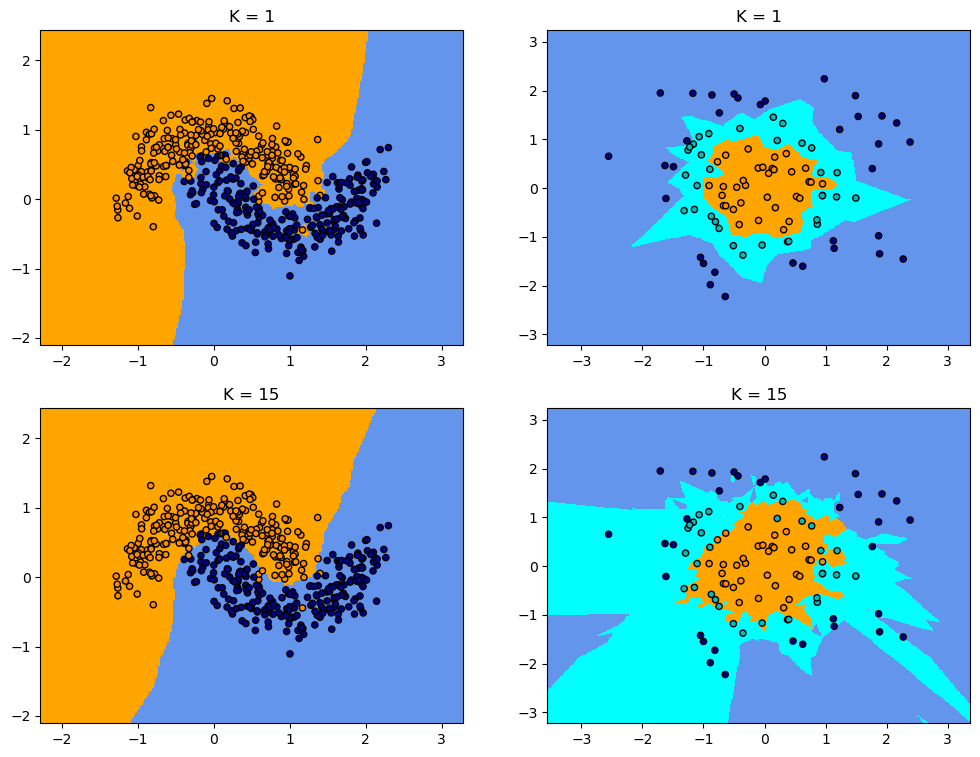

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)

-------
# Exercises



### Question 1: Which of the following classification models fulfills all three characteristics: i) it is the quickest to train, ii) it is able to handle complex decision boundaries, and iii) it doesn’t require additional retraining to make predictions that take into account freshly obtained data points?

 - a) logistic regression
 - **b) k nearest neighbors**
 - c) random forest
 - d) deep neural network
 
Answer: b)

### Question 2: A logistic regression model...

 - a) is trained by minimizing the least-squares error
 - **b) makes predictions in the range [0,1]**
 - c) makes predictions in the range [0,+inf] 
 - d) Can perfectly separate white from gray dots as a linear function of x = [x1, x2]  when x1, x2 ∈ {0, 1} and y = x1 XOR x2, as in the following picture: 

<img src="img/q4.png" width="250">

Answer: b)

### Question 4: Train a Random Forest model to predict the if a passenger of Titanic survived.

- Use random forest classifier with max tree depth of 3 (and random_state=0)
- Train the classifier by variating the number of trees from 1 to 20 (N)
- For each step estimate precision/recall with cross validation (10-folds)
- Plot 2 curves for different values of N

In [35]:
# Load the data
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [36]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [n for n in range(1, 21)]
precision_scores = []
recalls_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
    recalls_scores.append(recall.mean())

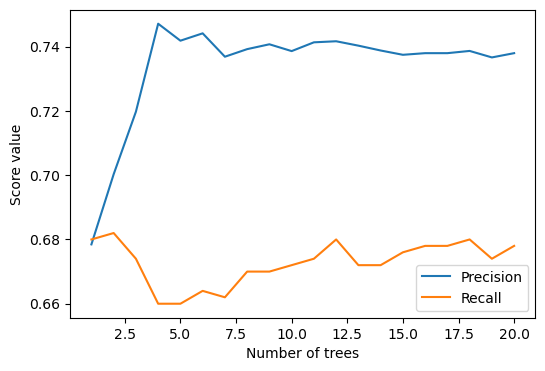

In [37]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [3]:
print('The length of the data with all rows is : {}'.format(len(original_data)))
original_data.dropna(inplace=True)
print('The length of the data without the rows with nan value is: {}'.format(len(original_data)))

The length of the data with all rows is : 79672
The length of the data without the rows with nan value is: 79661


In [4]:
data_features = original_data.copy()
data_features['adopted'] = data_features.outcome_type.apply(lambda r: 1 if r=='Adoption' else 0)
data_features.drop("outcome_type", axis = 1, inplace=True)
data_features.head()

sex_upon_outcome  age_upon_outcome_(years) animal_type intake_condition  \
0    Neutered Male                      10.0         Dog           Normal   
1    Neutered Male                       7.0         Dog           Normal   
2    Neutered Male                       6.0         Dog           Normal   
3    Neutered Male                      10.0         Dog           Normal   
4    Neutered Male                      16.0         Dog          Injured   

       intake_type sex_upon_intake  age_upon_intake_(years)  intake_year  \
0            Stray   Neutered Male                     10.0         2017   
1    Public Assist   Neutered Male                      7.0         2014   
2    Public Assist   Neutered Male                      6.0         2014   
3  Owner Surrender   Neutered Male                     10.0         2014   
4    Public Assist   Neutered Male                     16.0         2013   

   intake_number  time_in_shelter_days  adopted  
0            1.0              0.588194        0  
1            2.0              1.259722        0  
2            3.0              1.113889        0  
3            1.0              4.970139        0  
4            1.0              0.119444        0

In [5]:
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

In [6]:
[train, test] = split_set(data_features)

In [7]:
categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition',
                       'intake_type', 'sex_upon_intake']
train_categorical = pd.get_dummies(train, columns=categorical_columns)
train_categorical.columns

Index(['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year',
       'intake_number', 'time_in_shelter_days', 'adopted',
       'sex_upon_outcome_Intact Female', 'sex_upon_outcome_Intact Male',
       'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
       'sex_upon_outcome_Unknown', 'animal_type_Bird', 'animal_type_Cat',
       'animal_type_Dog', 'animal_type_Other', 'intake_condition_Aged',
       'intake_condition_Feral', 'intake_condition_Injured',
       'intake_condition_Normal', 'intake_condition_Nursing',
       'intake_condition_Other', 'intake_condition_Pregnant',
       'intake_condition_Sick', 'intake_type_Euthanasia Request',
       'intake_type_Owner Surrender', 'intake_type_Public Assist',
       'intake_type_Stray', 'intake_type_Wildlife',
       'sex_upon_intake_Intact Female', 'sex_upon_intake_Intact Male',
       'sex_upon_intake_Neutered Male', 'sex_upon_intake_Spayed Female',
       'sex_upon_intake_Unknown'],
      dtype='object')

The features in the testing set must be matched with the traning set.

In [8]:
# Make sure we use only the features available in the training set
test_categorical = pd.get_dummies(test, columns=categorical_columns)[train_categorical.columns]

In [9]:
train_label=train_categorical.adopted
train_features = train_categorical.drop('adopted', axis=1)
print('Length of the train dataset : {}'.format(len(train)))

test_label=test_categorical.adopted
test_features = test_categorical.drop('adopted', axis=1)
print('Length of the test dataset : {}'.format(len(test)))

Length of the train dataset : 63763
Length of the test dataset : 15898


In [10]:
means = train_features.mean()
stddevs = train_features.std()

train_features_std = pd.DataFrame()
for c in train_features.columns:
    train_features_std[c] = (train_features[c]-means[c])/stddevs[c]

# Use the mean and stddev of the training set
test_features_std = pd.DataFrame()
for c in test_features.columns:
    test_features_std[c] = (test_features[c]-means[c])/stddevs[c]

train_features_std.head()

age_upon_outcome_(years)  age_upon_intake_(years)  intake_year  \
0                  2.714587                 2.733505     1.199649   
1                  1.679020                 1.695333    -1.102260   
2                  1.333830                 1.349276    -1.102260   
3                  4.440533                 4.463791    -1.102260   
4                  4.440533                 4.463791    -1.102260   

   intake_number  time_in_shelter_days  sex_upon_outcome_Intact Female  \
0      -0.277321             -0.392114                       -0.363419   
1       1.903861             -0.375796                       -0.363419   
2       4.085044             -0.379340                       -0.363419   
3      -0.277321             -0.402069                        2.751605   
4      -0.277321             -0.401226                       -0.363419   

   sex_upon_outcome_Intact Male  sex_upon_outcome_Neutered Male  \
0                     -0.373167                        1.352258   
1                     -0.373167                        1.352258   
2                     -0.373167                        1.352258   
3                     -0.373167                       -0.739492   
4                     -0.373167                        1.352258   

   sex_upon_outcome_Spayed Female  sex_upon_outcome_Unknown  ...  \
0                       -0.689151                 -0.305896  ...   
1                       -0.689151                 -0.305896  ...   
2                       -0.689151                 -0.305896  ...   
3                       -0.689151                 -0.305896  ...   
4                       -0.689151                 -0.305896  ...   

   intake_type_Euthanasia Request  intake_type_Owner Surrender  \
0                       -0.056653                     -0.48054   
1                       -0.056653                     -0.48054   
2                       -0.056653                     -0.48054   
3                       -0.056653                     -0.48054   
4                       -0.056653                     -0.48054   

   intake_type_Public Assist  intake_type_Stray  intake_type_Wildlife  \
0                  -0.257118           0.648789             -0.213066   
1                   3.889211          -1.541308             -0.213066   
2                   3.889211          -1.541308             -0.213066   
3                  -0.257118           0.648789             -0.213066   
4                  -0.257118           0.648789             -0.213066   

   sex_upon_intake_Intact Female  sex_upon_intake_Intact Male  \
0                      -0.651694                    -0.681539   
1                      -0.651694                    -0.681539   
2                      -0.651694                    -0.681539   
3                       1.534437                    -0.681539   
4                      -0.651694                    -0.681539   

   sex_upon_intake_Neutered Male  sex_upon_intake_Spayed Female  \
0                       2.303387                       -0.40442   
1                       2.303387                       -0.40442   
2                       2.303387                       -0.40442   
3                      -0.434136                       -0.40442   
4                       2.303387                       -0.40442   

   sex_upon_intake_Unknown  
0                -0.305896  
1                -0.305896  
2                -0.305896  
3                -0.305896  
4                -0.305896  

[5 rows x 32 columns]

## B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [11]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 * (precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 * (precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

In [12]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(train_features_std,train_label)

LogisticRegression(max_iter=10000)

In [13]:
prediction_proba = logistic.predict_proba(test_features_std)

Text(0.5, 1.0, 'Confusion matrix for a 0.5 threshold')

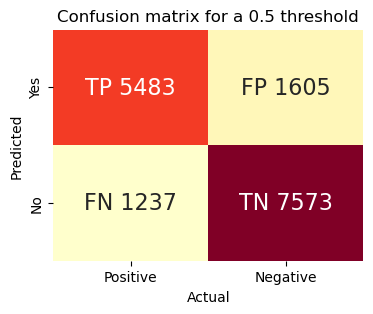

In [14]:
confusion_matrix_05 = compute_confusion_matrix(test_label, prediction_proba, 0.5 )
plt.figure(figsize = (4,3)) 
ax = plot_confusion_matrix(confusion_matrix_05)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix for a 0.5 threshold')

In [15]:
[t, accuracy, precision_positive, recall_positive, F1_score_positive, \
    precision_negative, recall_negative, F1_score_negative] = compute_all_score(confusion_matrix_05)

print("The accuracy of this model is {0:1.3f}".format(accuracy))
print("For the positive case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_positive, recall_positive, F1_score_positive))
print("For the negative case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_negative, recall_negative, F1_score_negative))

The accuracy of this model is 0.821
For the positive case, the precision is 0.774, the recall is 0.816 and the F1 score is 0.794
For the negative case, the precision is 0.860, the recall is 0.825 and the F1 score is 0.842


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [16]:
threshold = np.linspace(0, 1, 100)

In [17]:
columns_score_name = ['Threshold', 'Accuracy', 'Precision P', 'Recall P', 'F1 score P', \
                                              'Precision N', 'Recall N', 'F1 score N']
threshold_score = pd.concat([pd.DataFrame([compute_all_score(compute_confusion_matrix(test_label, prediction_proba, t ),t)]\
                                             , columns=columns_score_name) for t in threshold], ignore_index=True)
threshold_score.set_index('Threshold', inplace=True)

Text(0.5, 1.0, 'Accuracy')

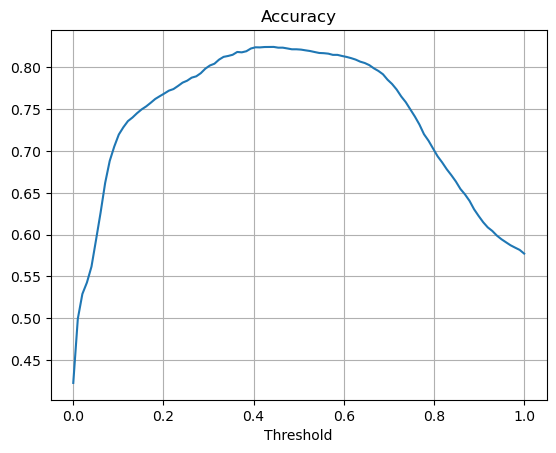

In [18]:
threshold_score['Accuracy'].plot(grid=True).set_title('Accuracy')

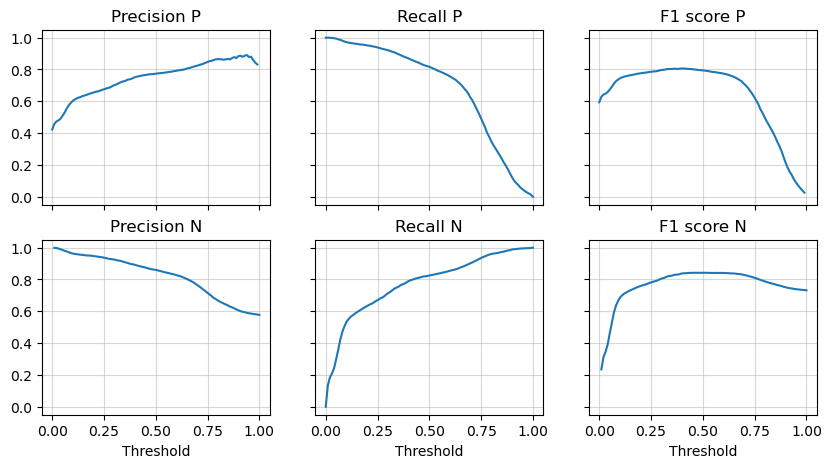

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))

col_plot = ['Precision P', 'Recall P', 'F1 score P', 'Precision N', 'Recall N', 'F1 score N']

major_ticks = np.linspace(0,1,5)

for axe, col in zip(axs.flat, col_plot):
    threshold_score[col].plot(ax=axe, grid = True)
    axe.set_title(col)
    axe.set_xticks(major_ticks)    
    axe.grid(which='major', alpha=0.5)

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [20]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(train_features_std, train_label)

LogisticRegression(max_iter=10000)

In [21]:
tmp = []
for name, value in zip(train_features_std.columns, logistic.coef_[0]):
    tmp.append({"name": name, "value": value})
    
features_coef = pd.DataFrame(tmp).sort_values("value")
features_coef.head()

name     value
1          age_upon_intake_(years) -1.778935
6     sex_upon_outcome_Intact Male -0.778612
5   sex_upon_outcome_Intact Female -0.684463
26            intake_type_Wildlife -0.608506
31         sex_upon_intake_Unknown -0.483979

<BarContainer object of 32 artists>

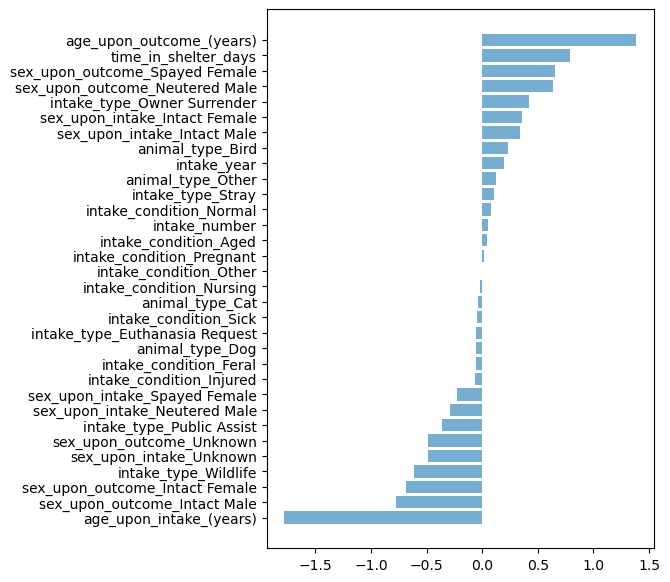

In [22]:
plt.subplots(figsize=(5,7))
plt.barh(features_coef.name, features_coef.value, alpha=0.6)

# Quiz

## Questions 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- **a) F1 Score**
- b) Recall
- c) Precision
- d) Accuracy

a)

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- **d) True positive rate is 0.95**

d)


# ADA - Unsupervised learning

In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Part A) Tutorial

In this tutorial, you will learn how to discover clusters in data using Python.

Let's start by creating some **[synthetic](https://en.wikipedia.org/wiki/Synthetic_data)** data!
First, we create a super secret number that represents the number of the cluster to generate. 

Don't print it! We'll try to discover it automatically.

## K-Means

In [2]:
random.seed(42)
top_secret_number = random.randint(2, 10)

Now we can generate some data distributed in n groups:

In [3]:
total_samples = 100

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)

X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

Let's see how these clusters look like and where is their center:

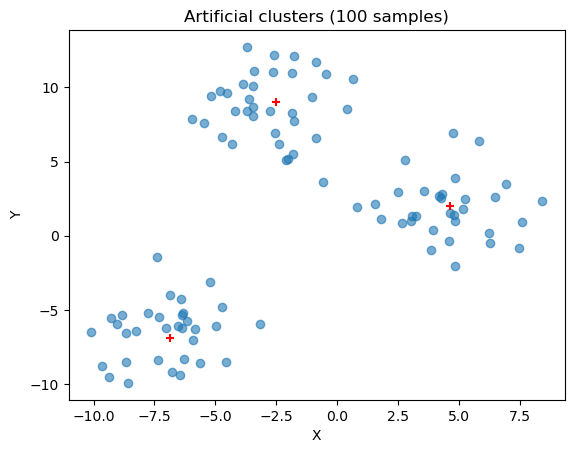

In [4]:
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

### Clustering the data
How many clusters do you see? Probably easy for a human, but not so trivial for a computer. 

Let's try to group the data with K-Means. Recall that K-Means requires you to specify the number of clusters (K). Let's start by testing multiple values between 2 and 10:

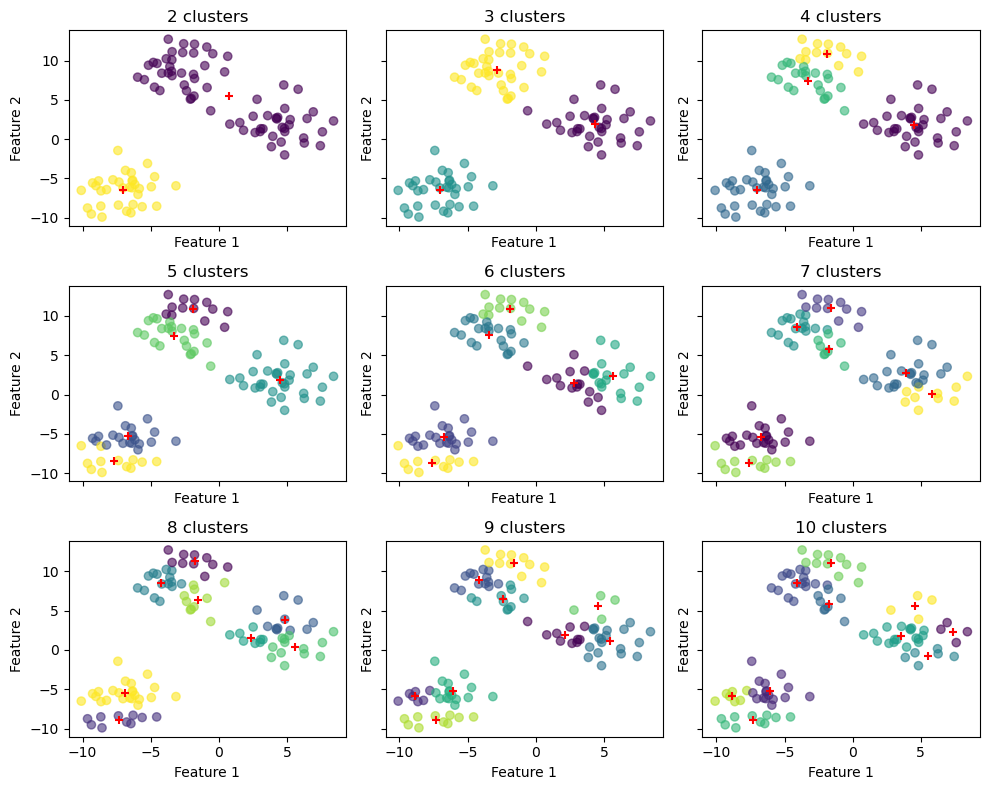

In [5]:
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

### Bonus example: 
Did you know you can animate your plots?

MovieWriter ffmpeg unavailable; using Pillow instead.


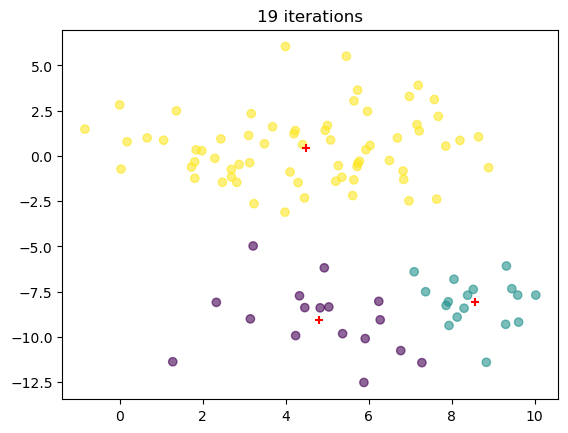

In [6]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()


X_3clusters, _, centers = make_blobs(n_samples=100, 
                           centers=3, 
                           cluster_std=2,
                           return_centers=True, 
                           random_state=99)

# Update frame callback 
def update(max_iter):
    # Clean the plot
    plt.clf()
    plt.cla()
    # Cluster and get the labels
    kmeans = KMeans(n_clusters=3, 
                    init="random", 
                    algorithm="lloyd",
                    random_state=10, 
                    n_init=1, max_iter=max_iter).fit(X_3clusters)
    # Plot
    plt.scatter(X_3clusters[:,0], X_3clusters[:,1], c=kmeans.labels_, alpha=0.6)
    for c in kmeans.cluster_centers_:
        plt.scatter(c[0], c[1], marker="+", color="red")
    plt.title("%s iterations" % max_iter)

# Animate 1 frame per second
anim = FuncAnimation(fig, update, frames=np.arange(1, 20), interval=500)

# Save the gif
anim.save('clusters.gif', dpi=80)

### How to select K in K-Means?

You have a couple of options:
- Silhouette score: Find the K with the desired tradeoff between the number of clusters and cohesion/separation.
- Elbow method: Find the "elbow" in the curve of the Sum of Squared Errors

Let's see what we can observe using these 2 methods.

#### Silhouette score

To generate the curve of the silhouette score, we cluster the data with different value of K and plot the resulting values.

Text(0, 0.5, 'Silhouette score')

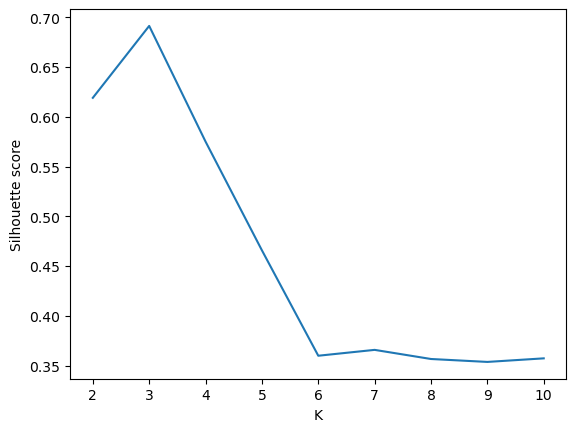

In [7]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

#### Elbow method

Similarly to the previous case, we compute the SSE for different values of K, and we plot the distribution:

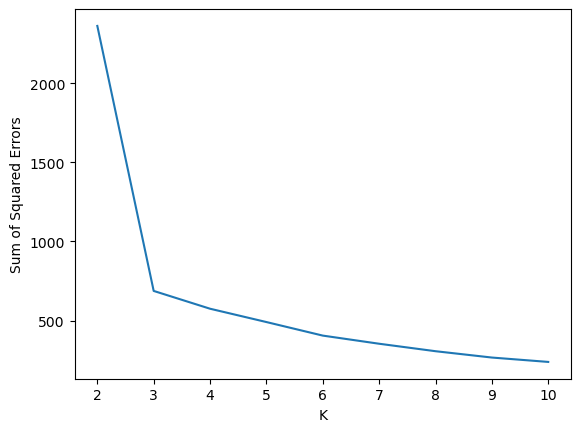

In [8]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    
plot_sse(X)

In this case, we get the same recommendation from both methods: K=3. Silhouette suggests that using 3 clusters is a fair tradeoff between the number of groups and their separation. The elbow method shows how the SSE reduction is less significant with more than 3 clusters.

Let's plot the best clusters:


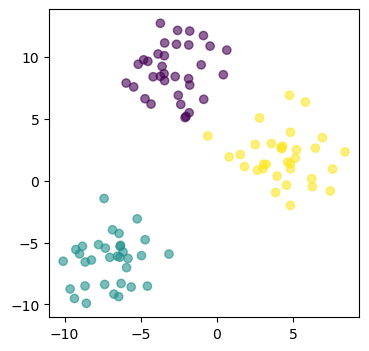

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# Plot the clusters with K = 3
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X)
axs.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)

Ultimately it is up to you (domain expert!) to pick the number of clusters that better represent the data.

The best representation, in this case, is obtained with k = 3.

-----

### Visualizing high dimensional data

Visualizing 2-dimensional data is easy, but what happens when we have more than three features? 

We can use dimensionality reduction techniques! Let start by generating some artifical clusters with 10 features. 
We use the same number of samples and groups as the previous example:

In [10]:
total_samples = 100

# This create some artifical clusters with standard dev. = 3
X10d, _ = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=3,
                           n_features=10,
                           random_state=0)

print("The features of the first sample are: %s" % X10d[0])

The features of the first sample are: [ 7.05933272  4.20962197 -2.77357361  6.59147131 -6.64440614  9.47625342
 -3.01996723  7.36384861  1.41157528  1.28459274]


To transform this features vector in a form that can be represented in a simple plot, we can reduce the number of dimensions by preserving as much information as possible. Let's see two techniques that can help in this task:

- t-SNE
- PCA


Note: the next lecture will cover more theoretical aspects of these methods.

#### t-SNE

In [11]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(X10d)

print("The features of the first sample are: %s" % X_reduced_tsne[0])

The features of the first sample are: [ 3.2180345 -1.7569892]


In [12]:
X_reduced_pca = PCA(n_components=2).fit(X10d).transform(X10d)

print("The features of the first sample are: %s" % X_reduced_pca[0])

The features of the first sample are: [-6.17922102  7.01618025]


The features are reduced in both cases to a 2d space. Please note that they are not the same because the two techniques optimize different objectives.

Text(0.5, 1.0, 'PCA')

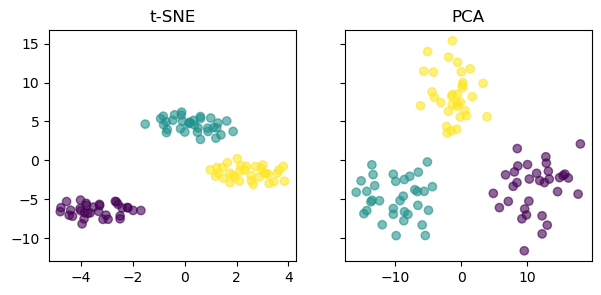

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X10d)

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

### Density based: DBSCAN

K-Means is an intuitive and effective algorithm, but what happens when the data has a complex shape?

As for the previous example, let's generate some synthetic data that resemble two half-moons.

Text(0, 0.5, 'Feature 2')

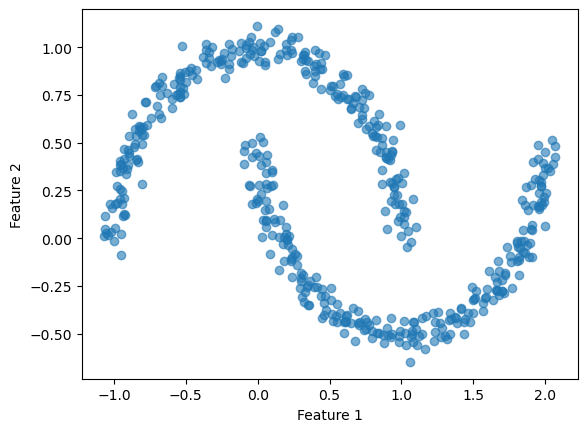

In [14]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0)

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

We can visually see that there are two groups. Let's assign the labels with K-Means!

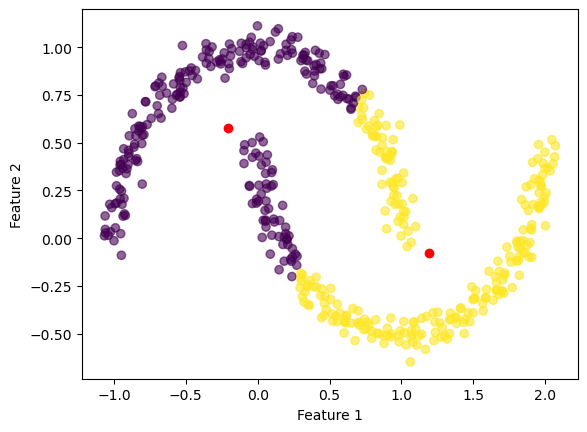

In [15]:
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the centroids
for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")

Let's cluster the data with DBSCAN by variating the `eps` value in the range between 0.05 and 0.15.

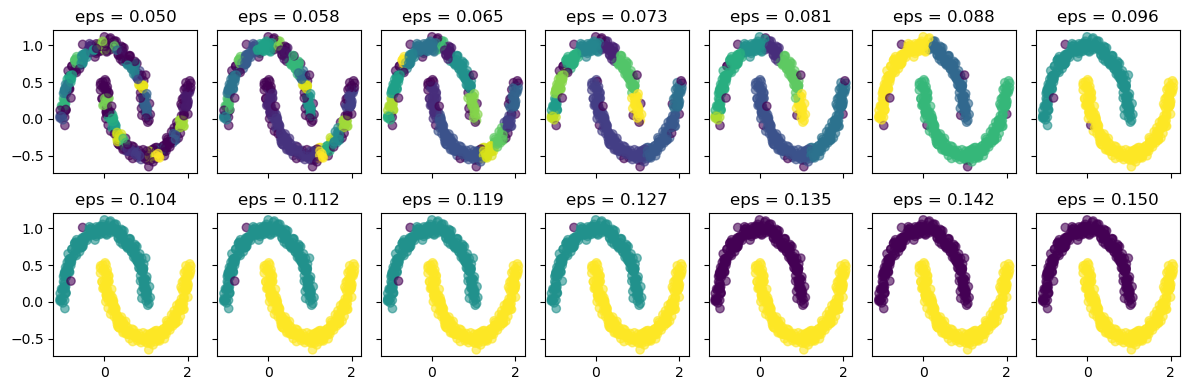

In [16]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

-------
# Part B: Exercises

## Exercise 1. Real world data! Wheat has a kernel too!


<img src="img/wheat_banner.png" width="800">

Data Set Information:

> The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

Source: https://archive.ics.uci.edu/ml/datasets/seeds



In [17]:
seeds = pd.read_csv("seeds_dataset.csv")
seeds.head()

ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1

In this exercise, we are interested in discovering structure in the data by hiding the actual label provided in the dataset.

### Question 1.1: Prepare the dataset

- Create a dataset by keeping only the meaningful features. Remove the type.
- Plot the histogram of the different features.
- The features have different scales, but we want to give the same importance to all them. Find a way to mitigate the problem.

In [18]:
seeds_features = seeds.drop("ID", axis=1).drop("seedType", axis=1)
seeds_features.head()

area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  
0                 2.221                 5.220  
1                 1.018                 4.956  
2                 2.699                 4.825  
3                 2.259                 4.805  
4                 1.355                 5.175

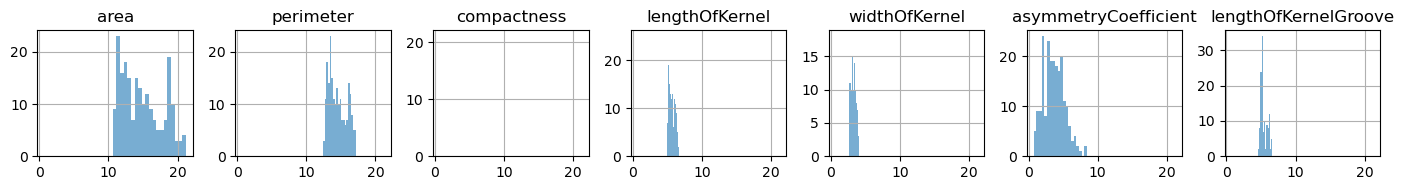

In [19]:
columns = seeds_features.columns

fig, axs = plt.subplots(1, len(columns), figsize=(14,2), sharex=True)

for column_idx in range(0, len(columns)):
    seeds_features[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
    
plt.tight_layout()

In [20]:
scaled_features = StandardScaler().fit(seeds_features).transform(seeds_features)
print("Scaled sample: %s" %scaled_features[0])

Scaled sample: [ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
  1.41701823e-01 -9.86151745e-01 -3.83577423e-01]


### Question 1.2: Cluster the data with K-Means

- Use the Elbow method to find the best value of K

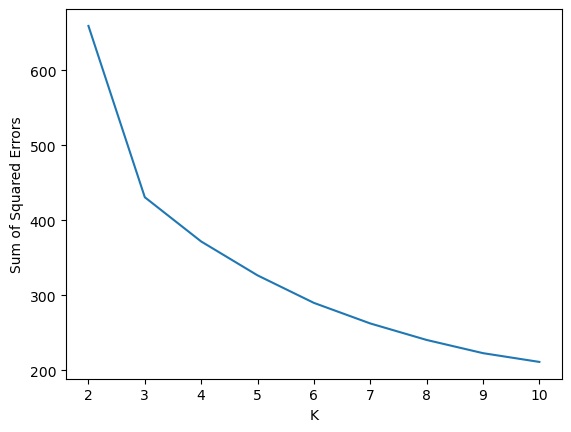

In [21]:
plot_sse(scaled_features)

### Question 1.3: Visualise your clusters

- Use t-SNE to plot your clusters
- Compare side by side 2 plots using the original labels (seedType) and the ones generated by K-Means.

In [22]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_features)

Text(0.5, 1.0, 'Discovered clusters')

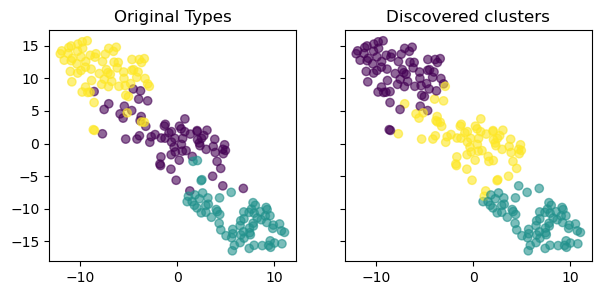

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=seeds.seedType, alpha=0.6)
axs[0].set_title("Original Types")


labels = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_features)

axs[1].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[1].set_title("Discovered clusters")


# Exercise 2. Real world data! More examples with Wine

> These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Source: https://archive.ics.uci.edu/ml/datasets/wine

### Question 2.1: Assign the wine to its group

In this dataset the label is missing. Repeat the previous analysis to assign the wine to its original group.

- Select the reasonable number of clusters
- Plot the data

In [24]:
wine = pd.read_csv("wine-clustering.csv")
wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

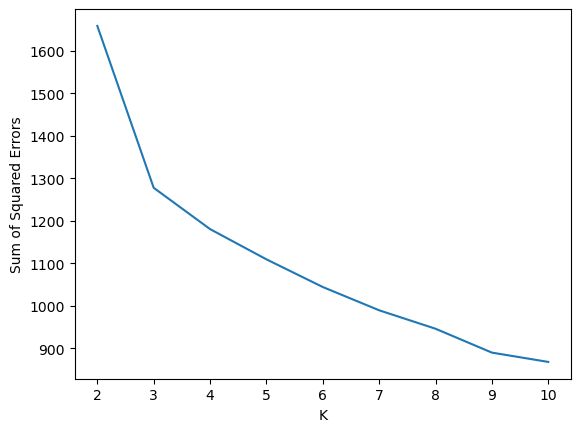

In [25]:
wine_scaled = StandardScaler().fit(wine).transform(wine)
plot_sse(wine_scaled)

Text(0.5, 1.0, 'Discovered clusters')

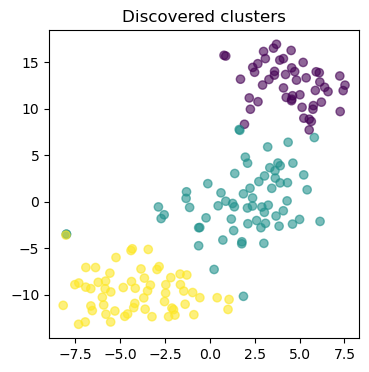

In [26]:
wine_scaled_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(wine_scaled)
labels = KMeans(n_clusters=3, random_state=0).fit_predict(wine_scaled)

fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)
axs.scatter(wine_scaled_reduced_tsne[:,0], wine_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
axs.set_title("Discovered clusters")

Extra example: 

You can reduce the dimensionality of your data before the clustering. This can help with high-dimensional data that suffer from curse of dimensionality. Note: _With this dataset the effect is minimal_

Let's see the resulting clustering by using different dimensions:

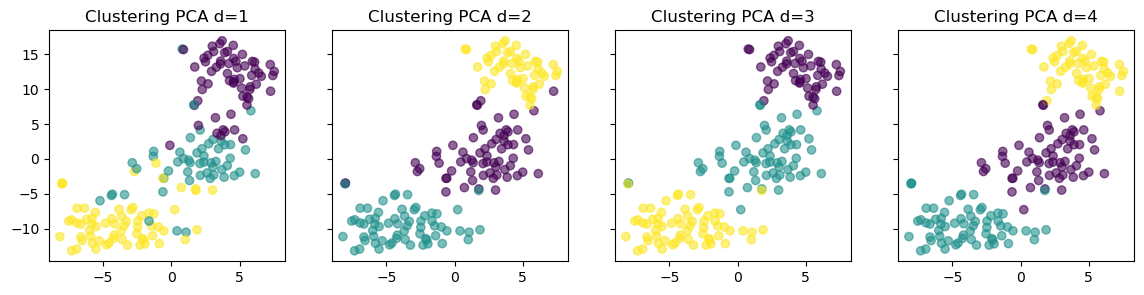

In [27]:
fig, axs = plt.subplots(1, 4, figsize=(14, 3), sharey=True)

for i in range(0, 4):
    X_reduced_pca = PCA(n_components=i+1).fit(wine_scaled).transform(wine_scaled)
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(X_reduced_pca)
    axs[i].scatter(wine_scaled_reduced_tsne[:,0], wine_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
    axs[i].set_title("Clustering PCA d=%s"% (i+1))

---------
# Part C: Quiz

### Question 1: Which of the following real-world ML applications is not unsupervised learning?
1. Netflix matrix factorization pipeline to discover users with similar interests
2. **Speaker recognition (recognition of the identity of who is talking) in phones and smart assistant devices**
3. LDA topic modeling on Twitter content to discover customers' opinions about a product
4. K-means clustering of Web domains 

2)

### Question 2: Which of the following is true for the k-means clustering algorithm?

1. It always converges to a global optimum.
2. **In each iteration, points are assigned to the closest centroid and the new centroids are recomputed.**
3. It outputs the optimal number of clusters.
4. None of the above.

2)

# Handling text exercise 1

## Welcome! This exercise consists of:

## Part 1: Hands on tutorial
1. Implementing the natural language processing pipeline
2. Solving four typical language processing tasks:
   * Sentiment analysis
   * Document classification
   * Topic detection
   * Semantic analysis


### We will be working with four books in plain text:
1. Moby-Dick, by Herman Melville
2. Frankenstein; or, The Modern Prometheus, by Mary Shelley
3. Pride and Prejudice, by Jane Austen
4. Dracula, Bram Stoker

#### To run this notebook, you need to install the following libraries:

conda install nltk gensim spacy <br>
pip install pyLDAvis  <br>
pip install vaderSentiment  <br>
pip install empath <br>
python -m spacy download en  <br>
python -m nltk.downloader punkt <br>
python -m nltk.downloader all-corpora <br>

## Part 2: Handling text comprehension questions
- You can test your understanding of important NLP concepts. Solutions will be released next week.

## Part 1

In [78]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#The data
corpus_root = 'books/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### In this tutorial we will be working with text in English. The same principles apply, but the methods cannot be applied directly to the text in unknown or other languages. We will be working mainly with the Spacy library.

Initialize the Spacy analyzer in English

In [79]:
nlp = spacy.load('en_core_web_sm')

Load the books

In [80]:
books = list()

for book_file in os.listdir(corpus_root):
    if ".txt" in book_file:
        print(book_file)
        with codecs.open(os.path.join(corpus_root,book_file),encoding="utf8") as f:
            books.append(f.read())

Moby_Dick.txt
Frankenstein.txt
DRACULA.txt
PRIDE_AND_PREJUDICE.txt


Print the beginning of Pride and Prejudice

In [81]:
print(books[3][0:600])

PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she;


#### Let's remove the new lines

In [82]:
books = [" ".join(b.split()) for b in books]

In [83]:
print(books[3][0:600])

PRIDE AND PREJUDICE By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs.


### Load Frankenstein

In [84]:
#index all books
book = books[1]

#put in raw text, get a Spacy object
doc = nlp(book)

## Let's create our own NLP pipeline with Spacy!

### Step 1: Sentence splitting

#### May sound trivial, but it's not! (e.g., U.K. or Yahoo!) Spacy uses a statistical model to generate accurate predictions. This works well out of the box for general-purpose text or web text. For social media use dedicated libraries.

In [85]:
sentences = [sent for sent in doc.sents]
print('Sentence 1:',sentences[0],'\n')
print('Sentence 2:',sentences[1],'\n')
print('Sentence 3:',sentences[2],'\n')

Sentence 1: Frankenstein, or the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley Letter 1 St. Petersburgh, Dec. 11th, 17-- TO Mrs. Saville, England You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. 

Sentence 2: I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. 

Sentence 3: I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 



### Step 2: Tokenization

#### The task of splitting a text into meaningful segments called tokens. We segment the sentence into words, punctuation, etc. This is done by first splitting on whitespace characters and them applying rules specific to each language. For example, "don't" does not contain whitespace, but should be split into two tokens, "do" and "n't", while "U.K." should always remain one token and "but," shouldn't.

### We will analyze the methods on an example sentence first

In [86]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'

doc = nlp(example)

#strings are encoded to hashes
tokens = [token.text for token in doc]

print(example,'\n')
print(tokens)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'streets', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks', ',', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight', '.']


### Step 3: Part of speech tagging

#### The model makes a prediction of which tag or label most likely applies in this context. For example, a word following "the" in English is most likely a noun.

In [87]:
pos_tagged = [(token.text, token.pos_) for token in doc]

print(example,'\n')
print(pos_tagged)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 'PRON'), ('am', 'AUX'), ('already', 'ADV'), ('far', 'ADV'), ('north', 'ADV'), ('of', 'ADP'), ('London', 'PROPN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('as', 'SCONJ'), ('I', 'PRON'), ('walk', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('of', 'ADP'), ('Petersburgh', 'PROPN'), (',', 'PUNCT'), ('I', 'PRON'), ('feel', 'VERB'), ('a', 'DET'), ('cold', 'ADJ'), ('northern', 'ADJ'), ('breeze', 'NOUN'), ('play', 'VERB'), ('upon', 'SCONJ'), ('my', 'PRON'), ('cheeks', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('braces', 'VERB'), ('my', 'PRON'), ('nerves', 'NOUN'), ('and', 'CCONJ'), ('fills', 'VERB'), ('me', 'PRON'), ('with', 'ADP'), ('delight', 'NOUN'), ('.', 'PUNCT')]


In [88]:
print(spacy.explain('CCONJ'))
print(spacy.explain('ADP'))
print(spacy.explain('DET'))

coordinating conjunction
adposition
determiner


### When unsure, see here for more details: http://universaldependencies.org/u/pos/all.html

#### More detailed annotation:

In [89]:
pos_tagged = [(token.text, token.tag_) for token in doc]

print(pos_tagged)

[('I', 'PRP'), ('am', 'VBP'), ('already', 'RB'), ('far', 'RB'), ('north', 'RB'), ('of', 'IN'), ('London', 'NNP'), (',', ','), ('and', 'CC'), ('as', 'IN'), ('I', 'PRP'), ('walk', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('streets', 'NNS'), ('of', 'IN'), ('Petersburgh', 'NNP'), (',', ','), ('I', 'PRP'), ('feel', 'VBP'), ('a', 'DT'), ('cold', 'JJ'), ('northern', 'JJ'), ('breeze', 'NN'), ('play', 'VB'), ('upon', 'IN'), ('my', 'PRP$'), ('cheeks', 'NNS'), (',', ','), ('which', 'WDT'), ('braces', 'VBZ'), ('my', 'PRP$'), ('nerves', 'NNS'), ('and', 'CC'), ('fills', 'VBZ'), ('me', 'PRP'), ('with', 'IN'), ('delight', 'NN'), ('.', '.')]


In [90]:
print(spacy.explain('PRP'))
print(spacy.explain('VBP'))

pronoun, personal
verb, non-3rd person singular present


### Step 4: Named entity recognition

#### For example, a person, a country, a product or a book title. Spacy can recognise various types of named entities in a document. This doesn't always work perfectly and might need some tuning later, depending on your use case.

Built in entity types: <br>

PERSON  People, including fictional.  <br>
NORP	Nationalities or religious or political groups. <br>
FAC	Buildings, airports, highways, bridges, etc. <br>
ORG	Companies, agencies, institutions, etc. <br>
GPE	Countries, cities, states. <br>
LOC	Non-GPE locations, mountain ranges, bodies of water. <br>
PRODUCT	Objects, vehicles, foods, etc. (Not services.) <br>
EVENT	Named hurricanes, battles, wars, sports events, etc. <br>
WORK_OF_ART	Titles of books, songs, etc. <br>
LAW	Named documents made into laws. <br>
LANGUAGE	Any named language. <br>
DATE	Absolute or relative dates or periods. <br>
TIME	Times smaller than a day. <br>
PERCENT	Percentage, including "%". <br>
MONEY	Monetary values, including unit. <br>
QUANTITY	Measurements, as of weight or distance. <br>
ORDINAL	"first", "second", etc. <br>
CARDINAL	Numerals that do not fall under another type. <br>

In [91]:
print(example,'\n')
for ent in doc.ents:
    print(ent.text, ent.label_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

London GPE
Petersburgh PERSON


### Step 5: Removing stop words

Let's check out all the stopwords:

In [92]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words:',list(spacy_stopwords)[:10])

Number of stop words: 326
First ten stop words: ['among', 'might', 'also', 'yourself', 'four', '’d', 'last', 'with', 'nobody', "'d"]


Detecting stopwords in the example:

In [93]:
print(example,'\n')

stop_words = [token.text for token in doc if token.is_stop]

print(stop_words)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'of', 'and', 'as', 'I', 'in', 'the', 'of', 'I', 'a', 'upon', 'my', 'which', 'my', 'and', 'me', 'with']


#### Sometimes it's useful to define a custom list of stopwords. Other solutions: https://www.ranks.nl/stopwords 


### Step 6: Lemmatization

#### A rule-based deterministic lemmatizer maps the surface form of a token to a lemma.

In [94]:
print(example,'\n')
for token in doc:
    if token.text != token.lemma_:
        print(token.text,'--->',token.lemma_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

am ---> be
streets ---> street
cheeks ---> cheek
braces ---> brace
nerves ---> nerve
fills ---> fill
me ---> I


### Step 7: Chunking (shallow parsing)

#### Noun chunks are "base noun phrases" – flat phrases that have a noun as their head -- a noun plus the words describing the noun – for example, "the lavish green grass" or "the world’s largest tech fund". 

In [95]:
print(example,'\n')

for chunk in doc.noun_chunks:
    print(chunk.text)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

I
London
I
the streets
Petersburgh
I
a cold northern breeze
my cheeks
which
my nerves
me
delight


### Step 8: Dependancy parsing

#### The terms head and child describe the words connected by an arc in the dependency tree. The type of syntactic relation that connects the child to the head can be obtain through .dep_.

In [96]:
print(example,'\n')

for token in doc:
    print('Token:',token.text,'Head:',token.head.text, 'Children:',[child for child in token.children])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Token: I Head: am Children: []
Token: am Head: am Children: [I, already, north, ,, and, feel]
Token: already Head: am Children: []
Token: far Head: north Children: []
Token: north Head: am Children: [far, of]
Token: of Head: north Children: [London]
Token: London Head: of Children: []
Token: , Head: am Children: []
Token: and Head: am Children: []
Token: as Head: walk Children: []
Token: I Head: walk Children: []
Token: walk Head: feel Children: [as, I, in]
Token: in Head: walk Children: [streets]
Token: the Head: streets Children: []
Token: streets Head: in Children: [the, of]
Token: of Head: streets Children: [Petersburgh]
Token: Petersburgh Head: of Children: []
Token: , Head: feel Children: []
Token: I Head: feel Children: []
Token: feel Head: am Children: [walk, ,, I, play, .]
Token: a Head: breeze Chi

### Counting word occurences

In [97]:
from collections import Counter

print(example,'\n')
words = [token.text for token in doc]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2), ('am', 1), ('already', 1), ('far', 1), ('north', 1), ('London', 1), ('as', 1), ('walk', 1), ('in', 1), ('the', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('a', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('upon', 1), ('cheeks', 1), ('which', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('me', 1), ('with', 1), ('delight', 1), ('.', 1)]


### Without stop words and punctuation

In [98]:
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

[('far', 1), ('north', 1), ('London', 1), ('walk', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('cheeks', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('delight', 1)]


## Putting all the components together

### Under the hood: the pipeline ["tokenizer","tagger", "parser", "ner"].

#### The NLP pipeline with Spacy
<img src="spacy.png">

In [99]:
nlp = spacy.load('en_core_web_sm')

### If you don't need a particular component of the pipeline – for example, the tagger or the parser, you can disable loading it. This can sometimes make a big difference and improve loading speed. 

In [100]:
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')

('tagger', <spacy.pipeline.tagger.Tagger at 0x7fa31665f4c0>)

# Task 1: Sentiment analysis

### Initialize the analyzer. Typically used for data from social media (short sentences).

In [101]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

### The sentiment score consits of four values. Neutral, positive and negative sum to one. The final score is obtained by thresholding the compound value (e.g. +/-0.05).

In [102]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Negative sentiment: 0.035
Neutral sentiment: 0.806
Positive sentiment: 0.159
Compound sentiment: 0.7096


### We can now observe the distributions of sentiment across all sentences in the book Pride and Prejudice:

In [103]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

Text(0, 0.5, 'Number of sentences')

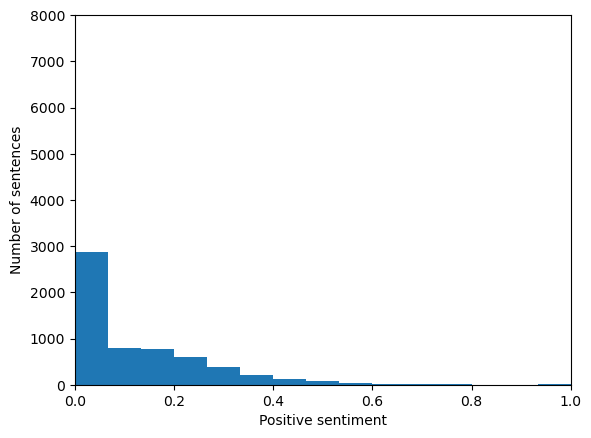

In [104]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

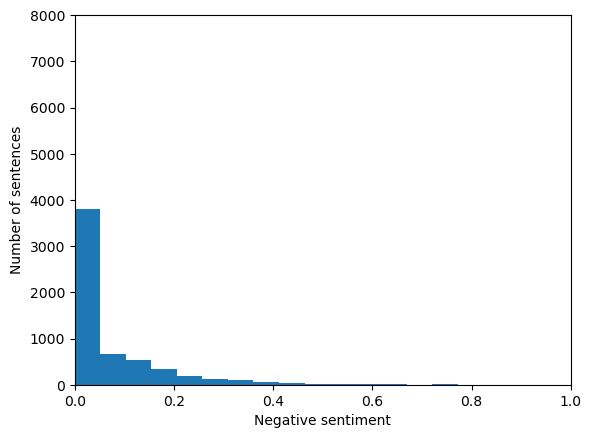

In [105]:
negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc.sents]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

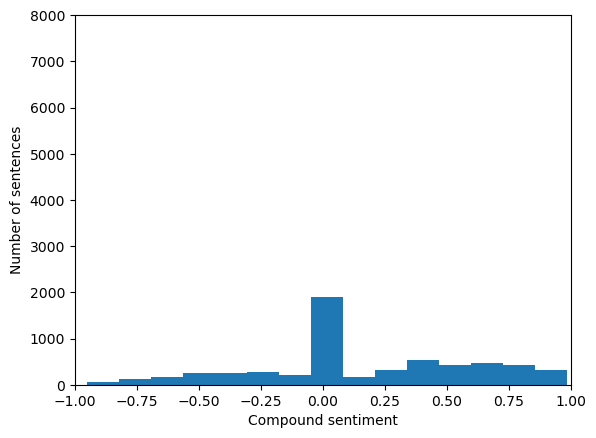

In [106]:
total_sent = []
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc.sents]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.ylim([0,8000])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [107]:
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc.sents]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

Number of positive sentences: 2734
Number of negative sentences: 1341
Number of neutral sentences: 1841


#### Most of the sentences are quite neutral in sentiment. This is not the case when working with data from other sources (e.g., in social media opinions are strong and polarized (bimodal distribution)).

# Task 2: Document classification: Can we detect paragraphs from Frankenstein?

In [108]:
# Let's load our corpus via NLTK this time
from nltk.corpus import PlaintextCorpusReader
?PlaintextCorpusReader
our_books = PlaintextCorpusReader(corpus_root, '.*.txt')
print(our_books.fileids())

['DRACULA.txt', 'Frankenstein.txt', 'Moby_Dick.txt', 'PRIDE_AND_PREJUDICE.txt']


Init signature:
PlaintextCorpusReader(
    root,
    fileids,
    word_tokenizer=WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL),
    sent_tokenizer=<nltk.tokenize.punkt.PunktSentenceTokenizer object at 0x7fa411828340>,
    para_block_reader=<function read_blankline_block at 0x7fa4118450d0>,
    encoding='utf8',
)
Docstring:     
Reader for corpora that consist of plaintext documents.  Paragraphs
are assumed to be split using blank lines.  Sentences and words can
be tokenized using the default tokenizers, or by custom tokenizers
specified as parameters to the constructor.

This corpus reader can be customized (e.g., to skip preface
sections of specific document formats) by creating a subclass and
overriding the ``CorpusView`` class variable.
Init docstring:
Construct a new plaintext corpus reader for a set of documents
located at the given root directory.  Example usage:

    >>> root = '/usr/local/share/nltk_data/c

### We will segment the books into equally long chunks

In [109]:
def get_chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]


# Get the data
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books

chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 500 # how many chunks total
size = 50 # how many sentences per chunk/page

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f,":")
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt :
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt :
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt :
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt :
Number of sentences: 6055
Number of chunks: 122 



### Representing the chunks with bag-of-words

In [110]:
vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Number of samples: 570
Number of features: 23116


### Let's fit the regularized logistic regression. We will crossvalidate the regularization parameter on the training set.

In [111]:
accs = []

#the grid of regularization parameter 
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:
    
    #initialize the classifier
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c)
    
    #crossvalidate
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    accs.append(np.mean(scores))

(0.986, 1.0)

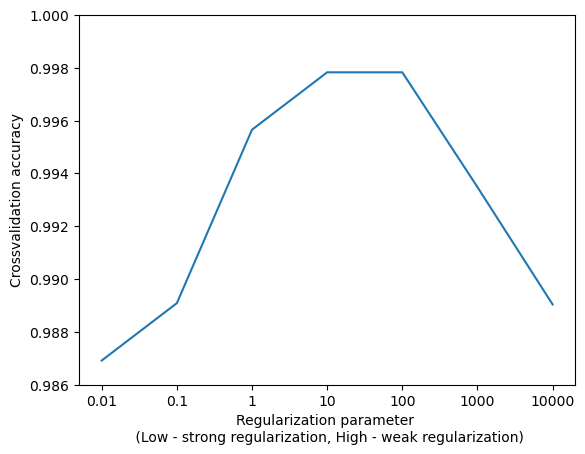

In [112]:
plt.plot(accs)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Regularization parameter \n (Low - strong regularization, High - weak regularization)')
plt.ylabel('Crossvalidation accuracy')
plt.ylim([0.986,1])

### Let's train again, on the entire training set, with the chosen regularization parameter. We will test on the test set

In [113]:
clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

#predict on the test set
print('Accuracy:',clf.score(X_test,Y_test))

Accuracy: 0.9824561403508771


### What features characterize Frankenstein? BOW are interpretable!

In [114]:
coefs=clf.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]

print(np.array(vectorizer.get_feature_names())[top_three])

['frankenstein' 'death' 'poor' 'towards' 'father' 'creature' 'had' 'by'
 'me' 'yet' 'this' 'misery' 'which' 'but' 'will' 'of' 'my' 'justine' 'who'
 'and']


### We can perfectly predict paragraphs from Frankenstein! We saw issues of high dimensionality when using bag of words (more features than samples) and how regularization helps.

### Alternative text representation: word emdeddings, pretrained on intergraded in Spacy (300-dimensional word vectors trained on Common Crawl with GloVe.) Depending on the application, might be suitable or not

In [115]:
print(example,'\n')
print('Embedding representation:',list((nlp(example).vector)[0:10]),'...')

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Embedding representation: [0.04903761, 0.13703471, 0.30768856, -0.20483726, -0.16568802, -0.06900881, -0.13494389, -0.13023743, 0.15460855, -0.10217006] ...


# Task 3: Topic detection

In [116]:
# Get the chunks again (into smaller chunks)
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books
chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 60 # how many chunks total
size = 50 # how many sentences per chunk/page

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f)
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt
Number of sentences: 6055
Number of chunks: 122 



In [117]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = list()
for doc in nlp.pipe(chunks, n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

In [118]:
# Add bigrams too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [119]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 3081
Number of chunks: 240


In [120]:
# models
from gensim.models import LdaMulticore
params = {'passes': 10, 'random_state': seed}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=4, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

In [121]:
model.show_topics(num_words=5)

[(0,
  '0.007*"room" + 0.007*"sleep" + 0.007*"door" + 0.007*"old" + 0.005*"bed"'),
 (1,
  '0.007*"Elizabeth" + 0.006*"father" + 0.004*"life" + 0.004*"feeling" + 0.004*"Collins"'),
 (2,
  '0.013*"Elizabeth" + 0.013*"Darcy" + 0.011*"Bingley" + 0.010*"Miss" + 0.008*"sister"'),
 (3,
  '0.023*"whale" + 0.013*"ship" + 0.010*"sea" + 0.009*"Queequeg" + 0.008*"Captain"')]

In [122]:
model.show_topic(1,20)

[('Elizabeth', 0.0065864567),
 ('father', 0.006177975),
 ('life', 0.0044326535),
 ('feeling', 0.0044310647),
 ('Collins', 0.0040220963),
 ('return', 0.0038955947),
 ('pass', 0.0037969684),
 ('appear', 0.003745837),
 ('love', 0.0033569979),
 ('mind', 0.003348904),
 ('hope', 0.0031736305),
 ('dear', 0.003078409),
 ('remain', 0.0029352237),
 ('enter', 0.0029246635),
 ('heart', 0.002858215),
 ('wish', 0.002743892),
 ('death', 0.0027272825),
 ('young', 0.0026763743),
 ('family', 0.0026666187),
 ('word', 0.0026335593)]

In [123]:
sorted(model[corpus[0]],key=lambda x:x[1],reverse=True)

[(0, 0.9972452)]

In [124]:
# plot topics
data =  pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

/Users/sakota/opt/anaconda3/envs/ada/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sakota/opt/anaconda3/envs/ada/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sakota/opt/anaconda3/envs/ada/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sakota/opt/anaconda3/envs/ada/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [125]:
# assignment
sent_to_cluster = list()
for n,doc in enumerate(corpus):
    if doc:
        cluster = max(model[doc],key=lambda x:x[1])
        sent_to_cluster.append(cluster[0])

In [126]:
# accuracy
from collections import Counter
for book, cluster in book_id.items():
    assignments = list()
    for real,given in zip(chunk_class,sent_to_cluster):
        if real == cluster:
            assignments.append(given)
    most_common,num_most_common = Counter(assignments).most_common(1)[0] # 4, 6 times
    print(book,":",most_common,"-",num_most_common)
    print("Accuracy:",num_most_common/limit)
    print("------")

DRACULA.txt : 0 - 52
Accuracy: 0.8666666666666667
------
Frankenstein.txt : 1 - 59
Accuracy: 0.9833333333333333
------
Moby_Dick.txt : 3 - 50
Accuracy: 0.8333333333333334
------
PRIDE_AND_PREJUDICE.txt : 2 - 58
Accuracy: 0.9666666666666667
------


# Task 4: Semantic analysis based on lexical categories

In [127]:
from empath import Empath
lexicon = Empath()

### Let's see what pre-build categories we can study! More information: https://hci.stanford.edu/publications/2016/ethan/empath-chi-2016.pdf

In [128]:
for cat in list(lexicon.cats.keys())[:15]:
    print(cat)

help
office
dance
money
wedding
domestic_work
sleep
medical_emergency
cold
hate
cheerfulness
aggression
occupation
envy
anticipation


### For each category, we can examine representative terms

In [129]:
lexicon.cats["health"][:15]

['sufferer',
 'schizophrenic',
 'depression',
 'depressant',
 'hospital',
 'appointment',
 'vaccination',
 'influenza',
 'injection',
 'biopsy',
 'mental',
 'syndrome',
 'transfusion',
 'dental',
 'vitamin']

### Studying Pride and Prejudice

In [130]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

In [131]:
empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"])

In [132]:
empath_features

{'disappointment': 149.0,
 'pain': 228.0,
 'joy': 278.0,
 'beauty': 136.0,
 'affection': 439.0}

In [133]:
empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"], normalize = True)

In [134]:
empath_features

{'disappointment': 0.0012256615693403638,
 'pain': 0.001875508978587939,
 'joy': 0.002286804807225645,
 'beauty': 0.0011187246538945602,
 'affection': 0.0036111773754390585}

### Usecase: the evolution of topics

In [135]:
bins = range(0,len(doc.text),150000)


In [136]:
love = []
pain = []
beauty = []
affection = []


for cnt,i in enumerate(bins[:-1]):
    empath_features = lexicon.analyze(doc.text[bins[cnt]:bins[cnt+1]],
                                      categories = ["love", "pain", "joy", "beauty", "affection"], normalize = True)
    love.append(empath_features["love"])
    pain.append(empath_features["pain"])
    beauty.append(empath_features["beauty"])
    affection.append(empath_features["affection"])

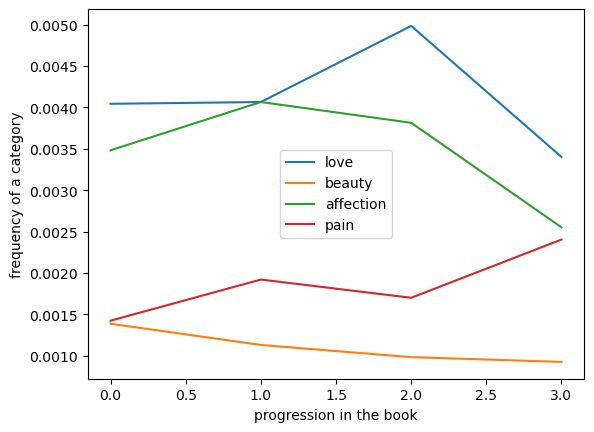

In [137]:
plt.plot(love,label = "love")
plt.plot(beauty, label = "beauty")
plt.plot(affection, label = "affection")
plt.plot(pain,label = "pain")

plt.xlabel("progression in the book")
plt.ylabel("frequency of a category")
plt.legend()

In [138]:
# We can observe how as the story progresses, beauty and affection categories decrease, while love and pain intensify!

### We can create custom categories based on seed terms!
### Models trained on: fiction, nytimes or reddit

In [139]:
lexicon.create_category("healthy_food", ["healthy_food","low_carb","kale","avocado"], model="nytimes")

["avocado", "kale", "Swiss_chard", "escarole", "black_beans", "cucumber", "dill", "leek", "mango", "red_peppers", "chicory", "chanterelles", "chutney", "tamarind", "papaya", "black_olives", "endive", "pesto", "walnuts", "green_beans", "bok_choy", "portobello_mushrooms", "lemon_grass", "radicchio", "ricotta", "chicken_breast", "porcini", "blue_cheese", "snow_peas", "pickled", "Gorgonzola", "chorizo", "yams", "hazelnuts", "fresh_tomatoes", "shiitake_mushrooms", "anchovies", "wild_rice", "scallion", "red_onions", "broccoli_rape", "red_cabbage", "wasabi", "sweet_potato", "feta", "roasted_garlic", "compote", "napoleon", "aioli", "crab_meat", "cauliflower", "jicama", "parsnips", "apricots", "new_potatoes", "truffle_oil", "lemongrass", "pistachios", "saut\u00e9ed", "gnocchi", "duck_confit", "fresh_herbs", "ratatouille", "white_beans", "croutons", "fresh_mozzarella", "squab", "watercress", "roasted_red_peppers", "pine_nuts", "fritters", "butternut_squash", "fava_beans", "drizzled", "red_onion"

In [140]:
lexicon.create_category("healthy_food", ["healthy_food","low_carb","kale","avocado"], model="reddit")

["green_vegetables", "leafy_greens", "whole_grain_bread", "brown_rice", "white_rice", "green_veggies", "veggies", "whole_wheat_bread", "sweet_potatoes", "raw_veggies", "lean_meat", "spinach", "fatty_meat", "kale", "sweet_potato", "avocado", "hummus", "chicken_breast", "veggie", "whole_grain", "vegetables", "whole_wheat_pasta", "salads", "broccoli", "greek_yogurt", "Greek_yogurt", "yogurt", "avocados", "rice_cakes", "raw_vegetables", "almonds", "lean_protein", "grilled_chicken", "quinoa", "steamed_broccoli", "whole_grain_pasta", "brocolli", "kale", "avocado", "tofu", "Veggies", "edamame", "more_veggies", "lean_meats", "quinoa", "salad", "cottage_cheese", "whole_wheat", "wheat_bread", "romaine_lettuce", "white_bread", "raw_spinach", "oatmeal", "white_potatoes", "almond_butter", "pork_rinds", "veg", "cashews", "greek_yoghurt", "baby_carrots", "fresh_veggies", "fatty_meats", "more_vegetables", "avacado", "veges", "nut_butter", "hard_boiled_eggs", "carrot_sticks", "whole_grains", "grilled_c

In [141]:
lexicon.create_category("festive_food", ["festive_food","turkey","eggnog"], model="nytimes")

["turkey", "roast_beef", "white_bread", "fried_chicken", "pancakes", "peanut_butter", "gefilte_fish", "stuffing", "French_fries", "meatloaf", "brisket", "potato_salad", "pumpkin_pie", "scrambled_eggs", "french_fries", "spaghetti", "gravy", "tamales", "pot_roast", "oatmeal", "lasagna", "corned_beef", "latkes", "pickles", "sauerkraut", "burger", "grits", "biscuits", "hamburger", "salad_bar", "corn_bread", "chicken_soup", "bacon", "cream_cheese", "brownies", "tofu", "pastrami", "pork_chops", "salami", "marshmallows", "collard_greens", "macaroni", "pies", "raw_fish", "eggnog", "cheeseburgers", "truffles", "chocolate_cake", "hard-boiled_eggs", "baked_potatoes", "venison", "cottage_cheese", "pheasant", "applesauce", "quail", "fruit_salad", "meatballs", "chocolate_chip_cookies", "tacos", "roast", "jelly", "chicken_salad", "omelet", "gumbo", "steaks", "soup", "lox", "sausage", "roast_chicken", "rye", "bagel", "fruitcake", "fries", "fried_eggs", "ketchup", "chicken_wings", "barbecue_sauce", "sw

### List of further resources
    * NLTK
    * Jellyfish: string similarity library
    * TextBlob: simplified text processing
    * PyEnchant: language detection
    * WordNet: ontology of concepts (inc. in NLTK)
    * Stanford NLP (Java)
    * Tweet NLP: https://www.cs.cmu.edu/~ark/TweetNLP/

## Part 2

### Question 1:
An NLP preprocessing model, using the list of stopwords ['a', 'the', 'is', 'you', 'I','my','with','was'] for the input sentence
“I was driving down the street with my CAR! :)” <br>
gives the following output: {driving, down, street, car, :)}.
The model consists of: <br>

a) Stopword Removal, Casefolding and Stemming <br>
b) Stopword Removal and Casefolding <br>
c) Stopword Removal and Stemming <br>
d) Casefolding and Stemming <br>

In [142]:
#b)

### Question 2:
What statement is false about topic detection using LSA: <br>

a) It finds the representation of documents and words in the latent "topic space" <br>
b) It produces topics interpretable in “word space” <br>
c) A document's topic representation is a probability distribution over topics <br>
d) The vectors representing topics in “word space” are linearly independent <br>

In [143]:
#c)

### Question 3:
The problem of having more features than documents when using a TF-IDF matrix for document classification cannot be addressed by: <br>

a) Using SVD for dimensionality reduction <br>
b) Using min-max scaling of features <br>
c) Penalizing very large positive and very large negative weights (a.k.a. regularization) <br>
d) Using online feature selection <br>

In [144]:
#b)

### Question 4:
Which of the following is false about word vectors: <br>

a) Word2vec is used to achieve a lower dimensional representation than bag of words <br>
b) Semantically similar words typically have similar word2vec vectors <br>
c) Each dimension in the word2vec embedding has a clear interpretation <br>
d) Word2Vec can be used for the computation of sentence vectors <br>

In [145]:
#c)

### Question 5:
Given the following word (W) / context (C) co-occurrence frequencies, which statement is true regarding the pointwise mutual information (PMI)?

|  |W1|W2|W3|
|--|--|--|--|
|C1| 2| 0| 3|
|C2| 6| 4| 0|
|C3| 1| 1| 3|

a) PMI(w=W1, c=C2) > PMI(w=W2, c=C2) > PMI(w=W3, c=C3) <br>
b) PMI(w=W2, c=C2) > PMI(w=W1, c=C2) >  PMI(w=W3, c=C3) <br>
c) PMI(w=W3, c=C3) > PMI(w=W1, c=C2) > PMI(w=W2, c=C2) <br>
d) PMI(w=W3, c=C3) > PMI(w=W2, c=C2) > PMI(w=W1, c=C2) <br>

In [146]:
#d)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import *

# Handling text 2 exercise
[Handling text exercisses ADApted drom ADA 2018 final exam]


The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Task A: Picking up the shovel

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
season = ""
episode = ""
scene = ""
data = []
with open("data/all_scripts.txt") as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith(">> "):
            season = int(line[10:12])
            episode = line[3:]
            continue
        if line.startswith("> "):
            scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([season, episode, scene, character, line])
lines = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])

In [3]:
lines.groupby(["Season", "Episode", "Scene"]).count().reset_index().groupby("Season").count()[["Scene"]]

Scene
Season       
1         157
2         205
3         193
4         219
5         198
6         211
7         207
8         191
9         177
10        189

**Q2**. Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

In [4]:
lines_per_chars = lines.groupby("Character").count()[["Line"]]
recurrent_chars = lines_per_chars[lines_per_chars["Line"] > 90]
recurrent_chars

Line
Character          
Amy            3472
Arthur          130
Bernadette     2690
Bert             95
Beverley        162
Emily           164
Howard         5872
Kripke          106
Leonard        9829
Leslie          116
Man             105
Mrs Cooper      213
Mrs Wolowitz    136
Penny          7677
Priya           222
Raj            4779
Sheldon       11689
Stuart          733
Wil             126
Zack            135

In [5]:
recurrent_chars = recurrent_chars.drop("Man", axis=0)
recurrent_chars

Line
Character          
Amy            3472
Arthur          130
Bernadette     2690
Bert             95
Beverley        162
Emily           164
Howard         5872
Kripke          106
Leonard        9829
Leslie          116
Mrs Cooper      213
Mrs Wolowitz    136
Penny          7677
Priya           222
Raj            4779
Sheldon       11689
Stuart          733
Wil             126
Zack            135

## Task B: Read the scripts carefully

### Part 1: Don't put the shovel down just yet

**Q3**. From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [6]:
def clean_line(line):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, ' ')
    return line.lower()
lines["Line"] = lines["Line"].apply(clean_line)
lines.head()

Season                               Episode                        Scene  \
0       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
1       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
2       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
3       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
4       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   

      Character                                               Line  
0       Sheldon  so if a photon is directed through a plane wit...  
1       Leonard                         agreed  what s your point   
2       Sheldon  there s no point  i just think it s a good ide...  
3       Leonard                                         excuse me   
4  Receptionist                                           hang on

**Q4**. For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [19]:
corpus_frequency = pd.concat([pd.Series(row['Line'].split(' ')) for _, row in lines.iterrows()]).reset_index()
corpus_frequency.columns = ["Frequency", "Word"]
corpus_frequency = corpus_frequency.groupby("Word").count()

Word
         136530
0             6
00            5
000          33
000lb         1
          ...  
…tion         1
…when         1
…who          1
‭yeah         1
♪             1
Name: Frequency, Length: 21692, dtype: int64

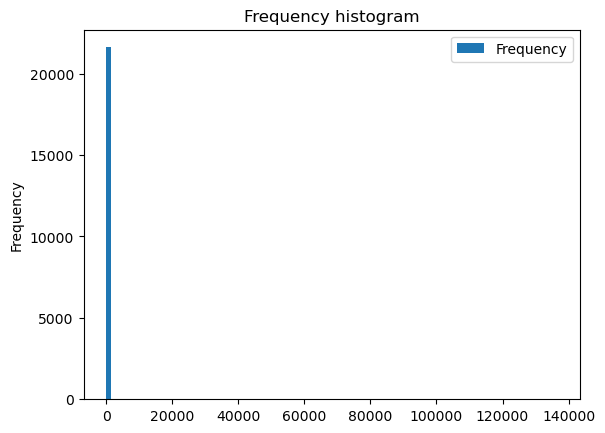

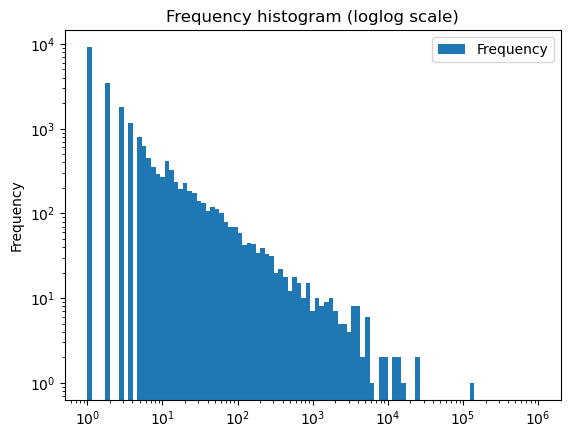

In [21]:
corpus_frequency.plot.hist(column=["Frequency"], bins=100, title="Frequency histogram")
corpus_frequency.plot.hist(column=["Frequency"], loglog=True, bins=np.logspace(0, 6, 100),
                           title="Frequency histogram (loglog scale)");

The distribution of frequencies follows a power law. The correct way to visualize this frequency is on a log-log scale.

### Part 2: Talkativity
**Q5**. For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [22]:
lines["Words"] = lines["Line"].apply(lambda x: len(x.split()))
words_per_char = lines.groupby("Character").sum()["Words"]
words_per_char[recurrent_chars.index]

Character
Amy              39933
Arthur            1451
Bernadette       27726
Bert              1146
Beverley          2029
Emily             1571
Howard           69505
Kripke            1246
Leonard         102496
Leslie            1249
Mrs Cooper        3389
Mrs Wolowitz      1459
Penny            79270
Priya             1940
Raj              60099
Sheldon         185388
Stuart            7955
Wil               1678
Zack              1427
Name: Words, dtype: int64

In [23]:
print("Most talkative character: ", words_per_char[recurrent_chars.index].idxmax())

Most talkative character:  Sheldon


## Task D: The Detective's Hat

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high.

**Q6**. Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons.

In [24]:
train_set = lines[lines["Season"] <= lines["Season"].max() - 2]
train_set.head()

Season                               Episode                        Scene  \
0       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
1       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
2       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
3       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   
4       1  Series 01 Episode 01 – Pilot Episode  A corridor at a sperm bank.   

      Character                                               Line  Words  
0       Sheldon  so if a photon is directed through a plane wit...     57  
1       Leonard                         agreed  what s your point       5  
2       Sheldon  there s no point  i just think it s a good ide...     16  
3       Leonard                                         excuse me       2  
4  Receptionist                                           hang on       2

In [25]:
test_set = lines[lines["Season"] > lines["Season"].max() - 2]
test_set.head()

Season                                          Episode  \
40354       9  Series 09 Episode 01 – The Matrimonial Momentum   
40355       9  Series 09 Episode 01 – The Matrimonial Momentum   
40356       9  Series 09 Episode 01 – The Matrimonial Momentum   
40357       9  Series 09 Episode 01 – The Matrimonial Momentum   
40358       9  Series 09 Episode 01 – The Matrimonial Momentum   

                   Scene Character  \
40354  A Wedding Chapel.     Penny   
40355  A Wedding Chapel.   Leonard   
40356  A Wedding Chapel.     Penny   
40357  A Wedding Chapel.   Leonard   
40358  A Wedding Chapel.     Penny   

                                                    Line  Words  
40354                 so  what package are you thinking       6  
40355  mm  this one comes with music and flowers  oh ...     19  
40356                            why would we want that       5  
40357  ‘cause there s a lot of gorgeous blondes out t...     26  
40358  whatever  put us on the internet  i ve always ...     16

**Q7**. Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [26]:
words_for_chars = pd.concat([pd.Series(row["Character"], row['Line'].split())
                             for _, row in train_set.iterrows()]).reset_index()
words_for_chars.columns = ["Word", "Character"]

words_for_chars = words_for_chars.groupby("Word")["Character"].apply(set)
sheldon_words = words_for_chars[words_for_chars.apply(lambda x: ("Sheldon" in x) and (len(x) == 1))].index

In [27]:
def contains_sheldon_words(line):
    for word in sheldon_words:
        if word in line.split():
            return True
    return False
test_pred = test_set["Line"].apply(contains_sheldon_words)
test_true = test_set["Character"] == "Sheldon"

In [28]:
print("Accuracy: ", (test_true == test_pred).sum() / len(test_true))

Accuracy:  0.7825013713658804


We know that a line that contains a word that is only said by Sheldon has to be said by Sheldon. Our simple classifier classifies such lines as uttered by Sheldon, and other lines as not uttered by Sheldon. This results in an accuracy of 78% on the test set.

To build our classifier, we need to isolate the words that are only said by Sheldon, (`sheldon_words`), by first associating each word in the line to the character that uttered the line, then grouping by words and keeping only the ones that contain only "Sheldon" as `Character`.

# Scaling up

Originally released as homework in ADA2019.

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [6]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *
import numpy as np 
import pandas as pd

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

spark

... and load the data in a Spark dataframe.

In [7]:
reddit = spark.read.json("messages.json.gz")
score = spark.read.json("score.json.gz")

Import useful functions:

In [8]:
%run hw2_utils.py

Print the schema:

In [9]:
reddit.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- id: string (nullable = true)
 |-- subreddit: string (nullable = true)



In [10]:
score.printSchema()

root
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)



### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

In [11]:
subreddit_info = reddit.groupBy("subreddit")\
    .agg(count("*").alias("total_posts"), 
         countDistinct("author").alias("users_count"),
         avg(length("body")).alias("posts_length"),
         stddev(length("body")).alias("posts_length_stddev")
        ).cache()

subreddit_info

DataFrame[subreddit: string, total_posts: bigint, users_count: bigint, posts_length: double, posts_length_stddev: double]

In [12]:
subreddit_info.select("subreddit", "total_posts", "users_count", "posts_length").show(15)

+---------------+-----------+-----------+------------------+
|      subreddit|total_posts|users_count|      posts_length|
+---------------+-----------+-----------+------------------+
|         hockey|     389329|      25568| 95.37287230080472|
|         videos|     511492|     157628|170.22702603364274|
|          DotA2|     445154|      41466|141.48906670500546|
|           news|     477658|      98736| 230.9491602778557|
|  AdviceAnimals|     411902|     115815| 159.2513801826648|
| DestinyTheGame|     471160|      37008|165.41786866457255|
|           pics|     564502|     205305| 114.9710045314277|
|      worldnews|     439417|      99261|224.93754679495785|
|            nfl|     534345|      41593|148.96989211090212|
|         soccer|     455215|      41648|134.42224663071295|
|GlobalOffensive|     382017|      46686| 147.2883981602913|
|leagueoflegends|    1151287|     119321|152.72280760574904|
|         movies|     354601|      92484|164.83209297210104|
|            nba|     70

### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

In [13]:
by_posts = subreddit_info.select("subreddit", "total_posts").sort(col("total_posts").desc()).toPandas()
by_users = subreddit_info.select("subreddit", "users_count").sort(col("users_count").desc()).toPandas()

display_side_by_side(by_posts, by_users)

subreddit 
 total_posts 
 
 
 
 
 0 
 leagueoflegends 
 1151287 
 
 
 1 
 nba 
 704862 
 
 
 2 
 funny 
 691139 
 
 
 3 
 pics 
 564502 
 
 
 4 
 nfl 
 534345 
 
 
 5 
 videos 
 511492 
 
 
 6 
 news 
 477658 
 
 
 7 
 DestinyTheGame 
 471160 
 
 
 8 
 soccer 
 455215 
 
 
 9 
 DotA2 
 445154 
 
 
 10 
 worldnews 
 439417 
 
 
 11 
 AdviceAnimals 
 411902 
 
 
 12 
 hockey 
 389329 
 
 
 13 
 GlobalOffensive 
 382017 
 
 
 14 
 movies 
 354601 
 
 
 
 
 
 
 subreddit 
 users_count 
 
 
 
 
 0 
 funny 
 224077 
 
 
 1 
 pics 
 205305 
 
 
 2 
 videos 
 157628 
 
 
 3 
 leagueoflegends 
 119321 
 
 
 4 
 AdviceAnimals 
 115815 
 
 
 5 
 worldnews 
 99261 
 
 
 6 
 news 
 98736 
 
 
 7 
 movies 
 92484 
 
 
 8 
 GlobalOffensive 
 46686 
 
 
 9 
 nba 
 45034 
 
 
 10 
 soccer 
 41648 
 
 
 11 
 nfl 
 41593 
 
 
 12 
 DotA2 
 41466 
 
 
 13 
 DestinyTheGame 
 37008 
 
 
 14 
 hockey 
 25568

Please note that selection as sorting are executed by Spark.

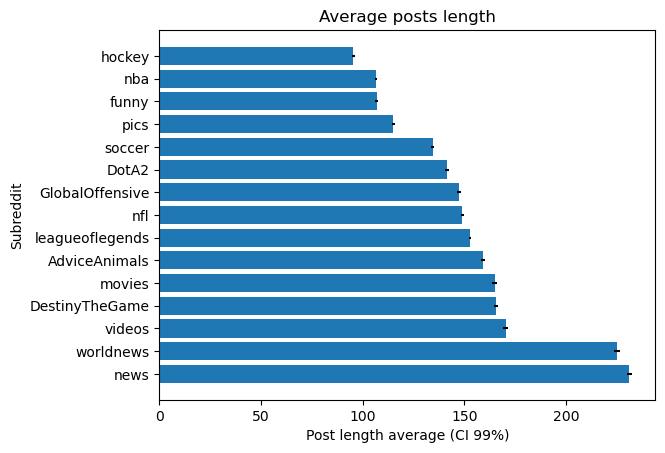

In [14]:
import math

subreddits_by_pl = subreddit_info.toPandas().sort_values("posts_length", ascending=False).reset_index(drop=True)

sqrt_N = subreddits_by_pl['total_posts'].apply(lambda r: math.sqrt(r))
s = subreddits_by_pl['posts_length_stddev']
subreddits_by_pl['ci99'] = 2.576*(s / sqrt_N)

plt.barh(subreddits_by_pl.subreddit, subreddits_by_pl.posts_length, xerr=subreddits_by_pl.ci99)
plt.xlabel('Post length average (CI 99%)')
plt.ylabel('Subreddit')
plt.title('Average posts length')
plt.show()

Note that the distribution of the length of the messages is NOT normal. Although this implementation is accepted for this homework, this is a weak solution and other methods (bootstrapping) are preferred.

### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

In [15]:
reddit.join(score, "id")\
    .groupBy("subreddit").agg(avg("score").alias("score"))\
    .sort(col("score").desc()).show()

+---------------+------------------+
|      subreddit|             score|
+---------------+------------------+
|         videos|12.649445152612358|
|           pics|12.216559020162904|
|          funny|12.041505399058655|
|  AdviceAnimals|11.251695791717447|
|         soccer|10.634627593554693|
|         movies|  9.82014997137628|
|            nfl| 9.048348913155358|
|            nba| 9.032795071943161|
|           news| 8.673421150697779|
|      worldnews|  7.86683719564787|
|         hockey| 6.520120515039979|
|leagueoflegends| 5.983557531701479|
|          DotA2| 4.880537971129092|
|GlobalOffensive| 4.351442475073099|
| DestinyTheGame|3.0288819084811953|
+---------------+------------------+



## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [16]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [17]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

# tokenize the text
regexTokenizer = RegexTokenizer(inputCol="body", outputCol="all_words", pattern="\\W")
reddit_with_words = regexTokenizer.transform(reddit)

# remove stop words
remover = StopWordsRemover(inputCol="all_words", outputCol="words")
reddit_with_tokens = remover.transform(reddit_with_words).drop("all_words")

Note: The text can be tokenized with more complex regular expressions.

In [18]:
reddit_with_tokens.show(5)

+-----------------+--------------------+-------+---------------+--------------------+
|           author|                body|     id|      subreddit|               words|
+-----------------+--------------------+-------+---------------+--------------------+
|        WyaOfWade|gg this one's ove...|cqug90h|            nba|[gg, one, watch, ...|
|        BEE_REAL_|Nihilum and LG ar...|cqug90p|GlobalOffensive|[nihilum, lg, sig...|
|        SlowRolla|Me too. Same hamm...|cqug916|           pics|   [hammock, fabric]|
|   SenpaiOniichan|well i think new ...|cqug919|leagueoflegends|[well, think, new...|
|backwoodsofcanada|That's something ...|cqug91n|  AdviceAnimals|[something, hear,...|
+-----------------+--------------------+-------+---------------+--------------------+
only showing top 5 rows



Compute the 50,000 most frequent words across all the provided subreddits.

In [19]:
# get all words in a single dataframe
all_words = reddit_with_tokens.select(explode("words").alias("word"))
# group by, sort and limit to 50k 
top50k = all_words.groupBy("word").agg(count("*").alias("total")).sort(col("total").desc()).limit(50000)

top50k.show()

+------+-------+
|  word|  total|
+------+-------+
|  like|1018978|
|people| 745031|
|   get| 691349|
|   one| 682820|
| think| 575352|
|     m| 569057|
|    re| 517827|
|   com| 497303|
|  time| 456060|
|  good| 454768|
|  game| 452376|
|really| 451527|
|  even| 432973|
|  know| 413379|
|    gt| 404776|
|  http| 395552|
|  well| 352021|
|   see| 351081|
|  much| 348304|
|  also| 333478|
+------+-------+
only showing top 20 rows



Get the subreddit representation:

In [20]:
# Get all the words in a subreddit
tokens = reddit_with_tokens.select("subreddit", explode("words").alias("word")).distinct()
# Join with the whitelist of the top 50k
filtered_tokens = tokens.alias("t").join(top50k, tokens.word==top50k.word).select("t.*")

filtered_tokens

DataFrame[subreddit: string, word: string]

Collect the representation of subreddit:

In [21]:
subreddit_50k = filtered_tokens.rdd.map(lambda r: (r.subreddit, [r.word])).reduceByKey(lambda a,b: a+b).collect()

In [22]:
for sr in subreddit_50k:
    print("Subreddit: {} - Words: {}".format(sr[0], len(sr[1])))

Subreddit: AdviceAnimals - Words: 40972
Subreddit: movies - Words: 39371
Subreddit: nfl - Words: 39116
Subreddit: pics - Words: 42877
Subreddit: worldnews - Words: 41846
Subreddit: hockey - Words: 36150
Subreddit: DotA2 - Words: 36878
Subreddit: GlobalOffensive - Words: 34376
Subreddit: news - Words: 41907
Subreddit: funny - Words: 43324
Subreddit: DestinyTheGame - Words: 35640
Subreddit: nba - Words: 38228
Subreddit: leagueoflegends - Words: 41986
Subreddit: soccer - Words: 38188
Subreddit: videos - Words: 43392


### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

In [23]:
# Note: similarity is computed 2 times! It can be optimized
similarity = []
for sr1 in subreddit_50k:
    for sr2 in subreddit_50k:
        similarity.append((sr1[0], sr2[0], jaccard_similarity(sr1[1], sr2[1])))


similarity_matrix_50k_words = pd.DataFrame(similarity).pivot(index=0, columns=1, values=2)

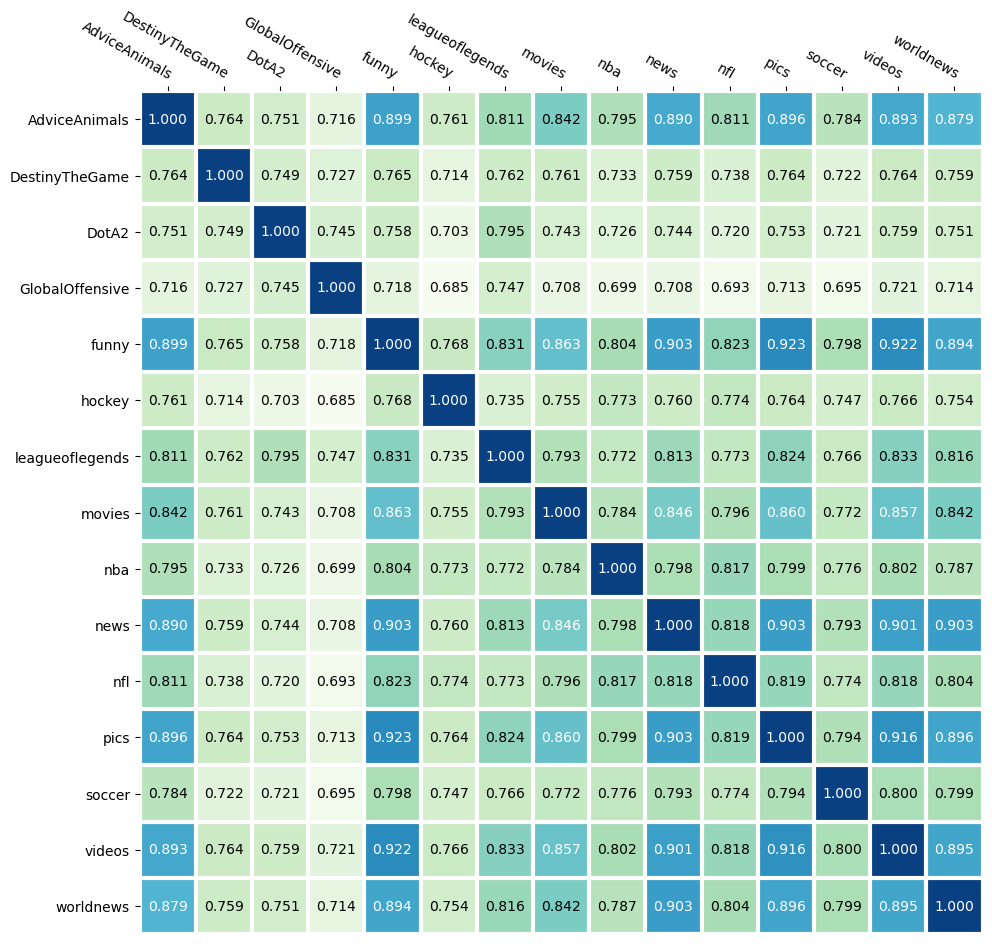

In [24]:
plot_heatmap(similarity_matrix_50k_words)

Examples of discussion topics: 
- words frequency is not taken into account
- by considering the most frequent words overall, you may lose tokens that are very specific of one subreddit.
- you may approximate the vocabulary of English and the Jaccard similarity is natually high and not very representative
- Size of the sets are not the same. This can introduce biases.

### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

In [25]:
# Word count at subreddit level
words_count_by_subreddit_rdd = reddit_with_tokens.rdd\
    .flatMap(lambda r: [((r.subreddit, w), 1) for w in r.words])\
    .reduceByKey(lambda a,b: a+b).cache()

# conversion in a dataframe
words_count_by_subreddit = spark.createDataFrame(
            words_count_by_subreddit_rdd.map(lambda r: Row(subreddit=r[0][0], word=r[0][1], count=r[1]))
)

# Window on the words grouped by subreddit
window = Window.partitionBy(words_count_by_subreddit['subreddit']).orderBy(col('count').desc())

# Add position with rank() function (rowNumber is accepted, and it would be more correct)
top1000_rdd = words_count_by_subreddit.select('*', rank().over(window).alias('rank'))\
  .filter(col('rank') <= 1000).rdd.map(lambda r: (r.subreddit, [r.word])).reduceByKey(lambda a,b: a+b)

top1000 = top1000_rdd.collect()

23/12/11 18:15:32 WARN BlockManager: Task 99 already completed, not releasing lock for rdd_123_0


Compute the similarity:

In [26]:
similarity = []
for sr1 in top1000:
    for sr2 in top1000:
        similarity.append((sr1[0], sr2[0], jaccard_similarity(sr1[1], sr2[1])))


# Crate a dataframe with the similarity
similarity_matrix_words = pd.DataFrame(similarity).pivot(index=0, columns=1, values=2)

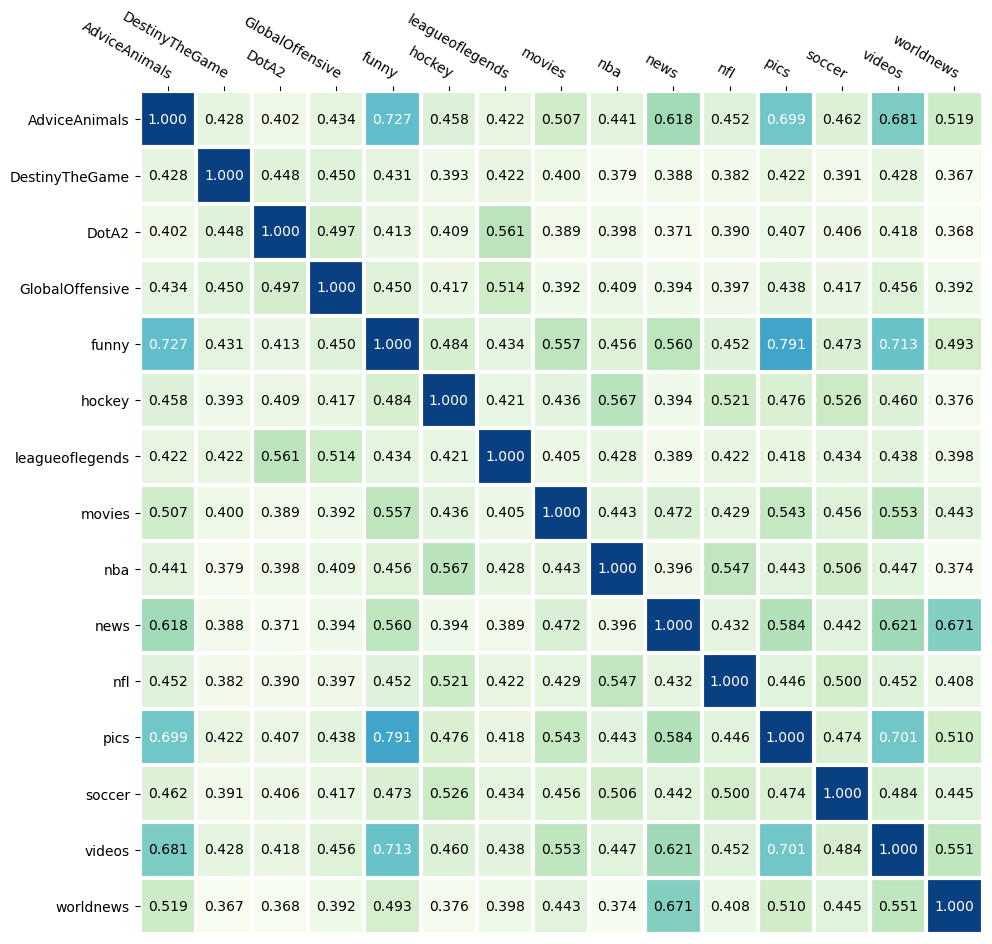

In [27]:
plot_heatmap(similarity_matrix_words)

Discussion topics:
- although the word frequency is still not consider, the dataset is more balances (same number of words)
- you can observe higher similarity between videogames, news, sports.

## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

In [28]:
user_in_communities_rdd = reddit.select("subreddit", "author").distinct().rdd.map(lambda r: (r.author, 1))\
    .reduceByKey(lambda a,b: a+b).map(lambda r: Row(author=r[0], communities=r[1]))

# Create a dataframe and sort
user_in_communities = spark.createDataFrame(user_in_communities_rdd).sort(col("communities").desc())

user_in_communities.show(1)

+-------+-----------+
| author|communities|
+-------+-----------+
|whispen|         15|
+-------+-----------+
only showing top 1 row



### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

In [29]:
users = reddit.select("subreddit", "author").distinct()\
    .rdd.map(lambda r: (r.subreddit, [r.author]))\
    .reduceByKey(lambda a,b: a+b).collect()

similarity_users = []
for sr1 in users:
    for sr2 in users:
        similarity_users.append((sr1[0], sr2[0], jaccard_similarity(sr1[1], sr2[1])))
        
similarity_matrix_users = pd.DataFrame(similarity_users).pivot(index=0, columns=1, values=2)

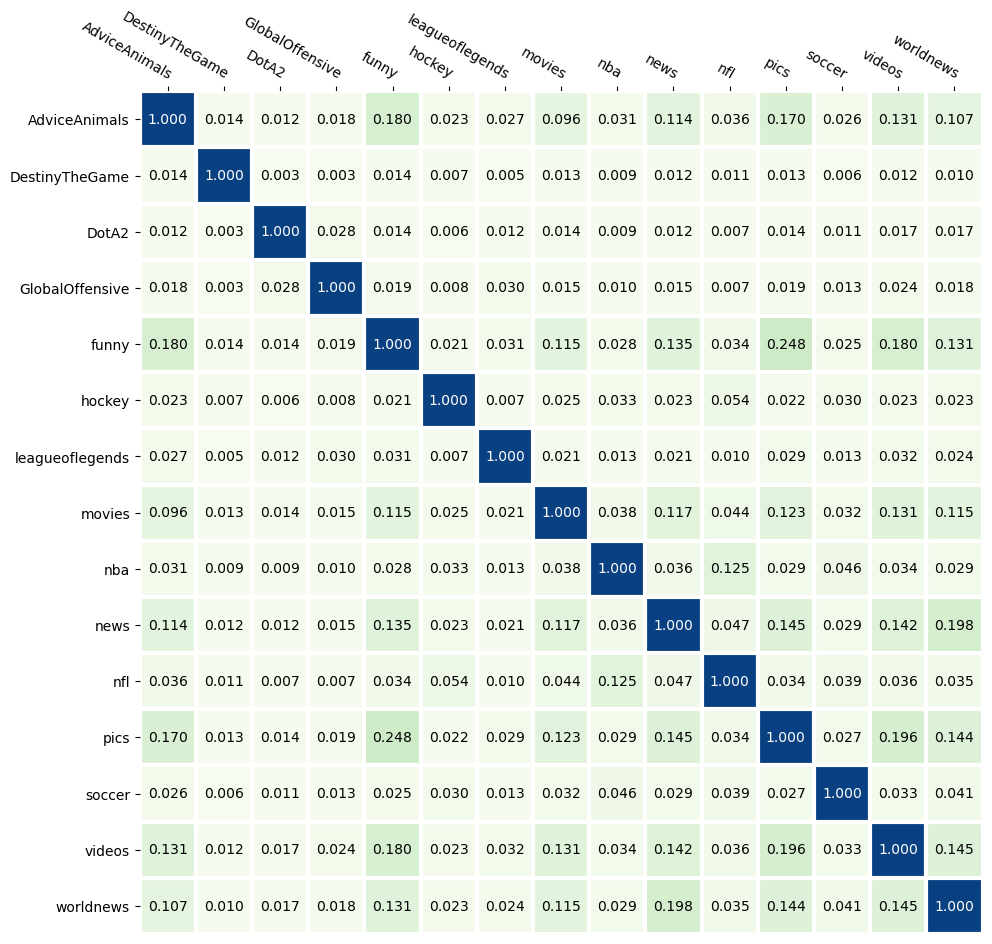

In [30]:
plot_heatmap(similarity_matrix_users)

Examples:
- The similarity is weaker than in the words-based analysis
- Intepretation about the values: funny and pics share the highest number of users, followed by news and worldnews, etc
- This interpretations have the same limitations of the case with 50k words: the size of the sets are very different and it's hard to compare the values: think about the case set A is contained in B

## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

Text(0.5, 1.0, 'NBA similarity')

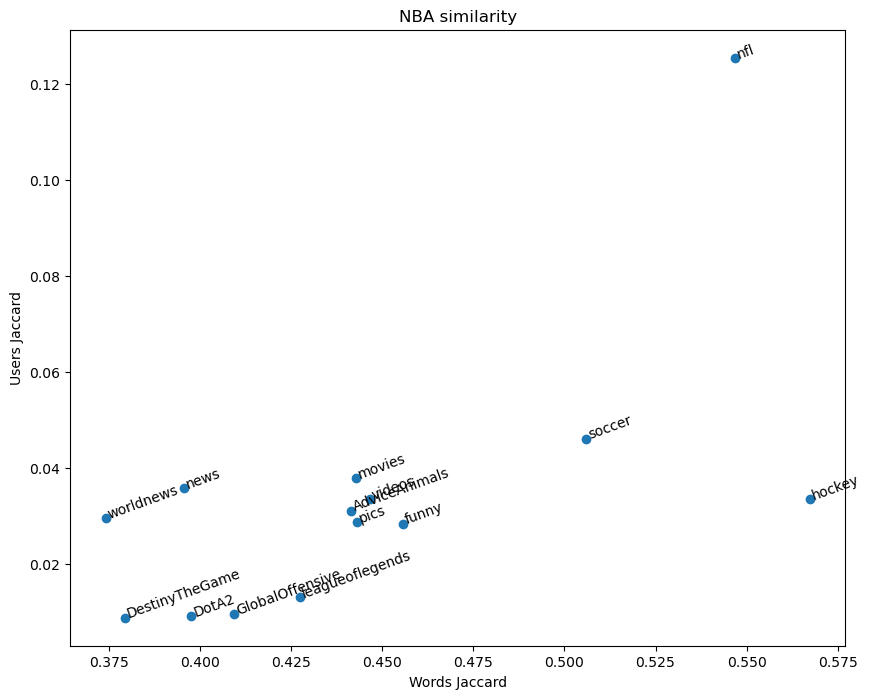

In [31]:
sr = "nba"

fig, ax = plt.subplots(figsize=(10,8))

u = similarity_matrix_users[similarity_matrix_users.index == sr].drop(sr, axis=1).to_numpy()[0]
w = similarity_matrix_words[similarity_matrix_words.index == sr].drop(sr, axis=1).to_numpy()[0]
ax = plt.scatter(w, u)

c=similarity_matrix_users[similarity_matrix_users.index == sr].drop(sr, axis=1).columns.tolist()

for i in range(0, len(u)):
    plt.annotate(c[i], xy=(w[i], u[i]), rotation=20)
    
plt.xlabel("Words Jaccard")
plt.ylabel("Users Jaccard")
plt.title("NBA similarity")

Expected discussion:

- Subreddits with similar semantic tend to be close. In relation to NBA they share similar properties. An important aspect to keep in mind is that plot is in the space of NBA and the values are based on the similarity with this subreddit. For example, news and wordnews have similar distances from NBA but we cannot say much about the distance  between these 2.
- NFL and NBA share similar language and many common users (American sports?)
- Hockey and soccer have a similar overlap in term of users but they differ in language similarity, with hockey the most similar to NBA

# EPFL ADA 2021 - PySpark Tutorial

In [1]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

ModuleNotFoundError: No module named 'pyspark'

Let's initialize the Spark context:

In [4]:
# create the session
spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

You can easily check the current version and get the link of the web interface. In the Spark UI, you can monitor the progress of your job and debug the performance bottlenecks:

In [5]:
spark

# Vietnam War (Nov 1, 1955 – Apr 30, 1975)

**Pres. Johnson**: _What do you think about this Vietnam thing? I’d like to hear you talk a little bit._

**Sen. Russell**: _Well, frankly, Mr. President, it’s the damn worse mess that I ever saw, and I don’t like to brag and I never have been right many times in my life, but I knew that we were going to get into this sort of mess when we went in there._

May 27, 1964

![banner](img/banner.jpg)

----

The Vietnam War, also known as the Second Indochina War, and in Vietnam as the Resistance War Against America or simply the American War, was a conflict that occurred in Vietnam, Laos, and Cambodia from 1 November 1955 to the fall of Saigon on 30 April 1975. It was the second of the Indochina Wars and was officially fought between North Vietnam and the government of South Vietnam.

**The dataset describes all the air force operation in during the Vietnam War.**

**Bombing_Operations** [Get the dataset here](https://drive.google.com/a/epfl.ch/file/d/11cUKbpt-CZY-IVsAkaGXqwZlEzPvf0j5/view?usp=sharing)

- AirCraft: _Aircraft model (example: EC-47)_
- ContryFlyingMission: _Country_
- MissionDate: _Date of the mission_
- OperationSupported: _Supported War operation_ (example: [Operation Rolling Thunder](https://en.wikipedia.org/wiki/Operation_Rolling_Thunder))
- PeriodOfDay: _Day or night_
- TakeoffLocation: _Take off airport_
- TimeOnTarget
- WeaponType
- WeaponsLoadedWeight

**Aircraft_Glossary** [Get the dataset here](https://drive.google.com/a/epfl.ch/file/d/1lrG1gt6Zz3T0Oe_MTpzNoU-S6gaTfonC/view?usp=sharing)

- AirCraft: _Aircraft model (example: EC-47)_
- AirCraftName
- AirCraftType

**Dataset Information:**

THOR is a painstakingly cultivated database of historic aerial bombings from World War I through Vietnam. THOR has already proven useful in finding unexploded ordnance in Southeast Asia and improving Air Force combat tactics:
https://www.kaggle.com/usaf/vietnam-war-bombing-operations

Load the datasets:

In [8]:
Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

Check the schema:

In [9]:
Bombing_Operations.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [10]:
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



Get a sample with `take()`:

In [11]:
Bombing_Operations.take(3)

[Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1971-06-05', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='TAN SON NHUT', TargetCountry='CAMBODIA', TimeOnTarget=1005.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1972-12-26', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='NAKHON PHANOM', TargetCountry='SOUTH VIETNAM', TimeOnTarget=530.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='RF-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1973-07-28', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='UDORN AB', TargetCountry='LAOS', TimeOnTarget=730.0, WeaponType=None, WeaponsLoadedWeight=0)]

Get a formatted sample with `show()`:

In [12]:
Aircraft_Glossary.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

In [13]:
print("In total there are {0} operations".format(Bombing_Operations.count()))

In total there are 4400775 operations


## Question 1: Which countries are involved and in how many missions? 

Keywords: `Dataframe API`, `SQL`, `group by`, `sort`

Let's group the missions by `ContryFlyingMission` and count how many records exist:

In [14]:
missions_counts = Bombing_Operations.groupBy("ContryFlyingMission")\
                                    .agg(count("*").alias("MissionsCount"))\
                                    .sort(desc("MissionsCount"))
missions_counts.show()

+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



In this case we used the DataFrame API, but we could rewite the `groupBy` using pure SQL:

In [15]:
Bombing_Operations.registerTempTable("Bombing_Operations")

query = """
SELECT ContryFlyingMission, count(*) as MissionsCount
FROM Bombing_Operations
GROUP BY ContryFlyingMission
ORDER BY MissionsCount DESC
"""

missions_counts = spark.sql(query)
missions_counts.show()

/Users/sakota/opt/anaconda3/envs/ada2023/lib/python3.9/site-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+
| ContryFlyingMission|MissionsCount|
+--------------------+-------------+
|UNITED STATES OF ...|      3708997|
|     VIETNAM (SOUTH)|       622013|
|                LAOS|        32777|
|       KOREA (SOUTH)|        24469|
|           AUSTRALIA|        12519|
+--------------------+-------------+



The Dataframe is small enough to be moved to Pandas:

In [16]:
missions_count_pd = missions_counts.toPandas()
missions_count_pd.head()

ContryFlyingMission  MissionsCount
0  UNITED STATES OF AMERICA        3708997
1           VIETNAM (SOUTH)         622013
2                      LAOS          32777
3             KOREA (SOUTH)          24469
4                 AUSTRALIA          12519

Let's plot a barchart with the number of missions by country:

Text(0.5, 1.0, 'Number of missions by contry')

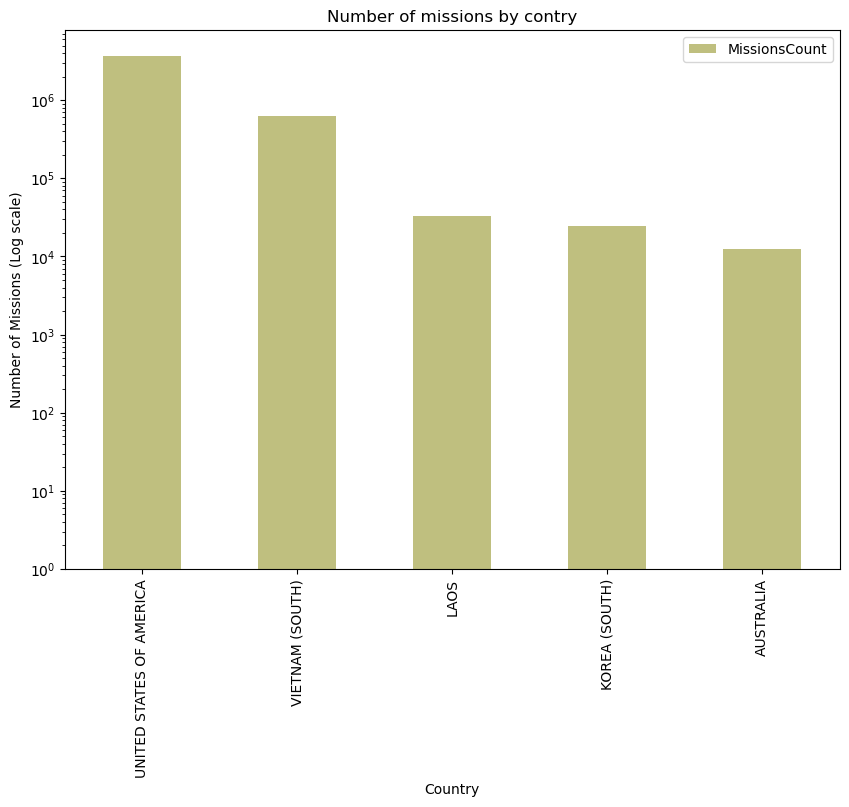

In [17]:
pl = missions_count_pd.plot(kind="bar", 
                            x="ContryFlyingMission", y="MissionsCount", 
                            figsize=(10, 7), log=True, alpha=0.5, color="olive")
pl.set_xlabel("Country")
pl.set_ylabel("Number of Missions (Log scale)")
pl.set_title("Number of missions by contry")

----

## Questions 2: Show the number of missions in time for each of the countries involved.

Keywords: `group by`, `parse date`, `plot`

Let's select the relevant columns:

In [18]:
missions_countries = Bombing_Operations.selectExpr(["to_date(MissionDate) as MissionDate", "ContryFlyingMission"])
missions_countries

DataFrame[MissionDate: date, ContryFlyingMission: string]

The filed MissionDate is converted to a Python `date` object.

Now we can group by `MissionDate` and `ContryFlyingMission` to get the count:

In [19]:
missions_by_date = missions_countries\
                    .groupBy(["MissionDate", "ContryFlyingMission"])\
                    .agg(count("*").alias("MissionsCount"))\
                    .sort(asc("MissionDate")).toPandas()
missions_by_date.head()

MissionDate       ContryFlyingMission  MissionsCount
0  1965-10-01  UNITED STATES OF AMERICA            447
1  1965-10-02  UNITED STATES OF AMERICA            652
2  1965-10-03  UNITED STATES OF AMERICA            608
3  1965-10-04  UNITED STATES OF AMERICA            532
4  1965-10-05  UNITED STATES OF AMERICA            697

Now we can plot the content with a different series for each country:

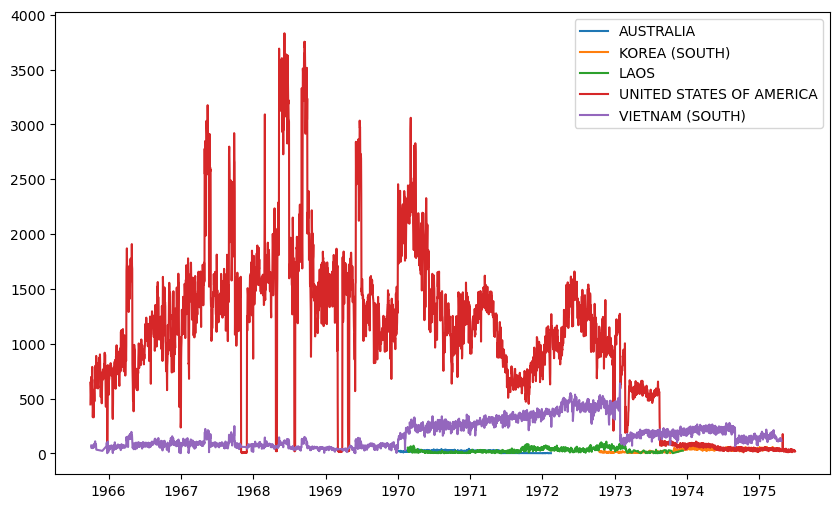

In [20]:
fig = plt.figure(figsize=(10, 6))

# iterate the different groups to create a different series
for country, missions in missions_by_date.groupby("ContryFlyingMission"): 
    plt.plot(missions["MissionDate"], missions["MissionsCount"], label=country)

plt.legend(loc='best')

We can observe how South Vietnam increased its missions starting from 1970. The drop in 1973 is motivated by the [Paris Peace Accords](https://en.wikipedia.org/wiki/Paris_Peace_Accords) that took place on January 27th, 1973, to establish peace in Vietnam and end the war.

----

## Question 3: Who bombed this location?

Keywords: `RDD map reduce` `cache` `save results`

<img style="float: right;" src="img/Hanoi_POL1966.jpg">

This picture is the Hanoi POL facility (North Vietnam) burning after it was attacked by the U.S. Air Force on 29 June 1966 in the context of the Rolling Thunder operation. 

We are interested in discovering what was the most common take-off location during that day.

In [21]:
jun_29_operations = Bombing_Operations.where("MissionDate = '1966-06-29' AND TargetCountry='NORTH VIETNAM'")

Which coutries scheduled missions that day?

In [22]:
jun_29_operations.groupBy("ContryFlyingMission").agg(count("*").alias("MissionsCount")).toPandas()

ContryFlyingMission  MissionsCount
0           VIETNAM (SOUTH)              6
1  UNITED STATES OF AMERICA            389

Most of the operation that day were performed by USA airplanes.

In [23]:
jun_29_operations.take(1)

[Row(AirCraft='F-105', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1966-06-29', OperationSupported='STEEL TIGER', PeriodOfDay='D', TakeoffLocation='TAKHLI', TargetCountry='NORTH VIETNAM', TimeOnTarget=310.0, WeaponType='1000LB MK-83', WeaponsLoadedWeight=-1)]

You can specify to cache the content in memory:

In [24]:
jun_29_operations.cache()

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint]

Now you can count the number of rows and move the content to the cache:

In [25]:
%time jun_29_operations.count()

CPU times: user 2.85 ms, sys: 1.91 ms, total: 4.76 ms
Wall time: 7.92 s


395

The second time the content is cached and it is faster:

In [26]:
%time jun_29_operations.count()

CPU times: user 1.08 ms, sys: 1.86 ms, total: 2.94 ms
Wall time: 73.6 ms


395

I can also save the results on a file...

In [27]:
jun_29_operations.write.mode('overwrite').json("jun_29_operations.json")

... and read from the file:

In [28]:
jun_29_operations = spark.read.json("jun_29_operations.json")

We can use the simple DataFrame API...

In [29]:
TakeoffLocationCounts = jun_29_operations\
                            .groupBy("TakeoffLocation").agg(count("*").alias("MissionsCount"))\
                            .sort(desc("MissionsCount"))
TakeoffLocationCounts.show()

+----------------+-------------+
| TakeoffLocation|MissionsCount|
+----------------+-------------+
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|           KORAT|           55|
|        UDORN AB|           44|
|         UBON AB|           44|
|          DANANG|           35|
|          RANGER|           35|
|    TAN SON NHUT|           26|
|HANCOCK (CVA-19)|           10|
|    CAM RANH BAY|            2|
|         CUBI PT|            1|
+----------------+-------------+



... or the explicit Map/Reduce format with RDDs.

First we emit a pair in the format (Location, 1):

In [30]:
all_locations = jun_29_operations.rdd.map(lambda row: (row.TakeoffLocation, 1))
all_locations.take(3)

[('TAKHLI', 1), ('DANANG', 1), ('CONSTELLATION', 1)]

Then, we sum counters in the reduce step, and we sort by count:

In [31]:
locations_counts_rdd = all_locations.reduceByKey(lambda a, b: a+b).sortBy(lambda r: -r[1])
locations_counts_rdd.take(3)

[('CONSTELLATION', 87), ('TAKHLI', 56), ('KORAT', 55)]

Now we can convent the RDD in dataframe by mapping the pairs to objects of type `Row`

In [32]:
locations_counts_with_schema = locations_counts_rdd.map(lambda r: Row(TakeoffLocation=r[0], MissionsCount=r[1]))
locations_counts = spark.createDataFrame(locations_counts_with_schema)
locations_counts.show()

+----------------+-------------+
| TakeoffLocation|MissionsCount|
+----------------+-------------+
|   CONSTELLATION|           87|
|          TAKHLI|           56|
|           KORAT|           55|
|         UBON AB|           44|
|        UDORN AB|           44|
|          DANANG|           35|
|          RANGER|           35|
|    TAN SON NHUT|           26|
|HANCOCK (CVA-19)|           10|
|    CAM RANH BAY|            2|
|         CUBI PT|            1|
+----------------+-------------+



<img style="float: right;" src="img/USS_Constellation.jpg">


That day the most common take-off location was the ship USS Constellation (CV-64). We cannot univocally identify one take off location, but we can reduce the possible candidates. Next step could be: explore TimeOnTarget feature.

_USS Constellation (CV-64), a Kitty Hawk-class supercarrier, was the third ship of the United States Navy to be named in honor of the "new constellation of stars" on the flag of the United States. One of the fastest ships in the Navy, as proven by her victory during a battlegroup race held in 1985, she was nicknamed "Connie" by her crew and officially as "America's Flagship"._

----

## Questions 4: What is the most used aircraft type during the Vietnam war (number of missions)?

Keywords: `join` `group by`

Let's check the content of `Aircraft_Glossary`:

In [33]:
Aircraft_Glossary.show(5)

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
+--------+--------------------+--------------------+
only showing top 5 rows



We are interested in the filed `AirCraftType`.

In [34]:
Bombing_Operations.select("AirCraft").show(5)

+--------+
|AirCraft|
+--------+
|   EC-47|
|   EC-47|
|    RF-4|
|     A-1|
|    A-37|
+--------+
only showing top 5 rows



We can join on the column `AirCraft` of both dataframes.

With Dataframe API:

In [35]:
missions_joined = Bombing_Operations.join(Aircraft_Glossary, 
                                          Bombing_Operations.AirCraft == Aircraft_Glossary.AirCraft)
missions_joined

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint, AirCraft: string, AirCraftName: string, AirCraftType: string]

We can select only the field we are interested in:

In [36]:
missions_aircrafts = missions_joined.select("AirCraftType")
missions_aircrafts.show(5)

+--------------------+
|        AirCraftType|
+--------------------+
|Military Transpor...|
|Military Transpor...|
|  Fighter bomber jet|
|         Fighter Jet|
|Light ground-atta...|
+--------------------+
only showing top 5 rows



And finally we can group by `AirCraftType` and count:

In [37]:
missions_aircrafts.groupBy("AirCraftType").agg(count("*").alias("MissionsCount"))\
                  .sort(desc("MissionsCount"))\
                  .show()

+--------------------+-------------+
|        AirCraftType|MissionsCount|
+--------------------+-------------+
|  Fighter Jet Bomber|      1073126|
|         Fighter Jet|       882594|
|  Jet Fighter Bomber|       451385|
|     Attack Aircraft|       315246|
|Light ground-atta...|       267457|
|  Fighter bomber jet|       242231|
|Military Transpor...|       228426|
|  Utility Helicopter|       146653|
|    Strategic bomber|        99100|
|     Tactical Bomber|        82219|
|Observation Aircraft|        81820|
|Fixed wing ground...|        75058|
|Ground attack air...|        73843|
|Carrier-based Fig...|        58691|
|   Training Aircraft|        48435|
|       Light fighter|        39999|
|        Light Bomber|        39262|
|Light Tactical Bo...|        34738|
| Light Utility Plane|        28582|
|Observation/ Ligh...|        24491|
+--------------------+-------------+
only showing top 20 rows



In alternative we can rewrite this in pure SQL:

In [38]:
Bombing_Operations.registerTempTable("Bombing_Operations")
Aircraft_Glossary.registerTempTable("Aircraft_Glossary")

query = """
SELECT AirCraftType, count(*) MissionsCount
FROM Bombing_Operations bo
JOIN Aircraft_Glossary ag
ON bo.AirCraft = ag.AirCraft
GROUP BY AirCraftType
ORDER BY MissionsCount DESC
"""

spark.sql(query).show()

/Users/sakota/opt/anaconda3/envs/ada2023/lib/python3.9/site-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+
|        AirCraftType|MissionsCount|
+--------------------+-------------+
|  Fighter Jet Bomber|      1073126|
|         Fighter Jet|       882594|
|  Jet Fighter Bomber|       451385|
|     Attack Aircraft|       315246|
|Light ground-atta...|       267457|
|  Fighter bomber jet|       242231|
|Military Transpor...|       228426|
|  Utility Helicopter|       146653|
|    Strategic bomber|        99100|
|     Tactical Bomber|        82219|
|Observation Aircraft|        81820|
|Fixed wing ground...|        75058|
|Ground attack air...|        73843|
|Carrier-based Fig...|        58691|
|   Training Aircraft|        48435|
|       Light fighter|        39999|
|        Light Bomber|        39262|
|Light Tactical Bo...|        34738|
| Light Utility Plane|        28582|
|Observation/ Ligh...|        24491|
+--------------------+-------------+
only showing top 20 rows



The aircrafts of type `Fighter Jet Bomber` participated in most of the missions in the Vietnam war.

Note: This data need cleaning and normalization. See `Fighter Jet Bomber`, `Jet Fighter Bomber`, `Fighter bomber jet`